In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'mathtext.default':'regular'})

### Read in csv files and clean data

In [2]:
mixoffense_standard_sharerandinsp_df = pd.read_csv('Percent Random Inspections, Mix offense-severity, Standard.csv')
mixoffense_standard_sharerandinsp_df.drop(['logit-normal-mu', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Compliant-Inspectees'], inplace=True, axis=1)
mixoffense_standard_sharerandinsp_df = mixoffense_standard_sharerandinsp_df.rename(columns={'[step]': 'step', '[run number]':'run','%-Random-Inspections':'sharerandominsp'})
mixoffense_standard_sharerandinsp_df['total-inspectees'] = mixoffense_standard_sharerandinsp_df['#-compliant-inspectees'] + mixoffense_standard_sharerandinsp_df['#-unintentional-violators'] + mixoffense_standard_sharerandinsp_df['#-conscious-violators'] + mixoffense_standard_sharerandinsp_df['#-criminal-violators'] 
mixoffense_standard_sharerandinsp_df['perc-compliant'] = mixoffense_standard_sharerandinsp_df['#-compliant-inspectees'] / mixoffense_standard_sharerandinsp_df['total-inspectees'] * 100
mixoffense_standard_sharerandinsp_df['perc-compliant'] = mixoffense_standard_sharerandinsp_df['perc-compliant'].fillna(0)
mixoffense_standard_sharerandinsp_df['perc-unintentional'] = mixoffense_standard_sharerandinsp_df['#-unintentional-violators'] / mixoffense_standard_sharerandinsp_df['total-inspectees'] * 100
mixoffense_standard_sharerandinsp_df['perc-unintentional'] = mixoffense_standard_sharerandinsp_df['perc-unintentional'].fillna(0)
mixoffense_standard_sharerandinsp_df['perc-conscious'] = mixoffense_standard_sharerandinsp_df['#-conscious-violators'] / mixoffense_standard_sharerandinsp_df['total-inspectees'] * 100
mixoffense_standard_sharerandinsp_df['perc-conscious'] = mixoffense_standard_sharerandinsp_df['perc-conscious'].fillna(0)
mixoffense_standard_sharerandinsp_df['perc-criminal'] = mixoffense_standard_sharerandinsp_df['#-criminal-violators'] / mixoffense_standard_sharerandinsp_df['total-inspectees'] * 100
mixoffense_standard_sharerandinsp_df['perc-criminal'] = mixoffense_standard_sharerandinsp_df['perc-criminal'].fillna(0)
mixoffense_standard_sharerandinsp_df['perc-noncompliant'] = (mixoffense_standard_sharerandinsp_df['perc-unintentional'] + mixoffense_standard_sharerandinsp_df['perc-conscious'] + mixoffense_standard_sharerandinsp_df['perc-criminal']) 

In [3]:
mixoffense_standard_sharerandinsp_df.drop(mixoffense_standard_sharerandinsp_df.index[mixoffense_standard_sharerandinsp_df['sharerandominsp'] == 100], inplace=True)
mixoffense_standard_sharerandinsp_df

run  run_num  sharerandominsp  step  avg-compliance-rate  \
0         1        1               10     0             0.000000   
1         1        1               10     1             0.647372   
2         1        1               10     2             1.129728   
3         1        1               10     3             1.313785   
4         1        1               10     4             1.466108   
...     ...      ...              ...   ...                  ...   
450445  455       50               90   996             5.028915   
450446  455       50               90   997             5.029153   
450447  455       50               90   998             5.029245   
450448  455       50               90   999             5.028988   
450449  455       50               90  1000             5.028980   

        #-compliant-inspectees  #-unintentional-violators  \
0                            0                          0   
1                         3119                        989   
2                         1591                        180   
3                         1254                         99   
4                         1129                        100   
...                        ...                        ...   
450445                     404                         83   
450446                     413                         87   
450447                     416                         87   
450448                     402                         91   
450449                     404                         84   

        #-conscious-violators  #-criminal-violators  total-inspectees  \
0                           0                     0                 0   
1                        3635                   133              7876   
2                        5954                   153              7878   
3                        6349                   176              7878   
4                        6446                   203              7878   
...                       ...                   ...               ...   
450445                   7207                   184              7878   
450446                   7205                   173              7878   
450447                   7196                   179              7878   
450448                   7204                   181              7878   
450449                   7211                   179              7878   

        perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0             0.000000            0.000000        0.000000       0.000000   
1            39.601320           12.557136       46.152869       1.688674   
2            20.195481            2.284844       75.577558       1.942117   
3            15.917746            1.256664       80.591521       2.234070   
4            14.331048            1.269358       81.822798       2.576796   
...                ...                 ...             ...            ...   
450445        5.128205            1.053567       91.482610       2.335618   
450446        5.242447            1.104341       91.457223       2.195989   
450447        5.280528            1.104341       91.342980       2.272150   
450448        5.102818            1.155116       91.444529       2.297537   
450449        5.128205            1.066260       91.533384       2.272150   

        perc-noncompliant  
0                0.000000  
1               60.398680  
2               79.804519  
3               84.082254  
4               85.668952  
...                   ...  
450445          94.871795  
450446          94.757553  
450447          94.719472  
450448          94.897182  
450449          94.871795  

[450450 rows x 15 columns]

In [4]:
agg_summary_mixoffense_standard_avg = mixoffense_standard_sharerandinsp_df.groupby(['sharerandominsp'], as_index=False).mean()
agg_summary_mixoffense_standard_avg.drop(['run','step','total-inspectees'], inplace=True, axis=1)
agg_summary_mixoffense_standard_avg = agg_summary_mixoffense_standard_avg.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                                                'perc-compliant':'perc-compliant-mean', 
                                                                                'perc-unintentional':'perc-unintentional-mean',
                                                                               'perc-conscious': 'perc-conscious-mean',
                                                                               'perc-criminal': 'perc-criminal-mean',
                                                                               'perc-noncompliant': 'perc-noncompliant-mean'})
agg_summary_mixoffense_standard_avg

sharerandominsp  run_num  avg-compliance-rate-mean  #-compliant-inspectees  \
0               10     25.5                  5.300602              528.477762   
1               20     25.5                  7.042038              646.438302   
2               30     25.5                  5.580019              492.955744   
3               40     25.5                  7.003622              591.762577   
4               50     25.5                  8.023403              636.495185   
5               60     25.5                  8.975113              713.509271   
6               70     25.5                 10.005814              785.202238   
7               80     25.5                 10.968621              845.779680   
8               90     25.5                  9.904256              726.911109   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                  65.900959            6895.031648            380.717502   
1                  66.191668            6781.705435            375.792388   
2                  66.702997            6935.652148            374.816863   
3                  66.816204            6841.200759            370.348192   
4                  67.079860            6801.216903            365.335704   
5                  66.957063            6730.101319            359.560060   
6                  66.674985            6664.675764            353.574565   
7                  69.982637            6651.462957            302.902378   
8                  81.423916            6887.234286            174.558142   

   perc-compliant-mean  perc-unintentional-mean  perc-conscious-mean  \
0             6.708283                 0.836522            87.522627   
1             8.205625                 0.840212            86.084113   
2             6.257382                 0.846703            88.038248   
3             7.511594                 0.848140            86.839322   
4             8.079411                 0.851487            86.331785   
5             9.056995                 0.849928            85.429073   
6             9.967036                 0.846347            84.598590   
7            10.735980                 0.888333            84.430871   
8             9.227114                 1.033564            87.423655   

   perc-criminal-mean  perc-noncompliant-mean  
0            4.832667               93.191817  
1            4.770150               91.694475  
2            4.757767               93.642718  
3            4.701044               92.388506  
4            4.637417               91.820689  
5            4.564104               90.843105  
6            4.488126               89.933064  
7            3.844915               89.164120  
8            2.215768               90.672986

In [5]:
agg_summary_mixoffense_standard_std = mixoffense_standard_sharerandinsp_df.groupby(['sharerandominsp'], as_index=False).std()
agg_summary_mixoffense_standard_std.drop(['run','step','total-inspectees'], inplace=True, axis=1)
agg_summary_mixoffense_standard_std = agg_summary_mixoffense_standard_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                                                'perc-compliant':'perc-compliant-std', 
                                                                                'perc-unintentional':'perc-unintentional-std',
                                                                               'perc-conscious': 'perc-conscious-std',
                                                                               'perc-criminal': 'perc-criminal-std',
                                                                               'perc-noncompliant': 'perc-noncompliant-std'})
agg_summary_mixoffense_standard_std

sharerandominsp    run_num  avg-compliance-rate-std  \
0               10  14.431014                 4.437250   
1               20  14.431014                 4.994560   
2               30  14.431014                 4.718249   
3               40  14.431014                 5.287411   
4               50  14.431014                 5.275699   
5               60  14.431014                 5.355187   
6               70  14.431014                 6.303976   
7               80  14.431014                 5.987699   
8               90  14.431014                 5.796721   

   #-compliant-inspectees  #-unintentional-violators  #-conscious-violators  \
0              444.957615                  29.922507             496.708179   
1              480.857133                  29.958791             524.672215   
2              479.412454                  30.012487             523.134751   
3              487.443167                  30.088640             526.326568   
4              454.412425                  30.180857             494.374405   
5              469.934657                  30.283485             504.260992   
6              553.354274                  30.489423             573.487922   
7              518.966454                  30.717570             553.989757   
8              487.107984                  30.537905             529.577234   

   #-criminal-violators  perc-compliant-std  perc-unintentional-std  \
0             25.182112            5.648162                0.379922   
1             25.414996            6.103849                0.380382   
2             26.089906            6.085515                0.381064   
3             26.842524            6.187450                0.382030   
4             27.150002            5.768176                0.383201   
5             28.306630            5.965204                0.384503   
6             31.229527            7.024089                0.387117   
7             17.945197            6.587586                0.390012   
8              8.881927            6.183196                0.387731   

   perc-conscious-std  perc-criminal-std  perc-noncompliant-std  
0            6.304927           0.319647               6.367230  
1            6.659896           0.322603               6.752606  
2            6.640375           0.331170               6.764870  
3            6.680893           0.340724               6.838415  
4            6.275300           0.344627               6.452734  
5            6.400802           0.359309               6.614700  
6            7.279546           0.396411               7.571434  
7            7.032045           0.227784               7.157613  
8            6.722148           0.112741               6.809444

In [6]:
mixoffense_resp_sharerandinsp_df = pd.read_csv('Percent Random Inspections, Mix offense-severity, Responsive.csv')
mixoffense_resp_sharerandinsp_df.drop(['logit-normal-mu', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Compliant-Inspectees'], inplace=True, axis=1)
mixoffense_resp_sharerandinsp_df = mixoffense_resp_sharerandinsp_df.rename(columns={'[step]': 'step', '[run number]':'run','%-Random-Inspections':'sharerandominsp'})
mixoffense_resp_sharerandinsp_df['total-inspectees'] = mixoffense_resp_sharerandinsp_df['#-compliant-inspectees'] + mixoffense_resp_sharerandinsp_df['#-unintentional-violators'] + mixoffense_resp_sharerandinsp_df['#-conscious-violators'] + mixoffense_resp_sharerandinsp_df['#-criminal-violators'] 
mixoffense_resp_sharerandinsp_df['perc-compliant'] = mixoffense_resp_sharerandinsp_df['#-compliant-inspectees'] / mixoffense_resp_sharerandinsp_df['total-inspectees'] * 100
mixoffense_resp_sharerandinsp_df['perc-compliant'] = mixoffense_resp_sharerandinsp_df['perc-compliant'].fillna(0)
mixoffense_resp_sharerandinsp_df['perc-unintentional'] = mixoffense_resp_sharerandinsp_df['#-unintentional-violators'] / mixoffense_resp_sharerandinsp_df['total-inspectees'] * 100
mixoffense_resp_sharerandinsp_df['perc-unintentional'] = mixoffense_resp_sharerandinsp_df['perc-unintentional'].fillna(0)
mixoffense_resp_sharerandinsp_df['perc-conscious'] = mixoffense_resp_sharerandinsp_df['#-conscious-violators'] / mixoffense_resp_sharerandinsp_df['total-inspectees'] * 100
mixoffense_resp_sharerandinsp_df['perc-conscious'] = mixoffense_resp_sharerandinsp_df['perc-conscious'].fillna(0)
mixoffense_resp_sharerandinsp_df['perc-criminal'] = mixoffense_resp_sharerandinsp_df['#-criminal-violators'] / mixoffense_resp_sharerandinsp_df['total-inspectees'] * 100
mixoffense_resp_sharerandinsp_df['perc-criminal'] = mixoffense_resp_sharerandinsp_df['perc-criminal'].fillna(0)
mixoffense_resp_sharerandinsp_df['perc-noncompliant'] = (mixoffense_resp_sharerandinsp_df['perc-unintentional'] + mixoffense_resp_sharerandinsp_df['perc-conscious'] + mixoffense_resp_sharerandinsp_df['perc-criminal']) 

In [7]:
mixoffense_resp_sharerandinsp_df.drop(mixoffense_resp_sharerandinsp_df.index[mixoffense_resp_sharerandinsp_df['sharerandominsp'] == 100], inplace=True)
mixoffense_resp_sharerandinsp_df

run  run_num  sharerandominsp  step  avg-compliance-rate  \
0         1        1               10     0             0.000000   
1         1        1               10     1             0.634679   
2         1        1               10     2             1.669205   
3         1        1               10     3             2.703732   
4         1        1               10     4             3.745663   
...     ...      ...              ...   ...                  ...   
450445  455       50               90   996            90.135507   
450446  455       50               90   997            90.135095   
450447  455       50               90   998            90.135153   
450448  455       50               90   999            90.135526   
450449  455       50               90  1000            90.135361   

        #-compliant-inspectees  #-unintentional-violators  \
0                            0                          0   
1                         3119                        989   
2                         4612                        180   
3                         5355                         94   
4                         5763                         86   
...                        ...                        ...   
450445                    7723                        117   
450446                    7722                        117   
450447                    7722                        117   
450448                    7724                        115   
450449                    7725                        114   

        #-conscious-violators  #-criminal-violators  total-inspectees  \
0                           0                     0                 0   
1                        3635                   133              7876   
2                        3059                    27              7878   
3                        2398                    31              7878   
4                        2006                    23              7878   
...                       ...                   ...               ...   
450445                     38                     0              7878   
450446                     39                     0              7878   
450447                     39                     0              7878   
450448                     39                     0              7878   
450449                     39                     0              7878   

        perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0             0.000000            0.000000        0.000000       0.000000   
1            39.601320           12.557136       46.152869       1.688674   
2            58.542777            2.284844       38.829652       0.342727   
3            67.974105            1.193196       30.439198       0.393501   
4            73.153085            1.091648       25.463316       0.291952   
...                ...                 ...             ...            ...   
450445       98.032496            1.485149        0.482356       0.000000   
450446       98.019802            1.485149        0.495050       0.000000   
450447       98.019802            1.485149        0.495050       0.000000   
450448       98.045189            1.459761        0.495050       0.000000   
450449       98.057883            1.447068        0.495050       0.000000   

        perc-noncompliant  
0                0.000000  
1               60.398680  
2               41.457223  
3               32.025895  
4               26.846915  
...                   ...  
450445           1.967504  
450446           1.980198  
450447           1.980198  
450448           1.954811  
450449           1.942117  

[450450 rows x 15 columns]

In [8]:
agg_summary_mixoffense_resp_avg = mixoffense_resp_sharerandinsp_df.groupby(['sharerandominsp'], as_index=False).mean()
agg_summary_mixoffense_resp_avg.drop(['run','step','total-inspectees'], inplace=True, axis=1)
agg_summary_mixoffense_resp_avg = agg_summary_mixoffense_resp_avg.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                                                'perc-compliant':'perc-compliant-mean', 
                                                                                'perc-unintentional':'perc-unintentional-mean',
                                                                               'perc-conscious': 'perc-conscious-mean',
                                                                               'perc-criminal': 'perc-criminal-mean',
                                                                               'perc-noncompliant': 'perc-noncompliant-mean'})
agg_summary_mixoffense_resp_avg

sharerandominsp  run_num  avg-compliance-rate-mean  #-compliant-inspectees  \
0               10     25.5                 75.131529             7428.452028   
1               20     25.5                 75.292514             7420.546174   
2               30     25.5                 75.823905             7425.428352   
3               40     25.5                 76.161998             7415.160759   
4               50     25.5                 76.897082             7417.108791   
5               60     25.5                 77.811765             7425.842378   
6               70     25.5                 79.584117             7450.385275   
7               80     25.5                 83.028723             7508.124296   
8               90     25.5                 87.594438             7606.262897   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                 322.701399             117.422537              1.551888   
1                 326.394126             121.646933              1.540639   
2                 319.163077             124.049211              1.487113   
3                 322.965954             130.506094              1.494885   
4                 318.182338             133.430809              1.405714   
5                 301.695744             141.286913              1.302657   
6                 270.238242             148.372308              1.131768   
7                 211.282597             149.879281              0.841419   
8                 103.228232             160.138122              0.498402   

   perc-compliant-mean  perc-unintentional-mean  perc-conscious-mean  \
0            94.293638                 4.096238             1.490524   
1            94.193285                 4.143112             1.544146   
2            94.255258                 4.051324             1.574641   
3            94.124926                 4.099596             1.656602   
4            94.149653                 4.038875             1.693727   
5            94.260514                 3.829601             1.793449   
6            94.572051                 3.430293             1.883389   
7            95.304966                 2.681935             1.902518   
8            96.550696                 1.310339             2.032739   

   perc-criminal-mean  perc-noncompliant-mean  
0            0.019699                5.606462  
1            0.019557                5.706815  
2            0.018877                5.644842  
3            0.018976                5.775174  
4            0.017844                5.750446  
5            0.016536                5.639586  
6            0.014367                5.328049  
7            0.010681                4.595134  
8            0.006327                3.349404

In [9]:
agg_summary_mixoffense_resp_std = mixoffense_resp_sharerandinsp_df.groupby(['sharerandominsp'], as_index=False).std()
agg_summary_mixoffense_resp_std.drop(['run','step','total-inspectees'], inplace=True, axis=1)
agg_summary_mixoffense_resp_std = agg_summary_mixoffense_resp_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                                                'perc-compliant':'perc-compliant-std', 
                                                                                'perc-unintentional':'perc-unintentional-std',
                                                                               'perc-conscious': 'perc-conscious-std',
                                                                               'perc-criminal': 'perc-criminal-std',
                                                                               'perc-noncompliant': 'perc-noncompliant-std'})
agg_summary_mixoffense_resp_std

sharerandominsp    run_num  avg-compliance-rate-std  \
0               10  14.431014                10.936672   
1               20  14.431014                 9.847658   
2               30  14.431014                 8.904911   
3               40  14.431014                 8.132020   
4               50  14.431014                 7.547439   
5               60  14.431014                 7.383282   
6               70  14.431014                 7.468957   
7               80  14.431014                 7.969215   
8               90  14.431014                 9.620698   

   #-compliant-inspectees  #-unintentional-violators  #-conscious-violators  \
0              344.468368                  88.595110             225.424867   
1              347.479925                  89.500451             235.992881   
2              354.598034                  83.235459             254.519074   
3              359.563416                  90.076479             265.986258   
4              363.438325                  84.151312             280.035663   
5              384.845768                  76.533009             318.585340   
6              407.651693                  66.419956             353.522235   
7              443.843236                  63.740566             392.742985   
8              546.953731                  45.717589             495.360228   

   #-criminal-violators  perc-compliant-std  perc-unintentional-std  \
0              5.440749            4.372409                1.124613   
1              5.262917            4.410639                1.136104   
2              5.068391            4.500988                1.056581   
3              4.903299            4.564015                1.143416   
4              4.716832            4.613201                1.068206   
5              4.587718            4.884947                0.971506   
6              4.463585            5.174436                0.843141   
7              4.374496            5.633845                0.809135   
8              4.335701            6.942708                0.580382   

   perc-conscious-std  perc-criminal-std  perc-noncompliant-std  
0            2.861632           0.069073               3.202800  
1            2.995768           0.066816               3.257875  
2            3.230927           0.064347               3.377355  
3            3.376484           0.062252               3.464666  
4            3.554815           0.059885               3.528506  
5            4.044126           0.058247               3.874183  
6            4.487593           0.056672               4.226006  
7            4.985432           0.055541               4.762153  
8            6.287985           0.055049               6.236200

In [10]:
avg_compliance_standard = pd.concat([agg_summary_mixoffense_standard_avg['sharerandominsp'],agg_summary_mixoffense_standard_avg['avg-compliance-rate-mean'], agg_summary_mixoffense_standard_std['avg-compliance-rate-std']], axis=1)
avg_compliance_standard.set_index('sharerandominsp', inplace=True)
avg_compliance_standard.round(decimals=3)

avg-compliance-rate-mean  avg-compliance-rate-std
sharerandominsp                                                   
10                                  5.301                    4.437
20                                  7.042                    4.995
30                                  5.580                    4.718
40                                  7.004                    5.287
50                                  8.023                    5.276
60                                  8.975                    5.355
70                                 10.006                    6.304
80                                 10.969                    5.988
90                                  9.904                    5.797

In [11]:
avg_compliance_standard = pd.concat([agg_summary_mixoffense_standard_avg['sharerandominsp'],agg_summary_mixoffense_standard_avg['perc-compliant-mean'], agg_summary_mixoffense_standard_std['perc-compliant-std']], axis=1)
avg_compliance_standard.set_index('sharerandominsp', inplace=True)
avg_compliance_standard.round(decimals=3)

perc-compliant-mean  perc-compliant-std
sharerandominsp                                         
10                             6.708               5.648
20                             8.206               6.104
30                             6.257               6.086
40                             7.512               6.187
50                             8.079               5.768
60                             9.057               5.965
70                             9.967               7.024
80                            10.736               6.588
90                             9.227               6.183

In [12]:
avg_compliance_resp = pd.concat([agg_summary_mixoffense_resp_avg['sharerandominsp'],agg_summary_mixoffense_resp_avg['avg-compliance-rate-mean'], agg_summary_mixoffense_resp_std['avg-compliance-rate-std']], axis=1)
avg_compliance_resp.set_index('sharerandominsp', inplace=True)
avg_compliance_resp.round(decimals=3)

avg-compliance-rate-mean  avg-compliance-rate-std
sharerandominsp                                                   
10                                 75.132                   10.937
20                                 75.293                    9.848
30                                 75.824                    8.905
40                                 76.162                    8.132
50                                 76.897                    7.547
60                                 77.812                    7.383
70                                 79.584                    7.469
80                                 83.029                    7.969
90                                 87.594                    9.621

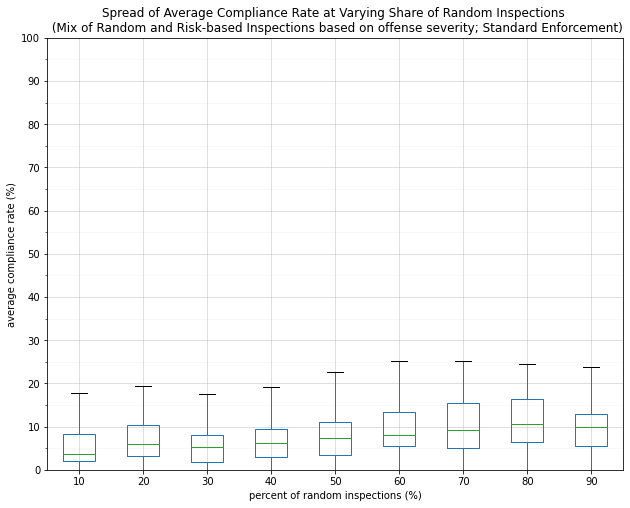

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
mixoffense_standard_sharerandinsp_df.boxplot(column='avg-compliance-rate',by='sharerandominsp', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Share of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('percent of random inspections (%)')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Percent Random Inspections Boxplot Avg Compliance Rate Standard Mix Offense.png', dpi=300, bbox_inches='tight')

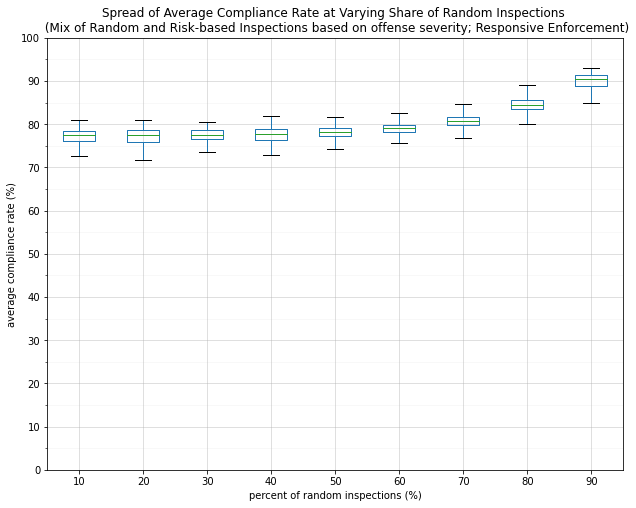

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
mixoffense_resp_sharerandinsp_df.boxplot(column='avg-compliance-rate',by='sharerandominsp', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Share of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('percent of random inspections (%)')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Percent Random Inspections Boxplot Avg Compliance Rate Responsive Mix Offense.png', dpi=300, bbox_inches='tight')

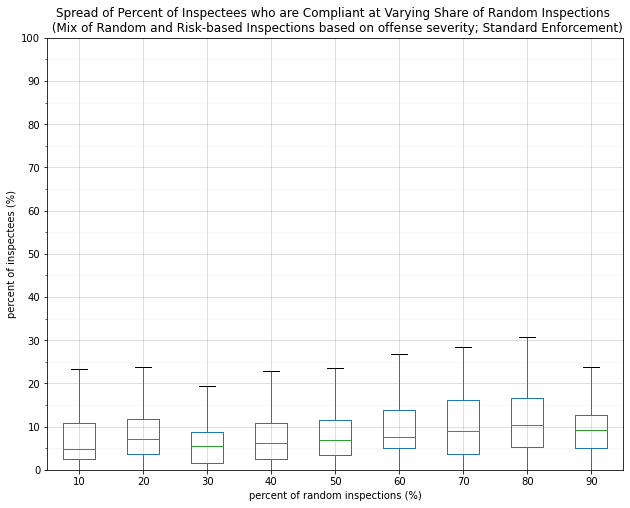

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
mixoffense_standard_sharerandinsp_df.boxplot(column='perc-compliant',by='sharerandominsp', ax=ax,showfliers=False)
plt.title('Spread of Percent of Inspectees who are Compliant at Varying Share of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Standard Enforcement)')
plt.ylabel('percent of inspectees (%)')
plt.xlabel('percent of random inspections (%)')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Percent Random Inspections Boxplot Perc Compliant Standard Mix Offense.png', dpi=300, bbox_inches='tight')

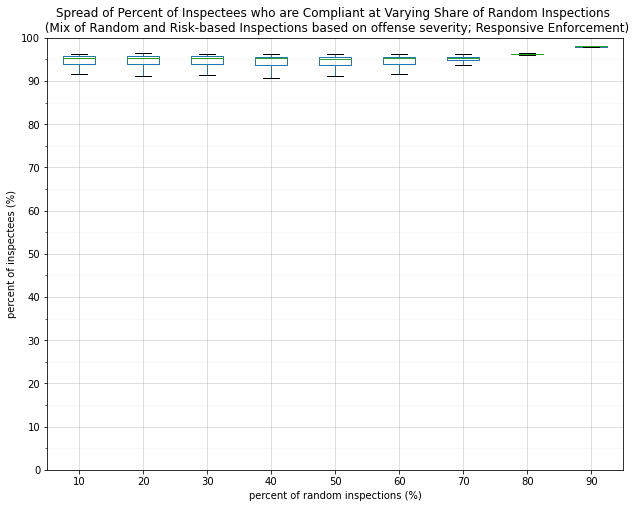

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
mixoffense_resp_sharerandinsp_df.boxplot(column='perc-compliant',by='sharerandominsp', ax=ax,showfliers=False)
plt.title('Spread of Percent of Inspectees who are Compliant at Varying Share of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Responsive Enforcement)')
plt.ylabel('percent of inspectees (%)')
plt.xlabel('percent of random inspections (%)')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Percent Random Inspections Boxplot Perc Compliant Responsive Mix Offense.png', dpi=300, bbox_inches='tight')

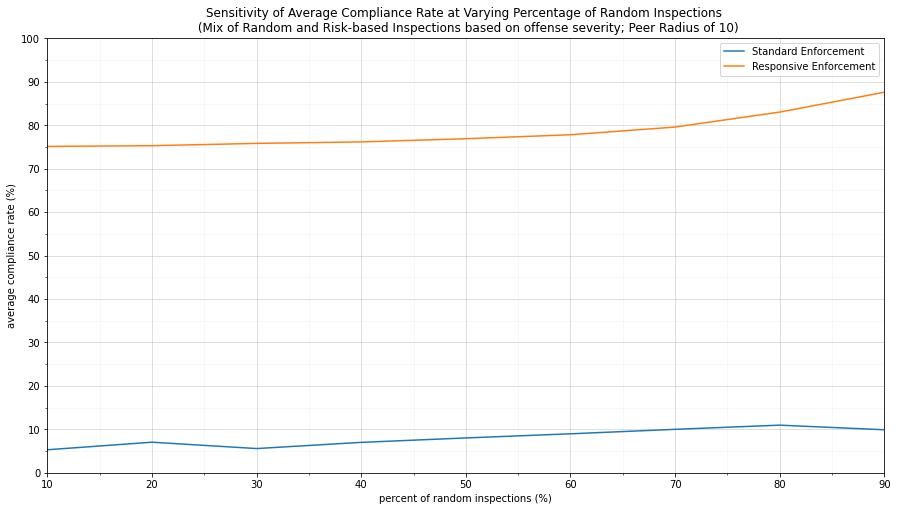

<Figure size 432x288 with 0 Axes>

In [17]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(10, 100.1, 10))
ax.set_xticks(np.arange(10, 100.1, 5), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_mixoffense_standard_avg['sharerandominsp'], agg_summary_mixoffense_standard_avg['avg-compliance-rate-mean'], label="Standard Enforcement")
plt.plot(agg_summary_mixoffense_resp_avg['sharerandominsp'], agg_summary_mixoffense_resp_avg['avg-compliance-rate-mean'], label="Responsive Enforcement")

plt.title("Sensitivity of Average Compliance Rate at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10)")
plt.xlabel('percent of random inspections (%)')
plt.ylabel('average compliance rate (%)')
plt.xlim(10,90)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Percent Random Inspections vs Avg Compliance Rate (Mix offense-severity, Both, Radius 10).png', dpi=300, bbox_inches='tight')

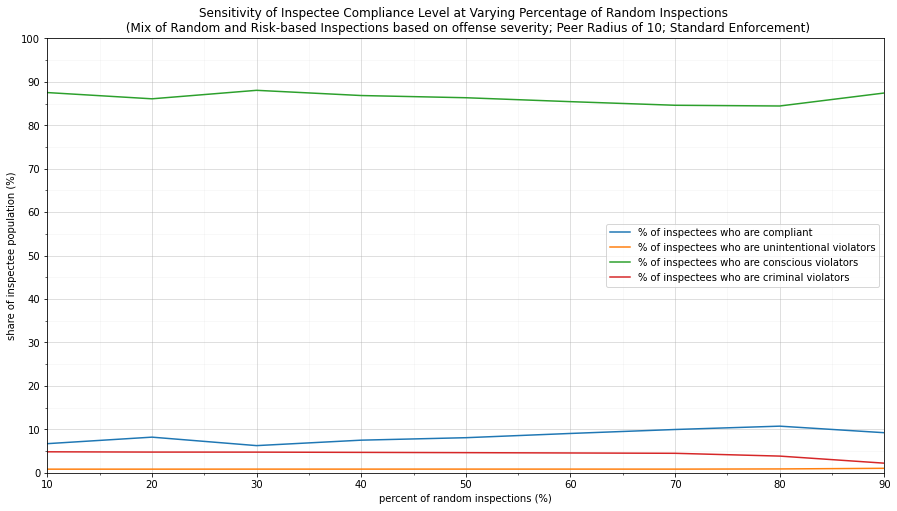

<Figure size 432x288 with 0 Axes>

In [18]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(10, 100.1, 10))
ax.set_xticks(np.arange(10, 100.1, 5), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_mixoffense_standard_avg['sharerandominsp'], agg_summary_mixoffense_standard_avg['perc-compliant-mean'],label="% of inspectees who are compliant")
plt.plot(agg_summary_mixoffense_standard_avg['sharerandominsp'], agg_summary_mixoffense_standard_avg['perc-unintentional-mean'],label="% of inspectees who are unintentional violators")
plt.plot(agg_summary_mixoffense_standard_avg['sharerandominsp'], agg_summary_mixoffense_standard_avg['perc-conscious-mean'],label="% of inspectees who are conscious violators")
plt.plot(agg_summary_mixoffense_standard_avg['sharerandominsp'], agg_summary_mixoffense_standard_avg['perc-criminal-mean'],label="% of inspectees who are criminal violators")

plt.title("Sensitivity of Inspectee Compliance Level at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('percent of random inspections (%)')
plt.ylabel('share of inspectee population (%)')
plt.xlim(10,90)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Percent Random Inspections vs Compliance Breakdown (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

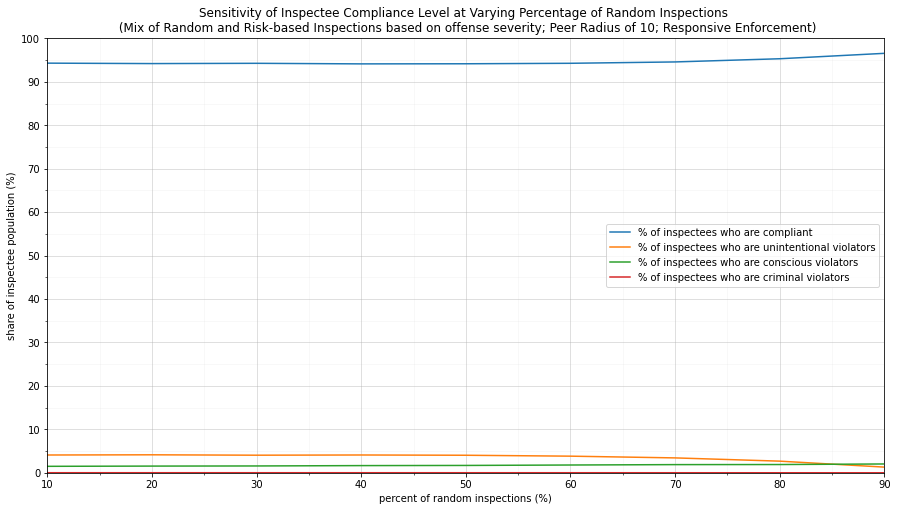

<Figure size 432x288 with 0 Axes>

In [19]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(10, 100.1, 10))
ax.set_xticks(np.arange(10, 100.1, 5), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_mixoffense_resp_avg['sharerandominsp'], agg_summary_mixoffense_resp_avg['perc-compliant-mean'],label="% of inspectees who are compliant")
plt.plot(agg_summary_mixoffense_resp_avg['sharerandominsp'], agg_summary_mixoffense_resp_avg['perc-unintentional-mean'],label="% of inspectees who are unintentional violators")
plt.plot(agg_summary_mixoffense_resp_avg['sharerandominsp'], agg_summary_mixoffense_resp_avg['perc-conscious-mean'],label="% of inspectees who are conscious violators")
plt.plot(agg_summary_mixoffense_resp_avg['sharerandominsp'], agg_summary_mixoffense_resp_avg['perc-criminal-mean'],label="% of inspectees who are criminal violators")

plt.title("Sensitivity of Inspectee Compliance Level at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('percent of random inspections (%)')
plt.ylabel('share of inspectee population (%)')
plt.xlim(10,90)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Percent Random Inspections vs Compliance Breakdown (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

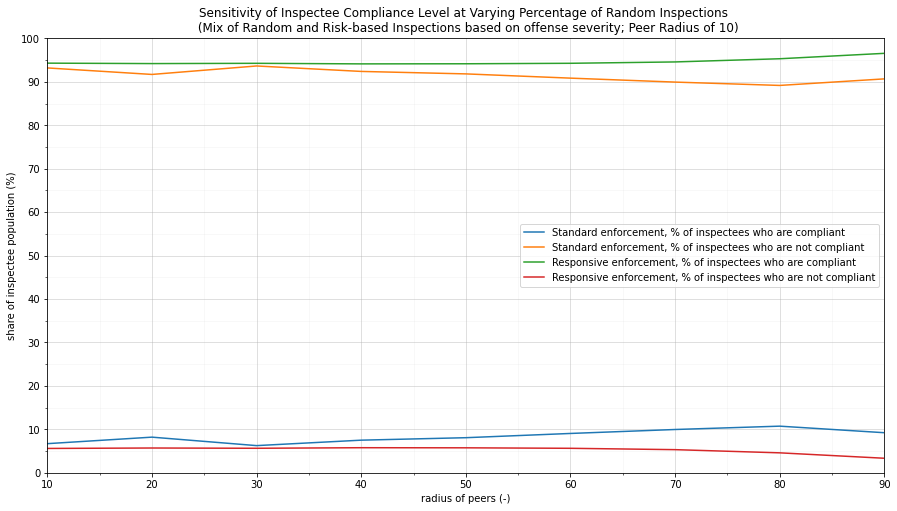

<Figure size 432x288 with 0 Axes>

In [20]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(10, 100.1, 10))
ax.set_xticks(np.arange(10, 100.1, 5), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

ax.plot(agg_summary_mixoffense_standard_avg['sharerandominsp'], agg_summary_mixoffense_standard_avg['perc-compliant-mean'],label="Standard enforcement, % of inspectees who are compliant")
ax.plot(agg_summary_mixoffense_standard_avg['sharerandominsp'], agg_summary_mixoffense_standard_avg['perc-noncompliant-mean'],label="Standard enforcement, % of inspectees who are not compliant")
ax.plot(agg_summary_mixoffense_resp_avg['sharerandominsp'], agg_summary_mixoffense_resp_avg['perc-compliant-mean'],label="Responsive enforcement, % of inspectees who are compliant")
ax.plot(agg_summary_mixoffense_resp_avg['sharerandominsp'], agg_summary_mixoffense_resp_avg['perc-noncompliant-mean'],label="Responsive enforcement, % of inspectees who are not compliant")

plt.title("Sensitivity of Inspectee Compliance Level at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10)")
plt.xlabel('radius of peers (-)')
plt.ylabel('share of inspectee population (%)')

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.xlim(10,90)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Percent Random Inspections vs Compliance Breakdown (Mix offense-severity, Both, Radius 10).png', dpi=300, bbox_inches='tight')

#### Plot average for each value of % random inspections

In [22]:
# Create new dataframes by compliant share value
for i, x in mixoffense_standard_sharerandinsp_df.groupby('sharerandominsp'):
    globals()['mixoffense_standard_sharerandinsp_' + str(i)] = x

for i, x in mixoffense_resp_sharerandinsp_df.groupby('sharerandominsp'):
    globals()['mixoffense_resp_sharerandinsp_' + str(i)] = x

mixoffense_resp_sharerandinsp_90

run  run_num  sharerandominsp  step  avg-compliance-rate  \
400400   41        1               90     0             0.000000   
400401   41        1               90     1             5.813658   
400402   41        1               90     2            12.179487   
400403   41        1               90     3            17.692731   
400404   41        1               90     4            23.332910   
...     ...      ...              ...   ...                  ...   
450445  455       50               90   996            90.135507   
450446  455       50               90   997            90.135095   
450447  455       50               90   998            90.135153   
450448  455       50               90   999            90.135526   
450449  455       50               90  1000            90.135361   

        #-compliant-inspectees  #-unintentional-violators  \
400400                       0                          0   
400401                    3119                        989   
400402                    3878                        265   
400403                    4176                        108   
400404                    4484                         52   
...                        ...                        ...   
450445                    7723                        117   
450446                    7722                        117   
450447                    7722                        117   
450448                    7724                        115   
450449                    7725                        114   

        #-conscious-violators  #-criminal-violators  total-inspectees  \
400400                      0                     0                 0   
400401                   3635                   133              7876   
400402                   3726                     8              7877   
400403                   3586                     8              7878   
400404                   3334                     8              7878   
...                       ...                   ...               ...   
450445                     38                     0              7878   
450446                     39                     0              7878   
450447                     39                     0              7878   
450448                     39                     0              7878   
450449                     39                     0              7878   

        perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
400400        0.000000            0.000000        0.000000       0.000000   
400401       39.601320           12.557136       46.152869       1.688674   
400402       49.231941            3.364225       47.302272       0.101562   
400403       53.008378            1.370906       45.519167       0.101549   
400404       56.917999            0.660066       42.320386       0.101549   
...                ...                 ...             ...            ...   
450445       98.032496            1.485149        0.482356       0.000000   
450446       98.019802            1.485149        0.495050       0.000000   
450447       98.019802            1.485149        0.495050       0.000000   
450448       98.045189            1.459761        0.495050       0.000000   
450449       98.057883            1.447068        0.495050       0.000000   

        perc-noncompliant  
400400           0.000000  
400401          60.398680  
400402          50.768059  
400403          46.991622  
400404          43.082001  
...                   ...  
450445           1.967504  
450446           1.980198  
450447           1.980198  
450448           1.954811  
450449           1.942117  

[50050 rows x 15 columns]

In [23]:
mixoffense_standard_sharerandinsp_10_step = mixoffense_standard_sharerandinsp_10.groupby(['step'], as_index=False).mean()
mixoffense_standard_sharerandinsp_20_step = mixoffense_standard_sharerandinsp_20.groupby(['step'], as_index=False).mean()
mixoffense_standard_sharerandinsp_30_step = mixoffense_standard_sharerandinsp_30.groupby(['step'], as_index=False).mean()
mixoffense_standard_sharerandinsp_40_step = mixoffense_standard_sharerandinsp_40.groupby(['step'], as_index=False).mean()
mixoffense_standard_sharerandinsp_50_step = mixoffense_standard_sharerandinsp_50.groupby(['step'], as_index=False).mean()
mixoffense_standard_sharerandinsp_60_step = mixoffense_standard_sharerandinsp_60.groupby(['step'], as_index=False).mean()
mixoffense_standard_sharerandinsp_70_step = mixoffense_standard_sharerandinsp_70.groupby(['step'], as_index=False).mean()
mixoffense_standard_sharerandinsp_80_step = mixoffense_standard_sharerandinsp_80.groupby(['step'], as_index=False).mean()
mixoffense_standard_sharerandinsp_90_step = mixoffense_standard_sharerandinsp_90.groupby(['step'], as_index=False).mean()

In [24]:
mixoffense_resp_sharerandinsp_10_step = mixoffense_resp_sharerandinsp_10.groupby(['step'], as_index=False).mean()
mixoffense_resp_sharerandinsp_20_step = mixoffense_resp_sharerandinsp_20.groupby(['step'], as_index=False).mean()
mixoffense_resp_sharerandinsp_30_step = mixoffense_resp_sharerandinsp_30.groupby(['step'], as_index=False).mean()
mixoffense_resp_sharerandinsp_40_step = mixoffense_resp_sharerandinsp_40.groupby(['step'], as_index=False).mean()
mixoffense_resp_sharerandinsp_50_step = mixoffense_resp_sharerandinsp_50.groupby(['step'], as_index=False).mean()
mixoffense_resp_sharerandinsp_60_step = mixoffense_resp_sharerandinsp_60.groupby(['step'], as_index=False).mean()
mixoffense_resp_sharerandinsp_70_step = mixoffense_resp_sharerandinsp_70.groupby(['step'], as_index=False).mean()
mixoffense_resp_sharerandinsp_80_step = mixoffense_resp_sharerandinsp_80.groupby(['step'], as_index=False).mean()
mixoffense_resp_sharerandinsp_90_step = mixoffense_resp_sharerandinsp_90.groupby(['step'], as_index=False).mean()

### Standard Enforcement

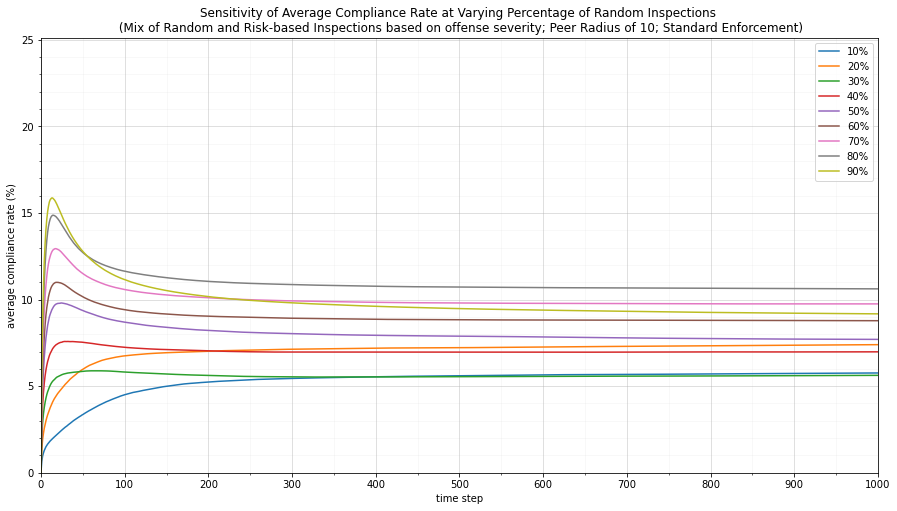

<Figure size 432x288 with 0 Axes>

In [25]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,25.1,5))
ax.set_yticks(np.arange(0,25.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_10_step['step'], mixoffense_standard_sharerandinsp_10_step['avg-compliance-rate'], label="10%")
plt.plot(mixoffense_standard_sharerandinsp_20_step['step'], mixoffense_standard_sharerandinsp_20_step['avg-compliance-rate'], label="20%")
plt.plot(mixoffense_standard_sharerandinsp_30_step['step'], mixoffense_standard_sharerandinsp_30_step['avg-compliance-rate'], label="30%")
plt.plot(mixoffense_standard_sharerandinsp_40_step['step'], mixoffense_standard_sharerandinsp_40_step['avg-compliance-rate'], label="40%")
plt.plot(mixoffense_standard_sharerandinsp_50_step['step'], mixoffense_standard_sharerandinsp_50_step['avg-compliance-rate'], label="50%")
plt.plot(mixoffense_standard_sharerandinsp_60_step['step'], mixoffense_standard_sharerandinsp_60_step['avg-compliance-rate'], label="60%")
plt.plot(mixoffense_standard_sharerandinsp_70_step['step'], mixoffense_standard_sharerandinsp_70_step['avg-compliance-rate'], label="70%")
plt.plot(mixoffense_standard_sharerandinsp_80_step['step'], mixoffense_standard_sharerandinsp_80_step['avg-compliance-rate'], label="80%")
plt.plot(mixoffense_standard_sharerandinsp_90_step['step'], mixoffense_standard_sharerandinsp_90_step['avg-compliance-rate'], label="90%")

plt.title("Sensitivity of Average Compliance Rate at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,25.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Percent Random Inspections- Time vs Avg Compliance Rate (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

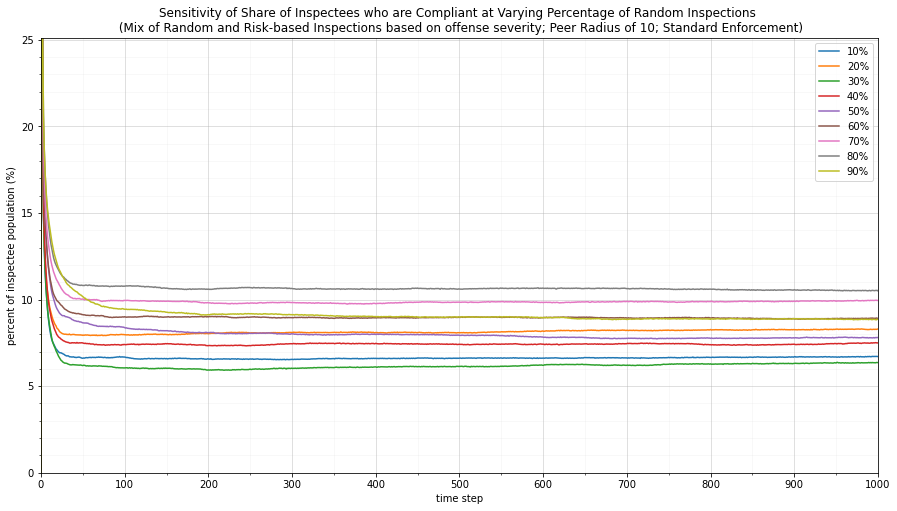

<Figure size 432x288 with 0 Axes>

In [26]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,25.1,5))
ax.set_yticks(np.arange(0,25.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_10_step['step'], mixoffense_standard_sharerandinsp_10_step['perc-compliant'], label="10%")
plt.plot(mixoffense_standard_sharerandinsp_20_step['step'], mixoffense_standard_sharerandinsp_20_step['perc-compliant'], label="20%")
plt.plot(mixoffense_standard_sharerandinsp_30_step['step'], mixoffense_standard_sharerandinsp_30_step['perc-compliant'], label="30%")
plt.plot(mixoffense_standard_sharerandinsp_40_step['step'], mixoffense_standard_sharerandinsp_40_step['perc-compliant'], label="40%")
plt.plot(mixoffense_standard_sharerandinsp_50_step['step'], mixoffense_standard_sharerandinsp_50_step['perc-compliant'], label="50%")
plt.plot(mixoffense_standard_sharerandinsp_60_step['step'], mixoffense_standard_sharerandinsp_60_step['perc-compliant'], label="60%")
plt.plot(mixoffense_standard_sharerandinsp_70_step['step'], mixoffense_standard_sharerandinsp_70_step['perc-compliant'], label="70%")
plt.plot(mixoffense_standard_sharerandinsp_80_step['step'], mixoffense_standard_sharerandinsp_80_step['perc-compliant'], label="80%")
plt.plot(mixoffense_standard_sharerandinsp_90_step['step'], mixoffense_standard_sharerandinsp_90_step['perc-compliant'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Compliant at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,25.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Compliant (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

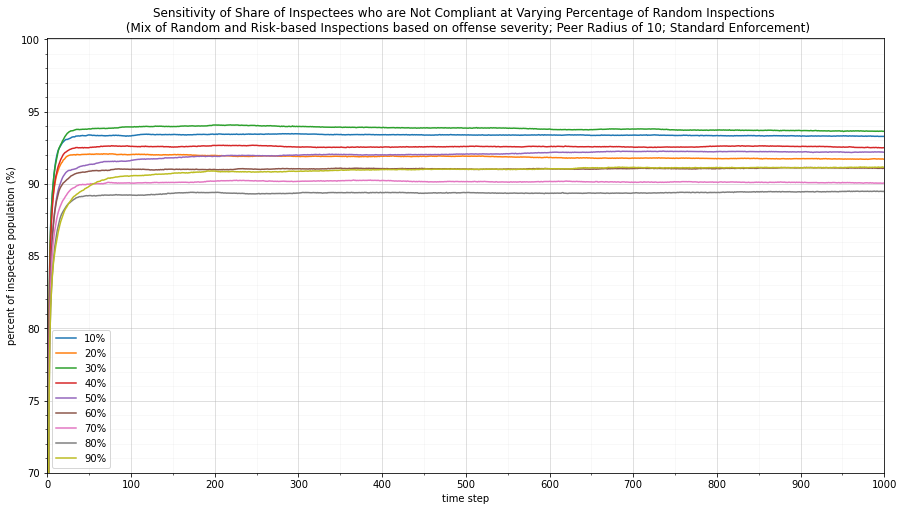

<Figure size 432x288 with 0 Axes>

In [28]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(70,100.1,5))
ax.set_yticks(np.arange(70,100.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_10_step['step'], mixoffense_standard_sharerandinsp_10_step['perc-noncompliant'], label="10%")
plt.plot(mixoffense_standard_sharerandinsp_20_step['step'], mixoffense_standard_sharerandinsp_20_step['perc-noncompliant'], label="20%")
plt.plot(mixoffense_standard_sharerandinsp_30_step['step'], mixoffense_standard_sharerandinsp_30_step['perc-noncompliant'], label="30%")
plt.plot(mixoffense_standard_sharerandinsp_40_step['step'], mixoffense_standard_sharerandinsp_40_step['perc-noncompliant'], label="40%")
plt.plot(mixoffense_standard_sharerandinsp_50_step['step'], mixoffense_standard_sharerandinsp_50_step['perc-noncompliant'], label="50%")
plt.plot(mixoffense_standard_sharerandinsp_60_step['step'], mixoffense_standard_sharerandinsp_60_step['perc-noncompliant'], label="60%")
plt.plot(mixoffense_standard_sharerandinsp_70_step['step'], mixoffense_standard_sharerandinsp_70_step['perc-noncompliant'], label="70%")
plt.plot(mixoffense_standard_sharerandinsp_80_step['step'], mixoffense_standard_sharerandinsp_80_step['perc-noncompliant'], label="80%")
plt.plot(mixoffense_standard_sharerandinsp_90_step['step'], mixoffense_standard_sharerandinsp_90_step['perc-noncompliant'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Not Compliant at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(70,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Not Compliant (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

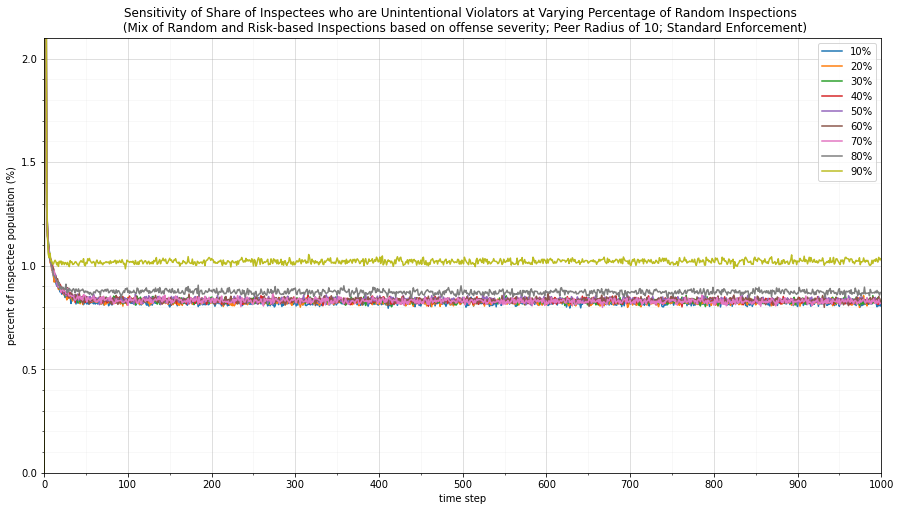

<Figure size 432x288 with 0 Axes>

In [30]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,2.1,.5))
ax.set_yticks(np.arange(0,2.1,.1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_10_step['step'], mixoffense_standard_sharerandinsp_10_step['perc-unintentional'], label="10%")
plt.plot(mixoffense_standard_sharerandinsp_20_step['step'], mixoffense_standard_sharerandinsp_20_step['perc-unintentional'], label="20%")
plt.plot(mixoffense_standard_sharerandinsp_30_step['step'], mixoffense_standard_sharerandinsp_30_step['perc-unintentional'], label="30%")
plt.plot(mixoffense_standard_sharerandinsp_40_step['step'], mixoffense_standard_sharerandinsp_40_step['perc-unintentional'], label="40%")
plt.plot(mixoffense_standard_sharerandinsp_50_step['step'], mixoffense_standard_sharerandinsp_50_step['perc-unintentional'], label="50%")
plt.plot(mixoffense_standard_sharerandinsp_60_step['step'], mixoffense_standard_sharerandinsp_60_step['perc-unintentional'], label="60%")
plt.plot(mixoffense_standard_sharerandinsp_70_step['step'], mixoffense_standard_sharerandinsp_70_step['perc-unintentional'], label="70%")
plt.plot(mixoffense_standard_sharerandinsp_80_step['step'], mixoffense_standard_sharerandinsp_80_step['perc-unintentional'], label="80%")
plt.plot(mixoffense_standard_sharerandinsp_90_step['step'], mixoffense_standard_sharerandinsp_90_step['perc-unintentional'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Unintentional Violators at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,2.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Unintentional (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

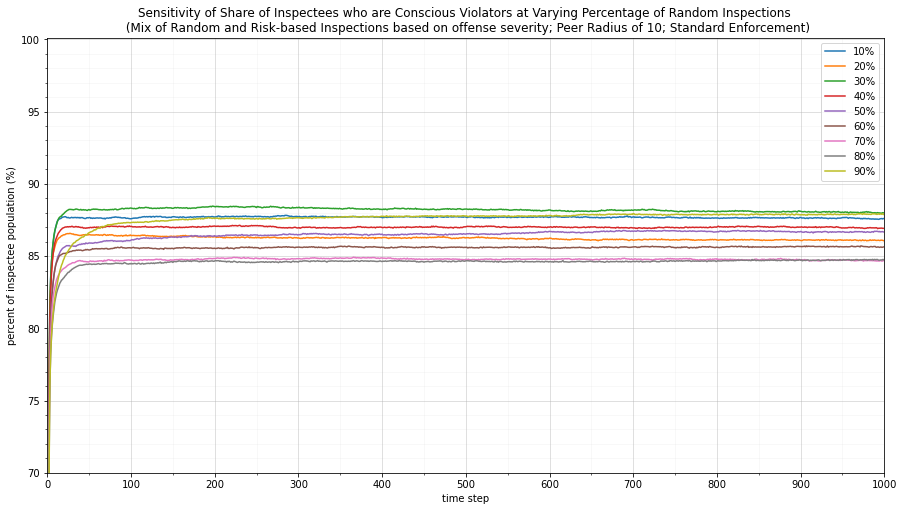

<Figure size 432x288 with 0 Axes>

In [31]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(70,100.1,5))
ax.set_yticks(np.arange(70,100.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_10_step['step'], mixoffense_standard_sharerandinsp_10_step['perc-conscious'], label="10%")
plt.plot(mixoffense_standard_sharerandinsp_20_step['step'], mixoffense_standard_sharerandinsp_20_step['perc-conscious'], label="20%")
plt.plot(mixoffense_standard_sharerandinsp_30_step['step'], mixoffense_standard_sharerandinsp_30_step['perc-conscious'], label="30%")
plt.plot(mixoffense_standard_sharerandinsp_40_step['step'], mixoffense_standard_sharerandinsp_40_step['perc-conscious'], label="40%")
plt.plot(mixoffense_standard_sharerandinsp_50_step['step'], mixoffense_standard_sharerandinsp_50_step['perc-conscious'], label="50%")
plt.plot(mixoffense_standard_sharerandinsp_60_step['step'], mixoffense_standard_sharerandinsp_60_step['perc-conscious'], label="60%")
plt.plot(mixoffense_standard_sharerandinsp_70_step['step'], mixoffense_standard_sharerandinsp_70_step['perc-conscious'], label="70%")
plt.plot(mixoffense_standard_sharerandinsp_80_step['step'], mixoffense_standard_sharerandinsp_80_step['perc-conscious'], label="80%")
plt.plot(mixoffense_standard_sharerandinsp_90_step['step'], mixoffense_standard_sharerandinsp_90_step['perc-conscious'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Conscious Violators at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(70,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Conscious (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

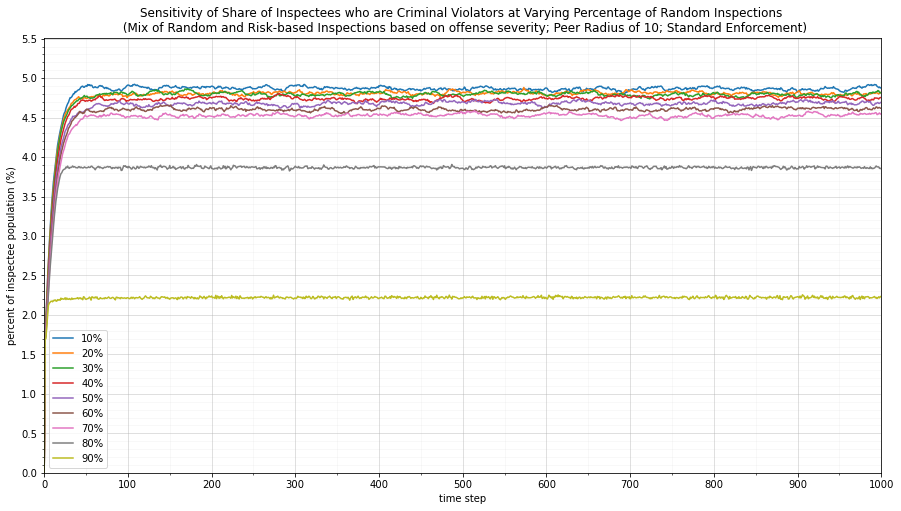

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,5.51,.5))
ax.set_yticks(np.arange(0,5.51,.1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_10_step['step'], mixoffense_standard_sharerandinsp_10_step['perc-criminal'], label="10%")
plt.plot(mixoffense_standard_sharerandinsp_20_step['step'], mixoffense_standard_sharerandinsp_20_step['perc-criminal'], label="20%")
plt.plot(mixoffense_standard_sharerandinsp_30_step['step'], mixoffense_standard_sharerandinsp_30_step['perc-criminal'], label="30%")
plt.plot(mixoffense_standard_sharerandinsp_40_step['step'], mixoffense_standard_sharerandinsp_40_step['perc-criminal'], label="40%")
plt.plot(mixoffense_standard_sharerandinsp_50_step['step'], mixoffense_standard_sharerandinsp_50_step['perc-criminal'], label="50%")
plt.plot(mixoffense_standard_sharerandinsp_60_step['step'], mixoffense_standard_sharerandinsp_60_step['perc-criminal'], label="60%")
plt.plot(mixoffense_standard_sharerandinsp_70_step['step'], mixoffense_standard_sharerandinsp_70_step['perc-criminal'], label="70%")
plt.plot(mixoffense_standard_sharerandinsp_80_step['step'], mixoffense_standard_sharerandinsp_80_step['perc-criminal'], label="80%")
plt.plot(mixoffense_standard_sharerandinsp_90_step['step'], mixoffense_standard_sharerandinsp_90_step['perc-criminal'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Criminal Violators at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,5.51)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Criminal (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

### Responsive Enforcement

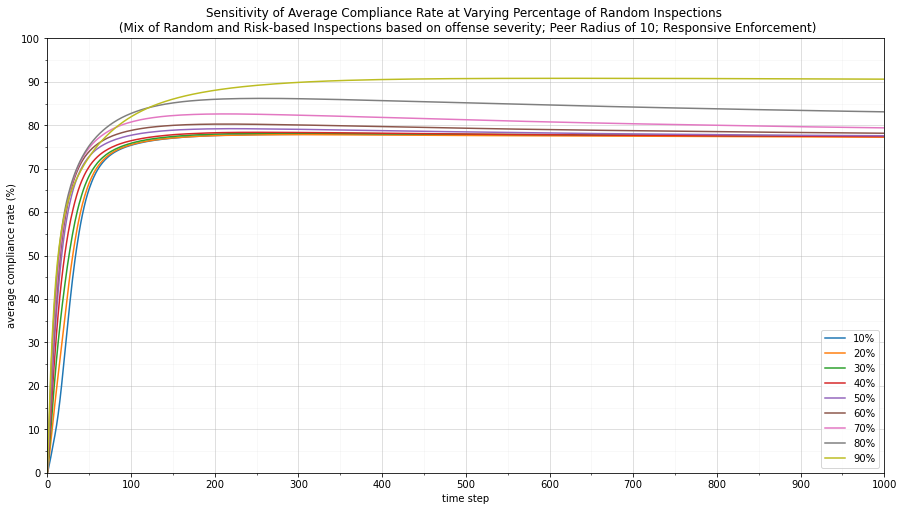

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_10_step['step'], mixoffense_resp_sharerandinsp_10_step['avg-compliance-rate'], label="10%")
plt.plot(mixoffense_resp_sharerandinsp_20_step['step'], mixoffense_resp_sharerandinsp_20_step['avg-compliance-rate'], label="20%")
plt.plot(mixoffense_resp_sharerandinsp_30_step['step'], mixoffense_resp_sharerandinsp_30_step['avg-compliance-rate'], label="30%")
plt.plot(mixoffense_resp_sharerandinsp_40_step['step'], mixoffense_resp_sharerandinsp_40_step['avg-compliance-rate'], label="40%")
plt.plot(mixoffense_resp_sharerandinsp_50_step['step'], mixoffense_resp_sharerandinsp_50_step['avg-compliance-rate'], label="50%")
plt.plot(mixoffense_resp_sharerandinsp_60_step['step'], mixoffense_resp_sharerandinsp_60_step['avg-compliance-rate'], label="60%")
plt.plot(mixoffense_resp_sharerandinsp_70_step['step'], mixoffense_resp_sharerandinsp_70_step['avg-compliance-rate'], label="70%")
plt.plot(mixoffense_resp_sharerandinsp_80_step['step'], mixoffense_resp_sharerandinsp_80_step['avg-compliance-rate'], label="80%")
plt.plot(mixoffense_resp_sharerandinsp_90_step['step'], mixoffense_resp_sharerandinsp_90_step['avg-compliance-rate'], label="90%")

plt.title("Sensitivity of Average Compliance Rate at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Percent Random Inspections- Time vs Avg Compliance Rate (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

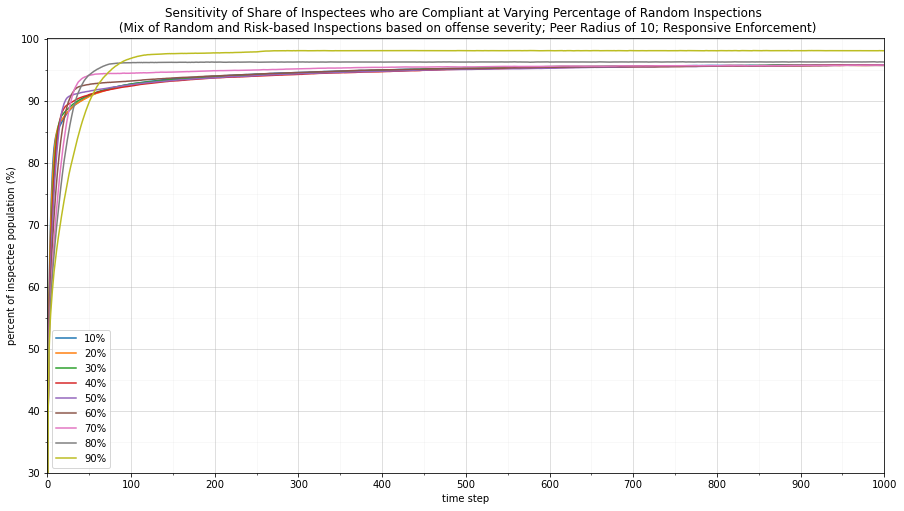

<Figure size 432x288 with 0 Axes>

In [36]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(30,100.1,10))
ax.set_yticks(np.arange(30,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_10_step['step'], mixoffense_resp_sharerandinsp_10_step['perc-compliant'], label="10%")
plt.plot(mixoffense_resp_sharerandinsp_20_step['step'], mixoffense_resp_sharerandinsp_20_step['perc-compliant'], label="20%")
plt.plot(mixoffense_resp_sharerandinsp_30_step['step'], mixoffense_resp_sharerandinsp_30_step['perc-compliant'], label="30%")
plt.plot(mixoffense_resp_sharerandinsp_40_step['step'], mixoffense_resp_sharerandinsp_40_step['perc-compliant'], label="40%")
plt.plot(mixoffense_resp_sharerandinsp_50_step['step'], mixoffense_resp_sharerandinsp_50_step['perc-compliant'], label="50%")
plt.plot(mixoffense_resp_sharerandinsp_60_step['step'], mixoffense_resp_sharerandinsp_60_step['perc-compliant'], label="60%")
plt.plot(mixoffense_resp_sharerandinsp_70_step['step'], mixoffense_resp_sharerandinsp_70_step['perc-compliant'], label="70%")
plt.plot(mixoffense_resp_sharerandinsp_80_step['step'], mixoffense_resp_sharerandinsp_80_step['perc-compliant'], label="80%")
plt.plot(mixoffense_resp_sharerandinsp_90_step['step'], mixoffense_resp_sharerandinsp_90_step['perc-compliant'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Compliant at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(30,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Compliant (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

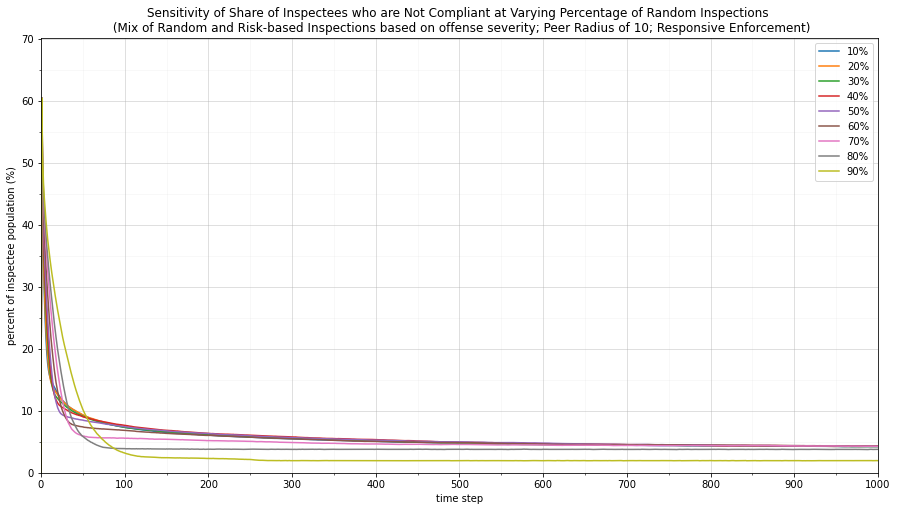

<Figure size 432x288 with 0 Axes>

In [37]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,70.1,10))
ax.set_yticks(np.arange(0,70.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_10_step['step'], mixoffense_resp_sharerandinsp_10_step['perc-noncompliant'], label="10%")
plt.plot(mixoffense_resp_sharerandinsp_20_step['step'], mixoffense_resp_sharerandinsp_20_step['perc-noncompliant'], label="20%")
plt.plot(mixoffense_resp_sharerandinsp_30_step['step'], mixoffense_resp_sharerandinsp_30_step['perc-noncompliant'], label="30%")
plt.plot(mixoffense_resp_sharerandinsp_40_step['step'], mixoffense_resp_sharerandinsp_40_step['perc-noncompliant'], label="40%")
plt.plot(mixoffense_resp_sharerandinsp_50_step['step'], mixoffense_resp_sharerandinsp_50_step['perc-noncompliant'], label="50%")
plt.plot(mixoffense_resp_sharerandinsp_60_step['step'], mixoffense_resp_sharerandinsp_60_step['perc-noncompliant'], label="60%")
plt.plot(mixoffense_resp_sharerandinsp_70_step['step'], mixoffense_resp_sharerandinsp_70_step['perc-noncompliant'], label="70%")
plt.plot(mixoffense_resp_sharerandinsp_80_step['step'], mixoffense_resp_sharerandinsp_80_step['perc-noncompliant'], label="80%")
plt.plot(mixoffense_resp_sharerandinsp_90_step['step'], mixoffense_resp_sharerandinsp_90_step['perc-noncompliant'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Not Compliant at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,70.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Not Compliant (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

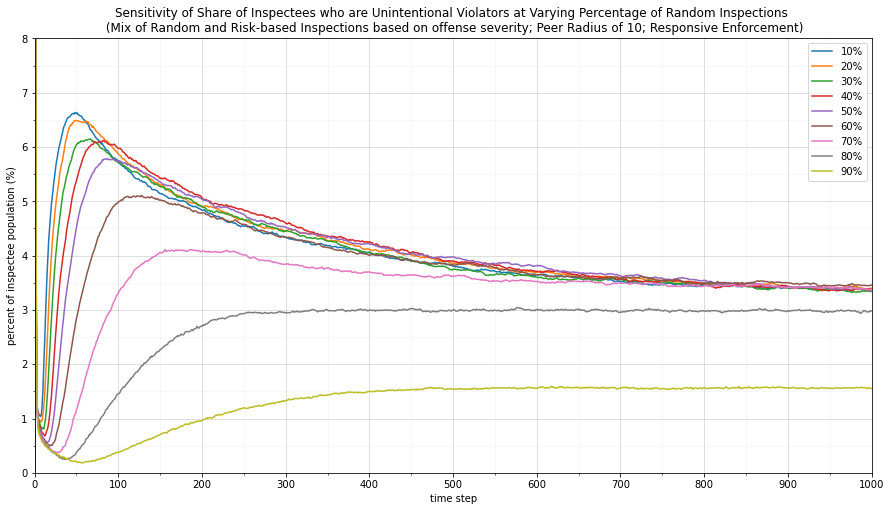

<Figure size 432x288 with 0 Axes>

In [38]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,8.01,1))
ax.set_yticks(np.arange(0,8.01,.5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_10_step['step'], mixoffense_resp_sharerandinsp_10_step['perc-unintentional'], label="10%")
plt.plot(mixoffense_resp_sharerandinsp_20_step['step'], mixoffense_resp_sharerandinsp_20_step['perc-unintentional'], label="20%")
plt.plot(mixoffense_resp_sharerandinsp_30_step['step'], mixoffense_resp_sharerandinsp_30_step['perc-unintentional'], label="30%")
plt.plot(mixoffense_resp_sharerandinsp_40_step['step'], mixoffense_resp_sharerandinsp_40_step['perc-unintentional'], label="40%")
plt.plot(mixoffense_resp_sharerandinsp_50_step['step'], mixoffense_resp_sharerandinsp_50_step['perc-unintentional'], label="50%")
plt.plot(mixoffense_resp_sharerandinsp_60_step['step'], mixoffense_resp_sharerandinsp_60_step['perc-unintentional'], label="60%")
plt.plot(mixoffense_resp_sharerandinsp_70_step['step'], mixoffense_resp_sharerandinsp_70_step['perc-unintentional'], label="70%")
plt.plot(mixoffense_resp_sharerandinsp_80_step['step'], mixoffense_resp_sharerandinsp_80_step['perc-unintentional'], label="80%")
plt.plot(mixoffense_resp_sharerandinsp_90_step['step'], mixoffense_resp_sharerandinsp_90_step['perc-unintentional'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Unintentional Violators at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,8.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Unintentional (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

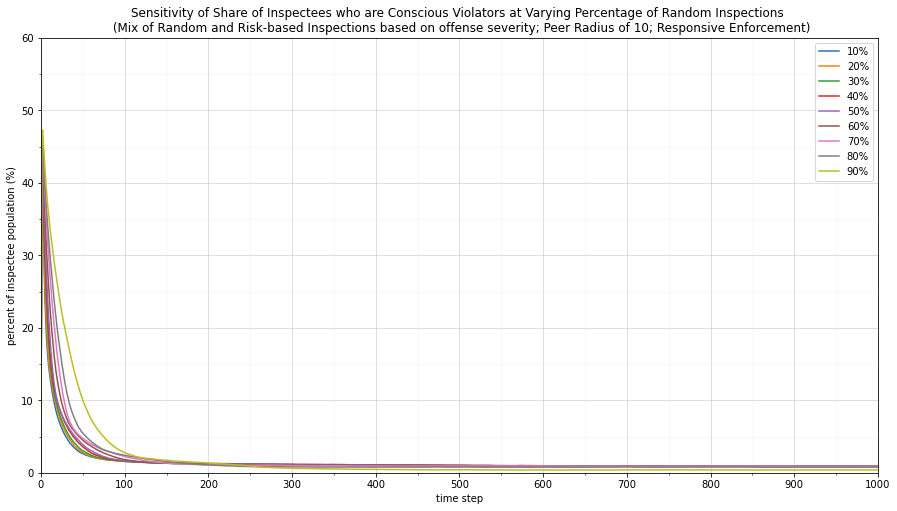

<Figure size 432x288 with 0 Axes>

In [39]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,60.01,10))
ax.set_yticks(np.arange(0,60.01,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_10_step['step'], mixoffense_resp_sharerandinsp_10_step['perc-conscious'], label="10%")
plt.plot(mixoffense_resp_sharerandinsp_20_step['step'], mixoffense_resp_sharerandinsp_20_step['perc-conscious'], label="20%")
plt.plot(mixoffense_resp_sharerandinsp_30_step['step'], mixoffense_resp_sharerandinsp_30_step['perc-conscious'], label="30%")
plt.plot(mixoffense_resp_sharerandinsp_40_step['step'], mixoffense_resp_sharerandinsp_40_step['perc-conscious'], label="40%")
plt.plot(mixoffense_resp_sharerandinsp_50_step['step'], mixoffense_resp_sharerandinsp_50_step['perc-conscious'], label="50%")
plt.plot(mixoffense_resp_sharerandinsp_60_step['step'], mixoffense_resp_sharerandinsp_60_step['perc-conscious'], label="60%")
plt.plot(mixoffense_resp_sharerandinsp_70_step['step'], mixoffense_resp_sharerandinsp_70_step['perc-conscious'], label="70%")
plt.plot(mixoffense_resp_sharerandinsp_80_step['step'], mixoffense_resp_sharerandinsp_80_step['perc-conscious'], label="80%")
plt.plot(mixoffense_resp_sharerandinsp_90_step['step'], mixoffense_resp_sharerandinsp_90_step['perc-conscious'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Conscious Violators at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,60.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Conscious (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

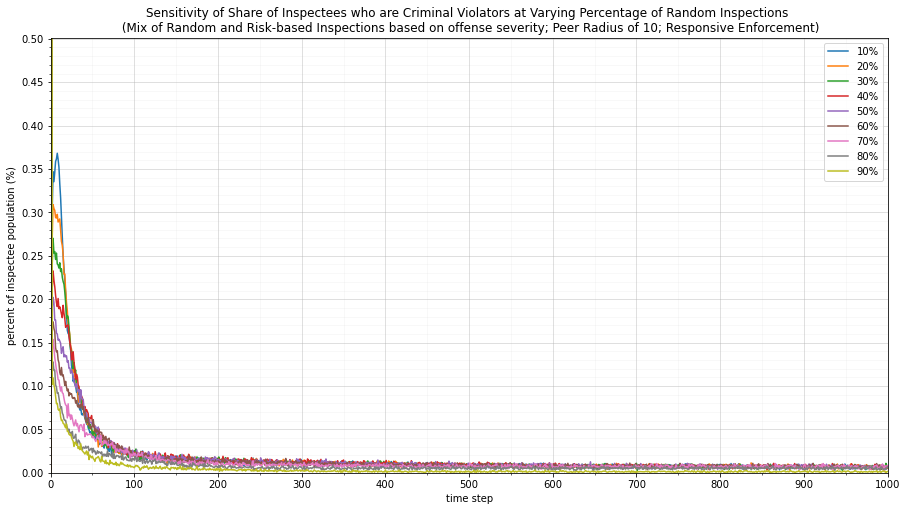

<Figure size 432x288 with 0 Axes>

In [40]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,.501,.05))
ax.set_yticks(np.arange(0,.501,.01), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_10_step['step'], mixoffense_resp_sharerandinsp_10_step['perc-criminal'], label="10%")
plt.plot(mixoffense_resp_sharerandinsp_20_step['step'], mixoffense_resp_sharerandinsp_20_step['perc-criminal'], label="20%")
plt.plot(mixoffense_resp_sharerandinsp_30_step['step'], mixoffense_resp_sharerandinsp_30_step['perc-criminal'], label="30%")
plt.plot(mixoffense_resp_sharerandinsp_40_step['step'], mixoffense_resp_sharerandinsp_40_step['perc-criminal'], label="40%")
plt.plot(mixoffense_resp_sharerandinsp_50_step['step'], mixoffense_resp_sharerandinsp_50_step['perc-criminal'], label="50%")
plt.plot(mixoffense_resp_sharerandinsp_60_step['step'], mixoffense_resp_sharerandinsp_60_step['perc-criminal'], label="60%")
plt.plot(mixoffense_resp_sharerandinsp_70_step['step'], mixoffense_resp_sharerandinsp_70_step['perc-criminal'], label="70%")
plt.plot(mixoffense_resp_sharerandinsp_80_step['step'], mixoffense_resp_sharerandinsp_80_step['perc-criminal'], label="80%")
plt.plot(mixoffense_resp_sharerandinsp_90_step['step'], mixoffense_resp_sharerandinsp_90_step['perc-criminal'], label="90%")

plt.title("Sensitivity of Share of Inspectees who are Criminal Violators at Varying Percentage of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectee population (%)')
plt.xlim(0,1000)
plt.ylim(0,.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Percent Random Inspections- Time vs Perc Criminal (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

## Group data by run and plot results by run

In [44]:
# Create new dataframes by run
for i, x in mixoffense_standard_sharerandinsp_10.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_10_' + str(i)] = x
    
for i, x in mixoffense_standard_sharerandinsp_20.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_20_' + str(i)] = x

for i, x in mixoffense_standard_sharerandinsp_30.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_30_' + str(i)] = x

for i, x in mixoffense_standard_sharerandinsp_40.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_40_' + str(i)] = x

for i, x in mixoffense_standard_sharerandinsp_50.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_50_' + str(i)] = x
    
for i, x in mixoffense_standard_sharerandinsp_60.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_60_' + str(i)] = x

for i, x in mixoffense_standard_sharerandinsp_70.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_70_' + str(i)] = x

for i, x in mixoffense_standard_sharerandinsp_80.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_80_' + str(i)] = x
    
for i, x in mixoffense_standard_sharerandinsp_90.groupby('run_num'):
    globals()['mixoffense_standard_sharerandinsp_90_' + str(i)] = x

In [46]:
# Create new dataframes by run
for i, x in mixoffense_resp_sharerandinsp_10.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_10_' + str(i)] = x
    
for i, x in mixoffense_resp_sharerandinsp_20.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_20_' + str(i)] = x

for i, x in mixoffense_resp_sharerandinsp_30.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_30_' + str(i)] = x

for i, x in mixoffense_resp_sharerandinsp_40.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_40_' + str(i)] = x

for i, x in mixoffense_resp_sharerandinsp_50.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_50_' + str(i)] = x
    
for i, x in mixoffense_resp_sharerandinsp_60.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_60_' + str(i)] = x

for i, x in mixoffense_resp_sharerandinsp_70.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_70_' + str(i)] = x

for i, x in mixoffense_resp_sharerandinsp_80.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_80_' + str(i)] = x
    
for i, x in mixoffense_resp_sharerandinsp_90.groupby('run_num'):
    globals()['mixoffense_resp_sharerandinsp_90_' + str(i)] = x

### Standard enforcement

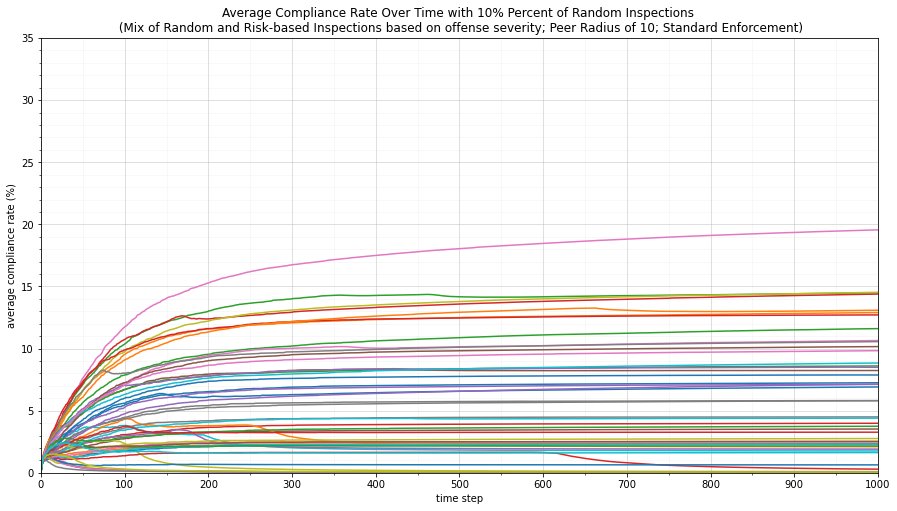

<Figure size 432x288 with 0 Axes>

In [47]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_10_1['step'],mixoffense_standard_sharerandinsp_10_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_2['step'],mixoffense_standard_sharerandinsp_10_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_3['step'],mixoffense_standard_sharerandinsp_10_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_4['step'],mixoffense_standard_sharerandinsp_10_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_5['step'],mixoffense_standard_sharerandinsp_10_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_6['step'],mixoffense_standard_sharerandinsp_10_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_7['step'],mixoffense_standard_sharerandinsp_10_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_8['step'],mixoffense_standard_sharerandinsp_10_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_9['step'],mixoffense_standard_sharerandinsp_10_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_10['step'],mixoffense_standard_sharerandinsp_10_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_11['step'],mixoffense_standard_sharerandinsp_10_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_12['step'],mixoffense_standard_sharerandinsp_10_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_13['step'],mixoffense_standard_sharerandinsp_10_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_14['step'],mixoffense_standard_sharerandinsp_10_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_15['step'],mixoffense_standard_sharerandinsp_10_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_16['step'],mixoffense_standard_sharerandinsp_10_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_17['step'],mixoffense_standard_sharerandinsp_10_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_18['step'],mixoffense_standard_sharerandinsp_10_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_19['step'],mixoffense_standard_sharerandinsp_10_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_20['step'],mixoffense_standard_sharerandinsp_10_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_21['step'],mixoffense_standard_sharerandinsp_10_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_22['step'],mixoffense_standard_sharerandinsp_10_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_23['step'],mixoffense_standard_sharerandinsp_10_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_24['step'],mixoffense_standard_sharerandinsp_10_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_25['step'],mixoffense_standard_sharerandinsp_10_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_26['step'],mixoffense_standard_sharerandinsp_10_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_27['step'],mixoffense_standard_sharerandinsp_10_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_28['step'],mixoffense_standard_sharerandinsp_10_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_29['step'],mixoffense_standard_sharerandinsp_10_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_30['step'],mixoffense_standard_sharerandinsp_10_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_31['step'],mixoffense_standard_sharerandinsp_10_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_32['step'],mixoffense_standard_sharerandinsp_10_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_33['step'],mixoffense_standard_sharerandinsp_10_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_34['step'],mixoffense_standard_sharerandinsp_10_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_35['step'],mixoffense_standard_sharerandinsp_10_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_36['step'],mixoffense_standard_sharerandinsp_10_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_37['step'],mixoffense_standard_sharerandinsp_10_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_38['step'],mixoffense_standard_sharerandinsp_10_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_39['step'],mixoffense_standard_sharerandinsp_10_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_40['step'],mixoffense_standard_sharerandinsp_10_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_41['step'],mixoffense_standard_sharerandinsp_10_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_42['step'],mixoffense_standard_sharerandinsp_10_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_43['step'],mixoffense_standard_sharerandinsp_10_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_44['step'],mixoffense_standard_sharerandinsp_10_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_45['step'],mixoffense_standard_sharerandinsp_10_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_46['step'],mixoffense_standard_sharerandinsp_10_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_47['step'],mixoffense_standard_sharerandinsp_10_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_48['step'],mixoffense_standard_sharerandinsp_10_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_49['step'],mixoffense_standard_sharerandinsp_10_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_10_50['step'],mixoffense_standard_sharerandinsp_10_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 10% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections10- Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

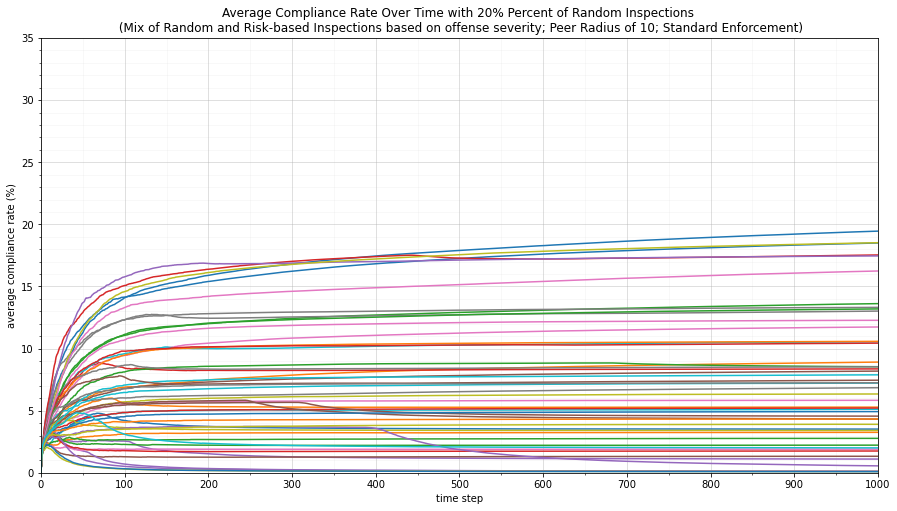

<Figure size 432x288 with 0 Axes>

In [48]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_20_1['step'],mixoffense_standard_sharerandinsp_20_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_2['step'],mixoffense_standard_sharerandinsp_20_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_3['step'],mixoffense_standard_sharerandinsp_20_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_4['step'],mixoffense_standard_sharerandinsp_20_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_5['step'],mixoffense_standard_sharerandinsp_20_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_6['step'],mixoffense_standard_sharerandinsp_20_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_7['step'],mixoffense_standard_sharerandinsp_20_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_8['step'],mixoffense_standard_sharerandinsp_20_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_9['step'],mixoffense_standard_sharerandinsp_20_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_10['step'],mixoffense_standard_sharerandinsp_20_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_11['step'],mixoffense_standard_sharerandinsp_20_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_12['step'],mixoffense_standard_sharerandinsp_20_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_13['step'],mixoffense_standard_sharerandinsp_20_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_14['step'],mixoffense_standard_sharerandinsp_20_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_15['step'],mixoffense_standard_sharerandinsp_20_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_16['step'],mixoffense_standard_sharerandinsp_20_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_17['step'],mixoffense_standard_sharerandinsp_20_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_18['step'],mixoffense_standard_sharerandinsp_20_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_19['step'],mixoffense_standard_sharerandinsp_20_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_20['step'],mixoffense_standard_sharerandinsp_20_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_21['step'],mixoffense_standard_sharerandinsp_20_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_22['step'],mixoffense_standard_sharerandinsp_20_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_23['step'],mixoffense_standard_sharerandinsp_20_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_24['step'],mixoffense_standard_sharerandinsp_20_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_25['step'],mixoffense_standard_sharerandinsp_20_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_26['step'],mixoffense_standard_sharerandinsp_20_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_27['step'],mixoffense_standard_sharerandinsp_20_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_28['step'],mixoffense_standard_sharerandinsp_20_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_29['step'],mixoffense_standard_sharerandinsp_20_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_30['step'],mixoffense_standard_sharerandinsp_20_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_31['step'],mixoffense_standard_sharerandinsp_20_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_32['step'],mixoffense_standard_sharerandinsp_20_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_33['step'],mixoffense_standard_sharerandinsp_20_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_34['step'],mixoffense_standard_sharerandinsp_20_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_35['step'],mixoffense_standard_sharerandinsp_20_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_36['step'],mixoffense_standard_sharerandinsp_20_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_37['step'],mixoffense_standard_sharerandinsp_20_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_38['step'],mixoffense_standard_sharerandinsp_20_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_39['step'],mixoffense_standard_sharerandinsp_20_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_40['step'],mixoffense_standard_sharerandinsp_20_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_41['step'],mixoffense_standard_sharerandinsp_20_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_42['step'],mixoffense_standard_sharerandinsp_20_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_43['step'],mixoffense_standard_sharerandinsp_20_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_44['step'],mixoffense_standard_sharerandinsp_20_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_45['step'],mixoffense_standard_sharerandinsp_20_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_46['step'],mixoffense_standard_sharerandinsp_20_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_47['step'],mixoffense_standard_sharerandinsp_20_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_48['step'],mixoffense_standard_sharerandinsp_20_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_49['step'],mixoffense_standard_sharerandinsp_20_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_20_50['step'],mixoffense_standard_sharerandinsp_20_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 20% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections20_ Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

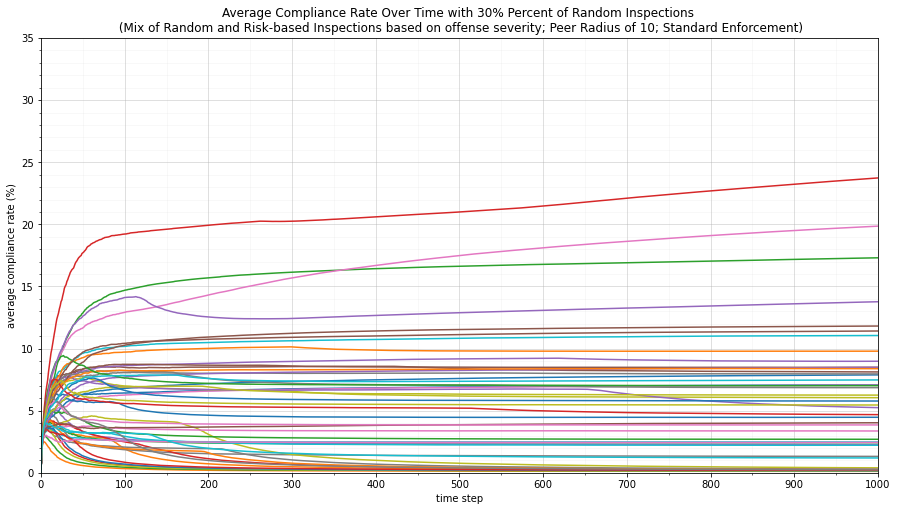

<Figure size 432x288 with 0 Axes>

In [50]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_30_1['step'],mixoffense_standard_sharerandinsp_30_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_2['step'],mixoffense_standard_sharerandinsp_30_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_3['step'],mixoffense_standard_sharerandinsp_30_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_4['step'],mixoffense_standard_sharerandinsp_30_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_5['step'],mixoffense_standard_sharerandinsp_30_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_6['step'],mixoffense_standard_sharerandinsp_30_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_7['step'],mixoffense_standard_sharerandinsp_30_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_8['step'],mixoffense_standard_sharerandinsp_30_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_9['step'],mixoffense_standard_sharerandinsp_30_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_10['step'],mixoffense_standard_sharerandinsp_30_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_11['step'],mixoffense_standard_sharerandinsp_30_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_12['step'],mixoffense_standard_sharerandinsp_30_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_13['step'],mixoffense_standard_sharerandinsp_30_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_14['step'],mixoffense_standard_sharerandinsp_30_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_15['step'],mixoffense_standard_sharerandinsp_30_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_16['step'],mixoffense_standard_sharerandinsp_30_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_17['step'],mixoffense_standard_sharerandinsp_30_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_18['step'],mixoffense_standard_sharerandinsp_30_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_19['step'],mixoffense_standard_sharerandinsp_30_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_20['step'],mixoffense_standard_sharerandinsp_30_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_21['step'],mixoffense_standard_sharerandinsp_30_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_22['step'],mixoffense_standard_sharerandinsp_30_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_23['step'],mixoffense_standard_sharerandinsp_30_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_24['step'],mixoffense_standard_sharerandinsp_30_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_25['step'],mixoffense_standard_sharerandinsp_30_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_26['step'],mixoffense_standard_sharerandinsp_30_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_27['step'],mixoffense_standard_sharerandinsp_30_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_28['step'],mixoffense_standard_sharerandinsp_30_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_29['step'],mixoffense_standard_sharerandinsp_30_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_30['step'],mixoffense_standard_sharerandinsp_30_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_31['step'],mixoffense_standard_sharerandinsp_30_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_32['step'],mixoffense_standard_sharerandinsp_30_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_33['step'],mixoffense_standard_sharerandinsp_30_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_34['step'],mixoffense_standard_sharerandinsp_30_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_35['step'],mixoffense_standard_sharerandinsp_30_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_36['step'],mixoffense_standard_sharerandinsp_30_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_37['step'],mixoffense_standard_sharerandinsp_30_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_38['step'],mixoffense_standard_sharerandinsp_30_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_39['step'],mixoffense_standard_sharerandinsp_30_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_40['step'],mixoffense_standard_sharerandinsp_30_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_41['step'],mixoffense_standard_sharerandinsp_30_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_42['step'],mixoffense_standard_sharerandinsp_30_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_43['step'],mixoffense_standard_sharerandinsp_30_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_44['step'],mixoffense_standard_sharerandinsp_30_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_45['step'],mixoffense_standard_sharerandinsp_30_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_46['step'],mixoffense_standard_sharerandinsp_30_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_47['step'],mixoffense_standard_sharerandinsp_30_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_48['step'],mixoffense_standard_sharerandinsp_30_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_49['step'],mixoffense_standard_sharerandinsp_30_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_30_50['step'],mixoffense_standard_sharerandinsp_30_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 30% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections30_ Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

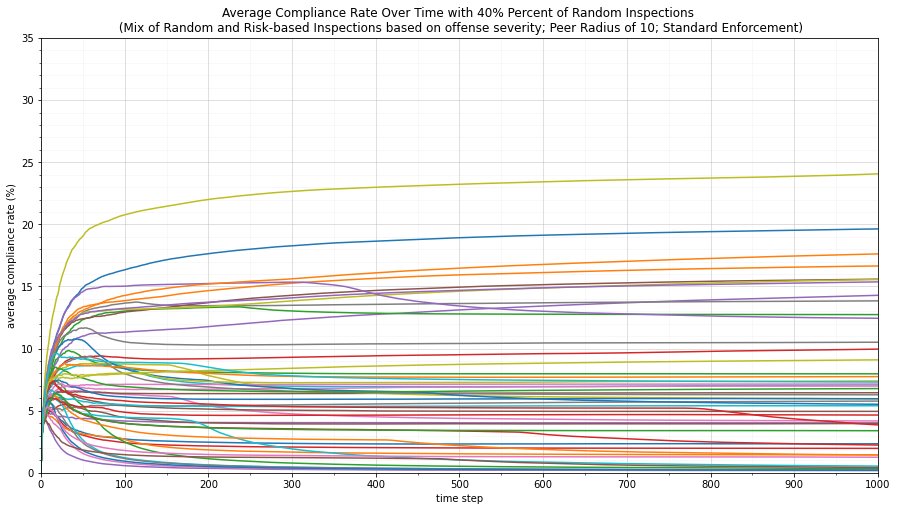

<Figure size 432x288 with 0 Axes>

In [52]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_40_1['step'],mixoffense_standard_sharerandinsp_40_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_2['step'],mixoffense_standard_sharerandinsp_40_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_3['step'],mixoffense_standard_sharerandinsp_40_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_4['step'],mixoffense_standard_sharerandinsp_40_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_5['step'],mixoffense_standard_sharerandinsp_40_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_6['step'],mixoffense_standard_sharerandinsp_40_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_7['step'],mixoffense_standard_sharerandinsp_40_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_8['step'],mixoffense_standard_sharerandinsp_40_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_9['step'],mixoffense_standard_sharerandinsp_40_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_10['step'],mixoffense_standard_sharerandinsp_40_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_11['step'],mixoffense_standard_sharerandinsp_40_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_12['step'],mixoffense_standard_sharerandinsp_40_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_13['step'],mixoffense_standard_sharerandinsp_40_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_14['step'],mixoffense_standard_sharerandinsp_40_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_15['step'],mixoffense_standard_sharerandinsp_40_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_16['step'],mixoffense_standard_sharerandinsp_40_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_17['step'],mixoffense_standard_sharerandinsp_40_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_18['step'],mixoffense_standard_sharerandinsp_40_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_19['step'],mixoffense_standard_sharerandinsp_40_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_20['step'],mixoffense_standard_sharerandinsp_40_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_21['step'],mixoffense_standard_sharerandinsp_40_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_22['step'],mixoffense_standard_sharerandinsp_40_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_23['step'],mixoffense_standard_sharerandinsp_40_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_24['step'],mixoffense_standard_sharerandinsp_40_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_25['step'],mixoffense_standard_sharerandinsp_40_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_26['step'],mixoffense_standard_sharerandinsp_40_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_27['step'],mixoffense_standard_sharerandinsp_40_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_28['step'],mixoffense_standard_sharerandinsp_40_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_29['step'],mixoffense_standard_sharerandinsp_40_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_30['step'],mixoffense_standard_sharerandinsp_40_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_31['step'],mixoffense_standard_sharerandinsp_40_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_32['step'],mixoffense_standard_sharerandinsp_40_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_33['step'],mixoffense_standard_sharerandinsp_40_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_34['step'],mixoffense_standard_sharerandinsp_40_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_35['step'],mixoffense_standard_sharerandinsp_40_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_36['step'],mixoffense_standard_sharerandinsp_40_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_37['step'],mixoffense_standard_sharerandinsp_40_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_38['step'],mixoffense_standard_sharerandinsp_40_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_39['step'],mixoffense_standard_sharerandinsp_40_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_40['step'],mixoffense_standard_sharerandinsp_40_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_41['step'],mixoffense_standard_sharerandinsp_40_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_42['step'],mixoffense_standard_sharerandinsp_40_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_43['step'],mixoffense_standard_sharerandinsp_40_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_44['step'],mixoffense_standard_sharerandinsp_40_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_45['step'],mixoffense_standard_sharerandinsp_40_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_46['step'],mixoffense_standard_sharerandinsp_40_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_47['step'],mixoffense_standard_sharerandinsp_40_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_48['step'],mixoffense_standard_sharerandinsp_40_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_49['step'],mixoffense_standard_sharerandinsp_40_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_40_50['step'],mixoffense_standard_sharerandinsp_40_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 40% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections40_ Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

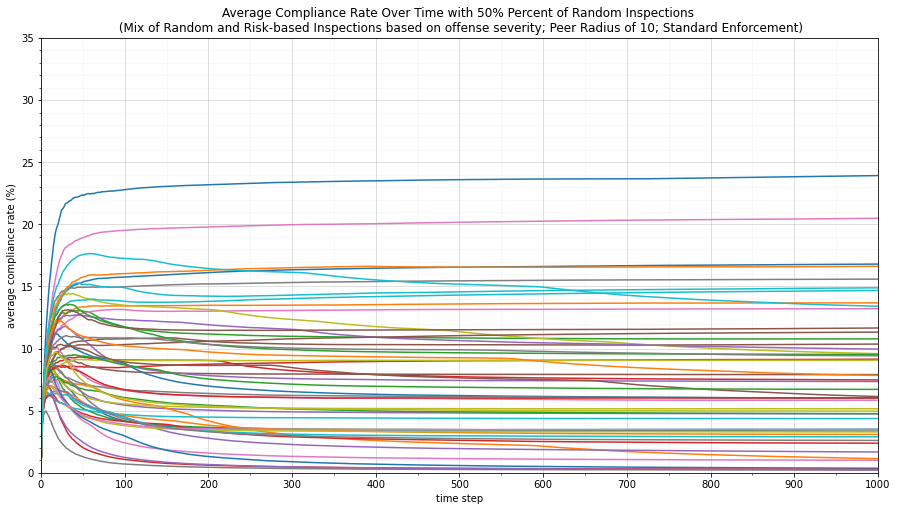

<Figure size 432x288 with 0 Axes>

In [53]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_50_1['step'],mixoffense_standard_sharerandinsp_50_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_2['step'],mixoffense_standard_sharerandinsp_50_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_3['step'],mixoffense_standard_sharerandinsp_50_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_4['step'],mixoffense_standard_sharerandinsp_50_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_5['step'],mixoffense_standard_sharerandinsp_50_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_6['step'],mixoffense_standard_sharerandinsp_50_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_7['step'],mixoffense_standard_sharerandinsp_50_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_8['step'],mixoffense_standard_sharerandinsp_50_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_9['step'],mixoffense_standard_sharerandinsp_50_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_10['step'],mixoffense_standard_sharerandinsp_50_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_11['step'],mixoffense_standard_sharerandinsp_50_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_12['step'],mixoffense_standard_sharerandinsp_50_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_13['step'],mixoffense_standard_sharerandinsp_50_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_14['step'],mixoffense_standard_sharerandinsp_50_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_15['step'],mixoffense_standard_sharerandinsp_50_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_16['step'],mixoffense_standard_sharerandinsp_50_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_17['step'],mixoffense_standard_sharerandinsp_50_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_18['step'],mixoffense_standard_sharerandinsp_50_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_19['step'],mixoffense_standard_sharerandinsp_50_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_20['step'],mixoffense_standard_sharerandinsp_50_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_21['step'],mixoffense_standard_sharerandinsp_50_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_22['step'],mixoffense_standard_sharerandinsp_50_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_23['step'],mixoffense_standard_sharerandinsp_50_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_24['step'],mixoffense_standard_sharerandinsp_50_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_25['step'],mixoffense_standard_sharerandinsp_50_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_26['step'],mixoffense_standard_sharerandinsp_50_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_27['step'],mixoffense_standard_sharerandinsp_50_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_28['step'],mixoffense_standard_sharerandinsp_50_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_29['step'],mixoffense_standard_sharerandinsp_50_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_30['step'],mixoffense_standard_sharerandinsp_50_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_31['step'],mixoffense_standard_sharerandinsp_50_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_32['step'],mixoffense_standard_sharerandinsp_50_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_33['step'],mixoffense_standard_sharerandinsp_50_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_34['step'],mixoffense_standard_sharerandinsp_50_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_35['step'],mixoffense_standard_sharerandinsp_50_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_36['step'],mixoffense_standard_sharerandinsp_50_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_37['step'],mixoffense_standard_sharerandinsp_50_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_38['step'],mixoffense_standard_sharerandinsp_50_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_39['step'],mixoffense_standard_sharerandinsp_50_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_40['step'],mixoffense_standard_sharerandinsp_50_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_41['step'],mixoffense_standard_sharerandinsp_50_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_42['step'],mixoffense_standard_sharerandinsp_50_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_43['step'],mixoffense_standard_sharerandinsp_50_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_44['step'],mixoffense_standard_sharerandinsp_50_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_45['step'],mixoffense_standard_sharerandinsp_50_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_46['step'],mixoffense_standard_sharerandinsp_50_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_47['step'],mixoffense_standard_sharerandinsp_50_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_48['step'],mixoffense_standard_sharerandinsp_50_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_49['step'],mixoffense_standard_sharerandinsp_50_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_50_50['step'],mixoffense_standard_sharerandinsp_50_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 50% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections50_ Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

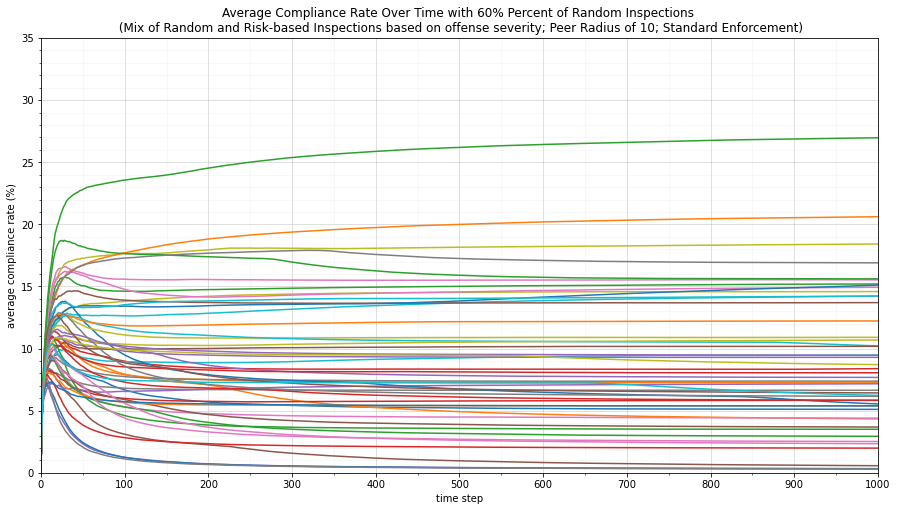

<Figure size 432x288 with 0 Axes>

In [54]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_60_1['step'],mixoffense_standard_sharerandinsp_60_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_2['step'],mixoffense_standard_sharerandinsp_60_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_3['step'],mixoffense_standard_sharerandinsp_60_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_4['step'],mixoffense_standard_sharerandinsp_60_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_5['step'],mixoffense_standard_sharerandinsp_60_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_6['step'],mixoffense_standard_sharerandinsp_60_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_7['step'],mixoffense_standard_sharerandinsp_60_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_8['step'],mixoffense_standard_sharerandinsp_60_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_9['step'],mixoffense_standard_sharerandinsp_60_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_10['step'],mixoffense_standard_sharerandinsp_60_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_11['step'],mixoffense_standard_sharerandinsp_60_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_12['step'],mixoffense_standard_sharerandinsp_60_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_13['step'],mixoffense_standard_sharerandinsp_60_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_14['step'],mixoffense_standard_sharerandinsp_60_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_15['step'],mixoffense_standard_sharerandinsp_60_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_16['step'],mixoffense_standard_sharerandinsp_60_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_17['step'],mixoffense_standard_sharerandinsp_60_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_18['step'],mixoffense_standard_sharerandinsp_60_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_19['step'],mixoffense_standard_sharerandinsp_60_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_20['step'],mixoffense_standard_sharerandinsp_60_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_21['step'],mixoffense_standard_sharerandinsp_60_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_22['step'],mixoffense_standard_sharerandinsp_60_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_23['step'],mixoffense_standard_sharerandinsp_60_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_24['step'],mixoffense_standard_sharerandinsp_60_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_25['step'],mixoffense_standard_sharerandinsp_60_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_26['step'],mixoffense_standard_sharerandinsp_60_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_27['step'],mixoffense_standard_sharerandinsp_60_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_28['step'],mixoffense_standard_sharerandinsp_60_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_29['step'],mixoffense_standard_sharerandinsp_60_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_30['step'],mixoffense_standard_sharerandinsp_60_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_31['step'],mixoffense_standard_sharerandinsp_60_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_32['step'],mixoffense_standard_sharerandinsp_60_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_33['step'],mixoffense_standard_sharerandinsp_60_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_34['step'],mixoffense_standard_sharerandinsp_60_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_35['step'],mixoffense_standard_sharerandinsp_60_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_36['step'],mixoffense_standard_sharerandinsp_60_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_37['step'],mixoffense_standard_sharerandinsp_60_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_38['step'],mixoffense_standard_sharerandinsp_60_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_39['step'],mixoffense_standard_sharerandinsp_60_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_40['step'],mixoffense_standard_sharerandinsp_60_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_41['step'],mixoffense_standard_sharerandinsp_60_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_42['step'],mixoffense_standard_sharerandinsp_60_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_43['step'],mixoffense_standard_sharerandinsp_60_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_44['step'],mixoffense_standard_sharerandinsp_60_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_45['step'],mixoffense_standard_sharerandinsp_60_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_46['step'],mixoffense_standard_sharerandinsp_60_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_47['step'],mixoffense_standard_sharerandinsp_60_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_48['step'],mixoffense_standard_sharerandinsp_60_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_49['step'],mixoffense_standard_sharerandinsp_60_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_60_50['step'],mixoffense_standard_sharerandinsp_60_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 60% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections60_ Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

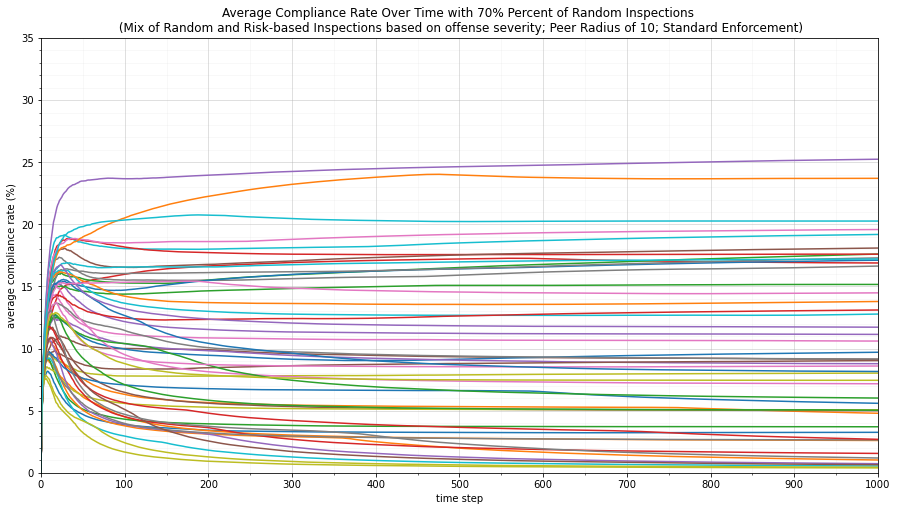

<Figure size 432x288 with 0 Axes>

In [55]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_70_1['step'],mixoffense_standard_sharerandinsp_70_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_2['step'],mixoffense_standard_sharerandinsp_70_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_3['step'],mixoffense_standard_sharerandinsp_70_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_4['step'],mixoffense_standard_sharerandinsp_70_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_5['step'],mixoffense_standard_sharerandinsp_70_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_6['step'],mixoffense_standard_sharerandinsp_70_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_7['step'],mixoffense_standard_sharerandinsp_70_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_8['step'],mixoffense_standard_sharerandinsp_70_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_9['step'],mixoffense_standard_sharerandinsp_70_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_10['step'],mixoffense_standard_sharerandinsp_70_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_11['step'],mixoffense_standard_sharerandinsp_70_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_12['step'],mixoffense_standard_sharerandinsp_70_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_13['step'],mixoffense_standard_sharerandinsp_70_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_14['step'],mixoffense_standard_sharerandinsp_70_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_15['step'],mixoffense_standard_sharerandinsp_70_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_16['step'],mixoffense_standard_sharerandinsp_70_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_17['step'],mixoffense_standard_sharerandinsp_70_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_18['step'],mixoffense_standard_sharerandinsp_70_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_19['step'],mixoffense_standard_sharerandinsp_70_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_20['step'],mixoffense_standard_sharerandinsp_70_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_21['step'],mixoffense_standard_sharerandinsp_70_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_22['step'],mixoffense_standard_sharerandinsp_70_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_23['step'],mixoffense_standard_sharerandinsp_70_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_24['step'],mixoffense_standard_sharerandinsp_70_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_25['step'],mixoffense_standard_sharerandinsp_70_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_26['step'],mixoffense_standard_sharerandinsp_70_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_27['step'],mixoffense_standard_sharerandinsp_70_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_28['step'],mixoffense_standard_sharerandinsp_70_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_29['step'],mixoffense_standard_sharerandinsp_70_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_30['step'],mixoffense_standard_sharerandinsp_70_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_31['step'],mixoffense_standard_sharerandinsp_70_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_32['step'],mixoffense_standard_sharerandinsp_70_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_33['step'],mixoffense_standard_sharerandinsp_70_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_34['step'],mixoffense_standard_sharerandinsp_70_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_35['step'],mixoffense_standard_sharerandinsp_70_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_36['step'],mixoffense_standard_sharerandinsp_70_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_37['step'],mixoffense_standard_sharerandinsp_70_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_38['step'],mixoffense_standard_sharerandinsp_70_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_39['step'],mixoffense_standard_sharerandinsp_70_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_40['step'],mixoffense_standard_sharerandinsp_70_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_41['step'],mixoffense_standard_sharerandinsp_70_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_42['step'],mixoffense_standard_sharerandinsp_70_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_43['step'],mixoffense_standard_sharerandinsp_70_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_44['step'],mixoffense_standard_sharerandinsp_70_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_45['step'],mixoffense_standard_sharerandinsp_70_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_46['step'],mixoffense_standard_sharerandinsp_70_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_47['step'],mixoffense_standard_sharerandinsp_70_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_48['step'],mixoffense_standard_sharerandinsp_70_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_49['step'],mixoffense_standard_sharerandinsp_70_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_70_50['step'],mixoffense_standard_sharerandinsp_70_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 70% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections70_ Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

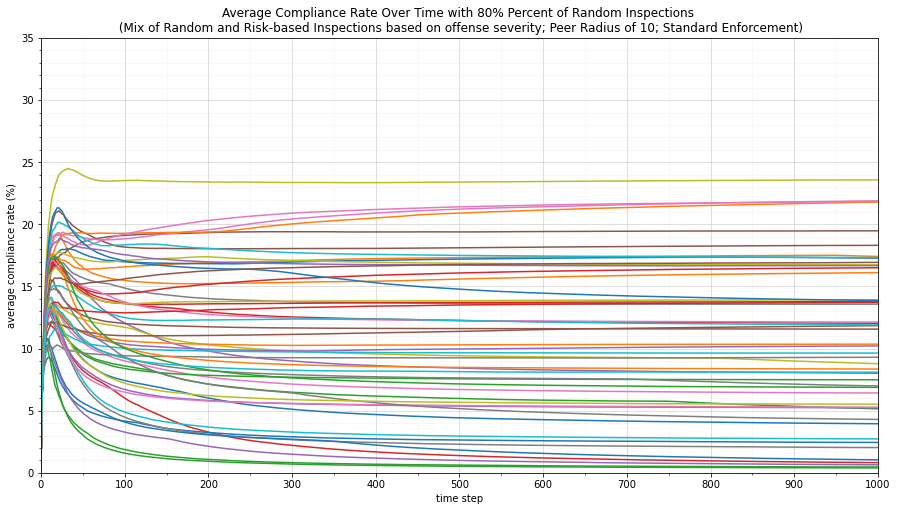

<Figure size 432x288 with 0 Axes>

In [56]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_80_1['step'],mixoffense_standard_sharerandinsp_80_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_2['step'],mixoffense_standard_sharerandinsp_80_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_3['step'],mixoffense_standard_sharerandinsp_80_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_4['step'],mixoffense_standard_sharerandinsp_80_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_5['step'],mixoffense_standard_sharerandinsp_80_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_6['step'],mixoffense_standard_sharerandinsp_80_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_7['step'],mixoffense_standard_sharerandinsp_80_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_8['step'],mixoffense_standard_sharerandinsp_80_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_9['step'],mixoffense_standard_sharerandinsp_80_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_10['step'],mixoffense_standard_sharerandinsp_80_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_11['step'],mixoffense_standard_sharerandinsp_80_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_12['step'],mixoffense_standard_sharerandinsp_80_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_13['step'],mixoffense_standard_sharerandinsp_80_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_14['step'],mixoffense_standard_sharerandinsp_80_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_15['step'],mixoffense_standard_sharerandinsp_80_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_16['step'],mixoffense_standard_sharerandinsp_80_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_17['step'],mixoffense_standard_sharerandinsp_80_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_18['step'],mixoffense_standard_sharerandinsp_80_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_19['step'],mixoffense_standard_sharerandinsp_80_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_20['step'],mixoffense_standard_sharerandinsp_80_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_21['step'],mixoffense_standard_sharerandinsp_80_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_22['step'],mixoffense_standard_sharerandinsp_80_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_23['step'],mixoffense_standard_sharerandinsp_80_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_24['step'],mixoffense_standard_sharerandinsp_80_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_25['step'],mixoffense_standard_sharerandinsp_80_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_26['step'],mixoffense_standard_sharerandinsp_80_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_27['step'],mixoffense_standard_sharerandinsp_80_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_28['step'],mixoffense_standard_sharerandinsp_80_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_29['step'],mixoffense_standard_sharerandinsp_80_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_30['step'],mixoffense_standard_sharerandinsp_80_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_31['step'],mixoffense_standard_sharerandinsp_80_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_32['step'],mixoffense_standard_sharerandinsp_80_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_33['step'],mixoffense_standard_sharerandinsp_80_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_34['step'],mixoffense_standard_sharerandinsp_80_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_35['step'],mixoffense_standard_sharerandinsp_80_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_36['step'],mixoffense_standard_sharerandinsp_80_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_37['step'],mixoffense_standard_sharerandinsp_80_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_38['step'],mixoffense_standard_sharerandinsp_80_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_39['step'],mixoffense_standard_sharerandinsp_80_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_40['step'],mixoffense_standard_sharerandinsp_80_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_41['step'],mixoffense_standard_sharerandinsp_80_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_42['step'],mixoffense_standard_sharerandinsp_80_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_43['step'],mixoffense_standard_sharerandinsp_80_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_44['step'],mixoffense_standard_sharerandinsp_80_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_45['step'],mixoffense_standard_sharerandinsp_80_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_46['step'],mixoffense_standard_sharerandinsp_80_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_47['step'],mixoffense_standard_sharerandinsp_80_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_48['step'],mixoffense_standard_sharerandinsp_80_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_49['step'],mixoffense_standard_sharerandinsp_80_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_80_50['step'],mixoffense_standard_sharerandinsp_80_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 80% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections80_ Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

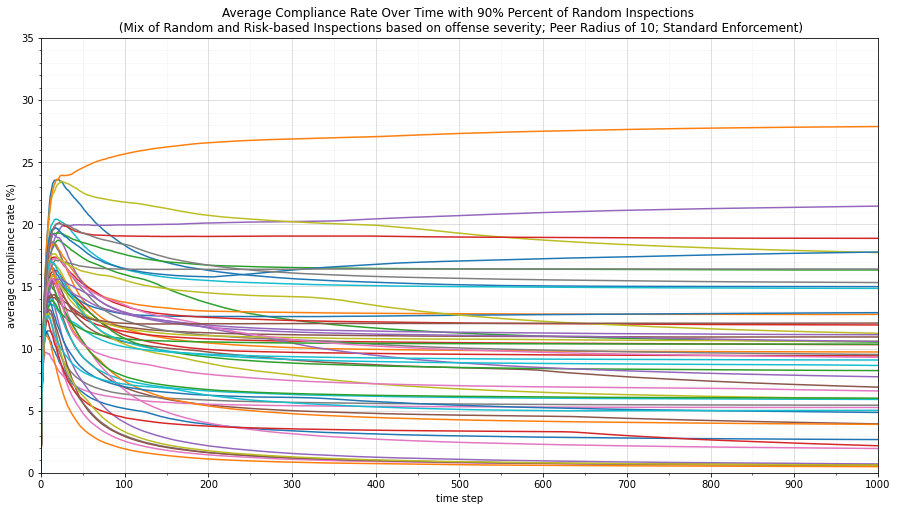

<Figure size 432x288 with 0 Axes>

In [58]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,35.1,5))
ax.set_yticks(np.arange(0,35.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_90_1['step'],mixoffense_standard_sharerandinsp_90_1['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_2['step'],mixoffense_standard_sharerandinsp_90_2['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_3['step'],mixoffense_standard_sharerandinsp_90_3['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_4['step'],mixoffense_standard_sharerandinsp_90_4['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_5['step'],mixoffense_standard_sharerandinsp_90_5['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_6['step'],mixoffense_standard_sharerandinsp_90_6['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_7['step'],mixoffense_standard_sharerandinsp_90_7['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_8['step'],mixoffense_standard_sharerandinsp_90_8['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_9['step'],mixoffense_standard_sharerandinsp_90_9['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_10['step'],mixoffense_standard_sharerandinsp_90_10['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_11['step'],mixoffense_standard_sharerandinsp_90_11['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_12['step'],mixoffense_standard_sharerandinsp_90_12['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_13['step'],mixoffense_standard_sharerandinsp_90_13['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_14['step'],mixoffense_standard_sharerandinsp_90_14['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_15['step'],mixoffense_standard_sharerandinsp_90_15['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_16['step'],mixoffense_standard_sharerandinsp_90_16['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_17['step'],mixoffense_standard_sharerandinsp_90_17['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_18['step'],mixoffense_standard_sharerandinsp_90_18['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_19['step'],mixoffense_standard_sharerandinsp_90_19['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_20['step'],mixoffense_standard_sharerandinsp_90_20['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_21['step'],mixoffense_standard_sharerandinsp_90_21['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_22['step'],mixoffense_standard_sharerandinsp_90_22['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_23['step'],mixoffense_standard_sharerandinsp_90_23['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_24['step'],mixoffense_standard_sharerandinsp_90_24['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_25['step'],mixoffense_standard_sharerandinsp_90_25['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_26['step'],mixoffense_standard_sharerandinsp_90_26['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_27['step'],mixoffense_standard_sharerandinsp_90_27['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_28['step'],mixoffense_standard_sharerandinsp_90_28['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_29['step'],mixoffense_standard_sharerandinsp_90_29['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_30['step'],mixoffense_standard_sharerandinsp_90_30['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_31['step'],mixoffense_standard_sharerandinsp_90_31['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_32['step'],mixoffense_standard_sharerandinsp_90_32['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_33['step'],mixoffense_standard_sharerandinsp_90_33['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_34['step'],mixoffense_standard_sharerandinsp_90_34['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_35['step'],mixoffense_standard_sharerandinsp_90_35['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_36['step'],mixoffense_standard_sharerandinsp_90_36['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_37['step'],mixoffense_standard_sharerandinsp_90_37['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_38['step'],mixoffense_standard_sharerandinsp_90_38['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_39['step'],mixoffense_standard_sharerandinsp_90_39['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_40['step'],mixoffense_standard_sharerandinsp_90_40['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_41['step'],mixoffense_standard_sharerandinsp_90_41['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_42['step'],mixoffense_standard_sharerandinsp_90_42['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_43['step'],mixoffense_standard_sharerandinsp_90_43['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_44['step'],mixoffense_standard_sharerandinsp_90_44['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_45['step'],mixoffense_standard_sharerandinsp_90_45['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_46['step'],mixoffense_standard_sharerandinsp_90_46['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_47['step'],mixoffense_standard_sharerandinsp_90_47['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_48['step'],mixoffense_standard_sharerandinsp_90_48['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_49['step'],mixoffense_standard_sharerandinsp_90_49['avg-compliance-rate'])
plt.plot(mixoffense_standard_sharerandinsp_90_50['step'],mixoffense_standard_sharerandinsp_90_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 90% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,35.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections90_ Time vs Avg Compliance All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

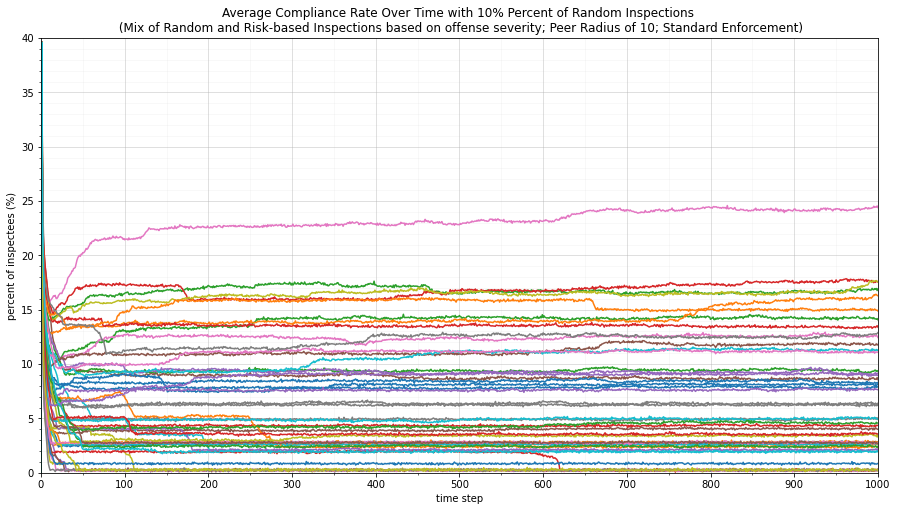

<Figure size 432x288 with 0 Axes>

In [65]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_10_1['step'],mixoffense_standard_sharerandinsp_10_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_2['step'],mixoffense_standard_sharerandinsp_10_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_3['step'],mixoffense_standard_sharerandinsp_10_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_4['step'],mixoffense_standard_sharerandinsp_10_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_5['step'],mixoffense_standard_sharerandinsp_10_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_6['step'],mixoffense_standard_sharerandinsp_10_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_7['step'],mixoffense_standard_sharerandinsp_10_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_8['step'],mixoffense_standard_sharerandinsp_10_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_9['step'],mixoffense_standard_sharerandinsp_10_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_10['step'],mixoffense_standard_sharerandinsp_10_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_11['step'],mixoffense_standard_sharerandinsp_10_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_12['step'],mixoffense_standard_sharerandinsp_10_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_13['step'],mixoffense_standard_sharerandinsp_10_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_14['step'],mixoffense_standard_sharerandinsp_10_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_15['step'],mixoffense_standard_sharerandinsp_10_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_16['step'],mixoffense_standard_sharerandinsp_10_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_17['step'],mixoffense_standard_sharerandinsp_10_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_18['step'],mixoffense_standard_sharerandinsp_10_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_19['step'],mixoffense_standard_sharerandinsp_10_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_20['step'],mixoffense_standard_sharerandinsp_10_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_21['step'],mixoffense_standard_sharerandinsp_10_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_22['step'],mixoffense_standard_sharerandinsp_10_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_23['step'],mixoffense_standard_sharerandinsp_10_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_24['step'],mixoffense_standard_sharerandinsp_10_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_25['step'],mixoffense_standard_sharerandinsp_10_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_26['step'],mixoffense_standard_sharerandinsp_10_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_27['step'],mixoffense_standard_sharerandinsp_10_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_28['step'],mixoffense_standard_sharerandinsp_10_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_29['step'],mixoffense_standard_sharerandinsp_10_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_30['step'],mixoffense_standard_sharerandinsp_10_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_31['step'],mixoffense_standard_sharerandinsp_10_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_32['step'],mixoffense_standard_sharerandinsp_10_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_33['step'],mixoffense_standard_sharerandinsp_10_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_34['step'],mixoffense_standard_sharerandinsp_10_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_35['step'],mixoffense_standard_sharerandinsp_10_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_36['step'],mixoffense_standard_sharerandinsp_10_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_37['step'],mixoffense_standard_sharerandinsp_10_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_38['step'],mixoffense_standard_sharerandinsp_10_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_39['step'],mixoffense_standard_sharerandinsp_10_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_40['step'],mixoffense_standard_sharerandinsp_10_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_41['step'],mixoffense_standard_sharerandinsp_10_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_42['step'],mixoffense_standard_sharerandinsp_10_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_43['step'],mixoffense_standard_sharerandinsp_10_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_44['step'],mixoffense_standard_sharerandinsp_10_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_45['step'],mixoffense_standard_sharerandinsp_10_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_46['step'],mixoffense_standard_sharerandinsp_10_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_47['step'],mixoffense_standard_sharerandinsp_10_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_48['step'],mixoffense_standard_sharerandinsp_10_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_49['step'],mixoffense_standard_sharerandinsp_10_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_10_50['step'],mixoffense_standard_sharerandinsp_10_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 10% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections10- Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

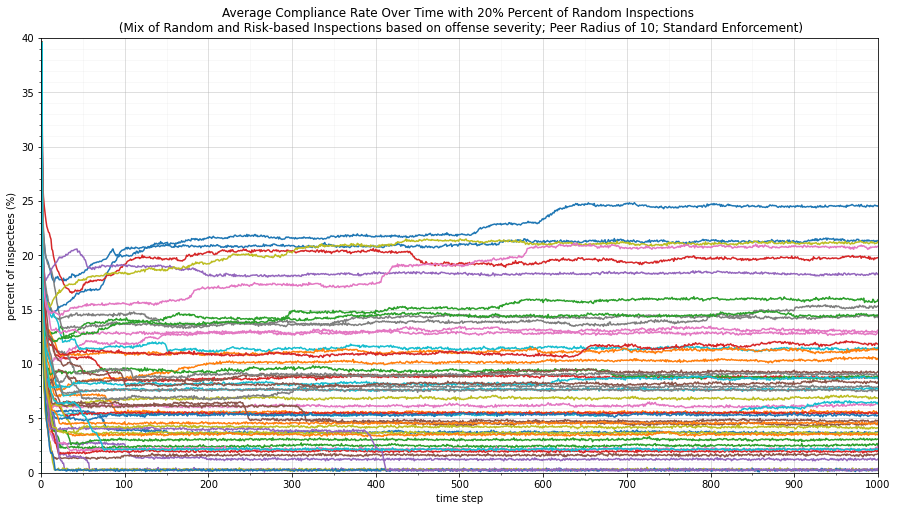

<Figure size 432x288 with 0 Axes>

In [64]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_20_1['step'],mixoffense_standard_sharerandinsp_20_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_2['step'],mixoffense_standard_sharerandinsp_20_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_3['step'],mixoffense_standard_sharerandinsp_20_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_4['step'],mixoffense_standard_sharerandinsp_20_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_5['step'],mixoffense_standard_sharerandinsp_20_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_6['step'],mixoffense_standard_sharerandinsp_20_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_7['step'],mixoffense_standard_sharerandinsp_20_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_8['step'],mixoffense_standard_sharerandinsp_20_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_9['step'],mixoffense_standard_sharerandinsp_20_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_10['step'],mixoffense_standard_sharerandinsp_20_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_11['step'],mixoffense_standard_sharerandinsp_20_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_12['step'],mixoffense_standard_sharerandinsp_20_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_13['step'],mixoffense_standard_sharerandinsp_20_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_14['step'],mixoffense_standard_sharerandinsp_20_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_15['step'],mixoffense_standard_sharerandinsp_20_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_16['step'],mixoffense_standard_sharerandinsp_20_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_17['step'],mixoffense_standard_sharerandinsp_20_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_18['step'],mixoffense_standard_sharerandinsp_20_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_19['step'],mixoffense_standard_sharerandinsp_20_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_20['step'],mixoffense_standard_sharerandinsp_20_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_21['step'],mixoffense_standard_sharerandinsp_20_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_22['step'],mixoffense_standard_sharerandinsp_20_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_23['step'],mixoffense_standard_sharerandinsp_20_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_24['step'],mixoffense_standard_sharerandinsp_20_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_25['step'],mixoffense_standard_sharerandinsp_20_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_26['step'],mixoffense_standard_sharerandinsp_20_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_27['step'],mixoffense_standard_sharerandinsp_20_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_28['step'],mixoffense_standard_sharerandinsp_20_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_29['step'],mixoffense_standard_sharerandinsp_20_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_30['step'],mixoffense_standard_sharerandinsp_20_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_31['step'],mixoffense_standard_sharerandinsp_20_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_32['step'],mixoffense_standard_sharerandinsp_20_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_33['step'],mixoffense_standard_sharerandinsp_20_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_34['step'],mixoffense_standard_sharerandinsp_20_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_35['step'],mixoffense_standard_sharerandinsp_20_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_36['step'],mixoffense_standard_sharerandinsp_20_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_37['step'],mixoffense_standard_sharerandinsp_20_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_38['step'],mixoffense_standard_sharerandinsp_20_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_39['step'],mixoffense_standard_sharerandinsp_20_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_40['step'],mixoffense_standard_sharerandinsp_20_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_41['step'],mixoffense_standard_sharerandinsp_20_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_42['step'],mixoffense_standard_sharerandinsp_20_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_43['step'],mixoffense_standard_sharerandinsp_20_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_44['step'],mixoffense_standard_sharerandinsp_20_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_45['step'],mixoffense_standard_sharerandinsp_20_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_46['step'],mixoffense_standard_sharerandinsp_20_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_47['step'],mixoffense_standard_sharerandinsp_20_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_48['step'],mixoffense_standard_sharerandinsp_20_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_49['step'],mixoffense_standard_sharerandinsp_20_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_20_50['step'],mixoffense_standard_sharerandinsp_20_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 20% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections20_ Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

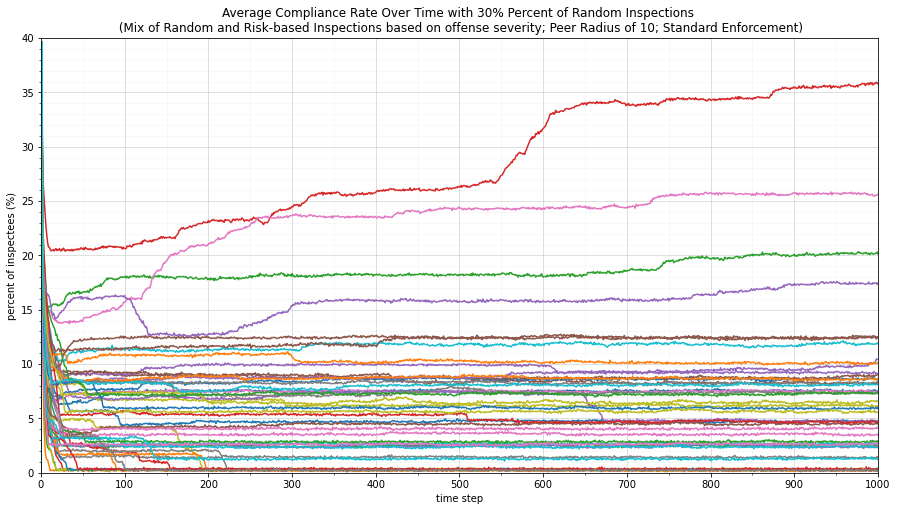

<Figure size 432x288 with 0 Axes>

In [63]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_30_1['step'],mixoffense_standard_sharerandinsp_30_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_2['step'],mixoffense_standard_sharerandinsp_30_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_3['step'],mixoffense_standard_sharerandinsp_30_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_4['step'],mixoffense_standard_sharerandinsp_30_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_5['step'],mixoffense_standard_sharerandinsp_30_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_6['step'],mixoffense_standard_sharerandinsp_30_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_7['step'],mixoffense_standard_sharerandinsp_30_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_8['step'],mixoffense_standard_sharerandinsp_30_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_9['step'],mixoffense_standard_sharerandinsp_30_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_10['step'],mixoffense_standard_sharerandinsp_30_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_11['step'],mixoffense_standard_sharerandinsp_30_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_12['step'],mixoffense_standard_sharerandinsp_30_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_13['step'],mixoffense_standard_sharerandinsp_30_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_14['step'],mixoffense_standard_sharerandinsp_30_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_15['step'],mixoffense_standard_sharerandinsp_30_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_16['step'],mixoffense_standard_sharerandinsp_30_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_17['step'],mixoffense_standard_sharerandinsp_30_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_18['step'],mixoffense_standard_sharerandinsp_30_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_19['step'],mixoffense_standard_sharerandinsp_30_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_20['step'],mixoffense_standard_sharerandinsp_30_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_21['step'],mixoffense_standard_sharerandinsp_30_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_22['step'],mixoffense_standard_sharerandinsp_30_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_23['step'],mixoffense_standard_sharerandinsp_30_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_24['step'],mixoffense_standard_sharerandinsp_30_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_25['step'],mixoffense_standard_sharerandinsp_30_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_26['step'],mixoffense_standard_sharerandinsp_30_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_27['step'],mixoffense_standard_sharerandinsp_30_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_28['step'],mixoffense_standard_sharerandinsp_30_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_29['step'],mixoffense_standard_sharerandinsp_30_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_30['step'],mixoffense_standard_sharerandinsp_30_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_31['step'],mixoffense_standard_sharerandinsp_30_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_32['step'],mixoffense_standard_sharerandinsp_30_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_33['step'],mixoffense_standard_sharerandinsp_30_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_34['step'],mixoffense_standard_sharerandinsp_30_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_35['step'],mixoffense_standard_sharerandinsp_30_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_36['step'],mixoffense_standard_sharerandinsp_30_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_37['step'],mixoffense_standard_sharerandinsp_30_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_38['step'],mixoffense_standard_sharerandinsp_30_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_39['step'],mixoffense_standard_sharerandinsp_30_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_40['step'],mixoffense_standard_sharerandinsp_30_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_41['step'],mixoffense_standard_sharerandinsp_30_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_42['step'],mixoffense_standard_sharerandinsp_30_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_43['step'],mixoffense_standard_sharerandinsp_30_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_44['step'],mixoffense_standard_sharerandinsp_30_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_45['step'],mixoffense_standard_sharerandinsp_30_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_46['step'],mixoffense_standard_sharerandinsp_30_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_47['step'],mixoffense_standard_sharerandinsp_30_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_48['step'],mixoffense_standard_sharerandinsp_30_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_49['step'],mixoffense_standard_sharerandinsp_30_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_30_50['step'],mixoffense_standard_sharerandinsp_30_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 30% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections30_ Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

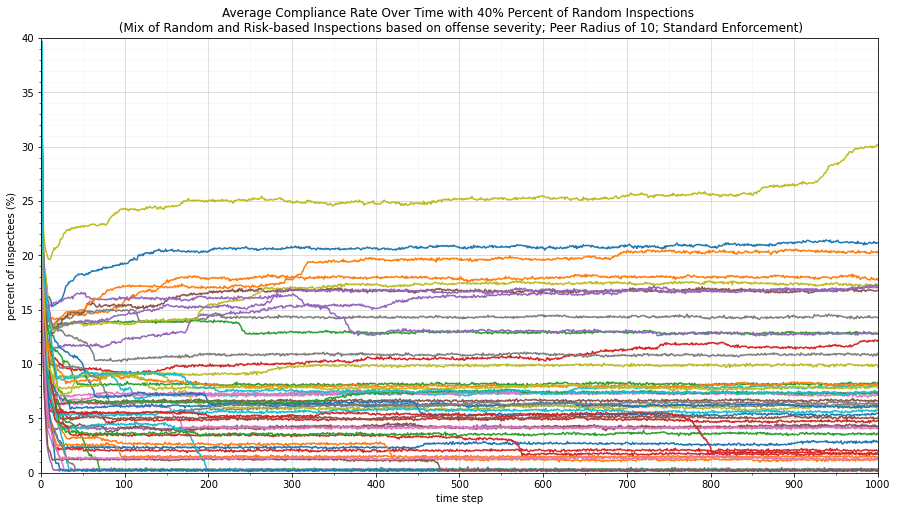

<Figure size 432x288 with 0 Axes>

In [66]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_40_1['step'],mixoffense_standard_sharerandinsp_40_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_2['step'],mixoffense_standard_sharerandinsp_40_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_3['step'],mixoffense_standard_sharerandinsp_40_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_4['step'],mixoffense_standard_sharerandinsp_40_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_5['step'],mixoffense_standard_sharerandinsp_40_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_6['step'],mixoffense_standard_sharerandinsp_40_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_7['step'],mixoffense_standard_sharerandinsp_40_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_8['step'],mixoffense_standard_sharerandinsp_40_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_9['step'],mixoffense_standard_sharerandinsp_40_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_10['step'],mixoffense_standard_sharerandinsp_40_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_11['step'],mixoffense_standard_sharerandinsp_40_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_12['step'],mixoffense_standard_sharerandinsp_40_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_13['step'],mixoffense_standard_sharerandinsp_40_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_14['step'],mixoffense_standard_sharerandinsp_40_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_15['step'],mixoffense_standard_sharerandinsp_40_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_16['step'],mixoffense_standard_sharerandinsp_40_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_17['step'],mixoffense_standard_sharerandinsp_40_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_18['step'],mixoffense_standard_sharerandinsp_40_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_19['step'],mixoffense_standard_sharerandinsp_40_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_20['step'],mixoffense_standard_sharerandinsp_40_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_21['step'],mixoffense_standard_sharerandinsp_40_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_22['step'],mixoffense_standard_sharerandinsp_40_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_23['step'],mixoffense_standard_sharerandinsp_40_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_24['step'],mixoffense_standard_sharerandinsp_40_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_25['step'],mixoffense_standard_sharerandinsp_40_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_26['step'],mixoffense_standard_sharerandinsp_40_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_27['step'],mixoffense_standard_sharerandinsp_40_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_28['step'],mixoffense_standard_sharerandinsp_40_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_29['step'],mixoffense_standard_sharerandinsp_40_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_30['step'],mixoffense_standard_sharerandinsp_40_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_31['step'],mixoffense_standard_sharerandinsp_40_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_32['step'],mixoffense_standard_sharerandinsp_40_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_33['step'],mixoffense_standard_sharerandinsp_40_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_34['step'],mixoffense_standard_sharerandinsp_40_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_35['step'],mixoffense_standard_sharerandinsp_40_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_36['step'],mixoffense_standard_sharerandinsp_40_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_37['step'],mixoffense_standard_sharerandinsp_40_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_38['step'],mixoffense_standard_sharerandinsp_40_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_39['step'],mixoffense_standard_sharerandinsp_40_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_40['step'],mixoffense_standard_sharerandinsp_40_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_41['step'],mixoffense_standard_sharerandinsp_40_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_42['step'],mixoffense_standard_sharerandinsp_40_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_43['step'],mixoffense_standard_sharerandinsp_40_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_44['step'],mixoffense_standard_sharerandinsp_40_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_45['step'],mixoffense_standard_sharerandinsp_40_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_46['step'],mixoffense_standard_sharerandinsp_40_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_47['step'],mixoffense_standard_sharerandinsp_40_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_48['step'],mixoffense_standard_sharerandinsp_40_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_49['step'],mixoffense_standard_sharerandinsp_40_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_40_50['step'],mixoffense_standard_sharerandinsp_40_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 40% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections40_ Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

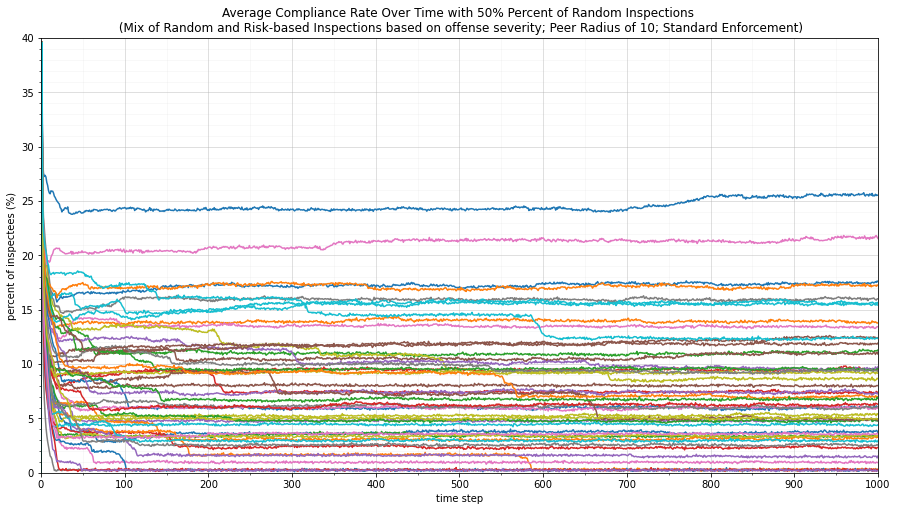

<Figure size 432x288 with 0 Axes>

In [67]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_50_1['step'],mixoffense_standard_sharerandinsp_50_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_2['step'],mixoffense_standard_sharerandinsp_50_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_3['step'],mixoffense_standard_sharerandinsp_50_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_4['step'],mixoffense_standard_sharerandinsp_50_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_5['step'],mixoffense_standard_sharerandinsp_50_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_6['step'],mixoffense_standard_sharerandinsp_50_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_7['step'],mixoffense_standard_sharerandinsp_50_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_8['step'],mixoffense_standard_sharerandinsp_50_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_9['step'],mixoffense_standard_sharerandinsp_50_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_10['step'],mixoffense_standard_sharerandinsp_50_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_11['step'],mixoffense_standard_sharerandinsp_50_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_12['step'],mixoffense_standard_sharerandinsp_50_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_13['step'],mixoffense_standard_sharerandinsp_50_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_14['step'],mixoffense_standard_sharerandinsp_50_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_15['step'],mixoffense_standard_sharerandinsp_50_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_16['step'],mixoffense_standard_sharerandinsp_50_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_17['step'],mixoffense_standard_sharerandinsp_50_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_18['step'],mixoffense_standard_sharerandinsp_50_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_19['step'],mixoffense_standard_sharerandinsp_50_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_20['step'],mixoffense_standard_sharerandinsp_50_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_21['step'],mixoffense_standard_sharerandinsp_50_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_22['step'],mixoffense_standard_sharerandinsp_50_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_23['step'],mixoffense_standard_sharerandinsp_50_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_24['step'],mixoffense_standard_sharerandinsp_50_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_25['step'],mixoffense_standard_sharerandinsp_50_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_26['step'],mixoffense_standard_sharerandinsp_50_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_27['step'],mixoffense_standard_sharerandinsp_50_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_28['step'],mixoffense_standard_sharerandinsp_50_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_29['step'],mixoffense_standard_sharerandinsp_50_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_30['step'],mixoffense_standard_sharerandinsp_50_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_31['step'],mixoffense_standard_sharerandinsp_50_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_32['step'],mixoffense_standard_sharerandinsp_50_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_33['step'],mixoffense_standard_sharerandinsp_50_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_34['step'],mixoffense_standard_sharerandinsp_50_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_35['step'],mixoffense_standard_sharerandinsp_50_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_36['step'],mixoffense_standard_sharerandinsp_50_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_37['step'],mixoffense_standard_sharerandinsp_50_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_38['step'],mixoffense_standard_sharerandinsp_50_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_39['step'],mixoffense_standard_sharerandinsp_50_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_40['step'],mixoffense_standard_sharerandinsp_50_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_41['step'],mixoffense_standard_sharerandinsp_50_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_42['step'],mixoffense_standard_sharerandinsp_50_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_43['step'],mixoffense_standard_sharerandinsp_50_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_44['step'],mixoffense_standard_sharerandinsp_50_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_45['step'],mixoffense_standard_sharerandinsp_50_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_46['step'],mixoffense_standard_sharerandinsp_50_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_47['step'],mixoffense_standard_sharerandinsp_50_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_48['step'],mixoffense_standard_sharerandinsp_50_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_49['step'],mixoffense_standard_sharerandinsp_50_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_50_50['step'],mixoffense_standard_sharerandinsp_50_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 50% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections50_ Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

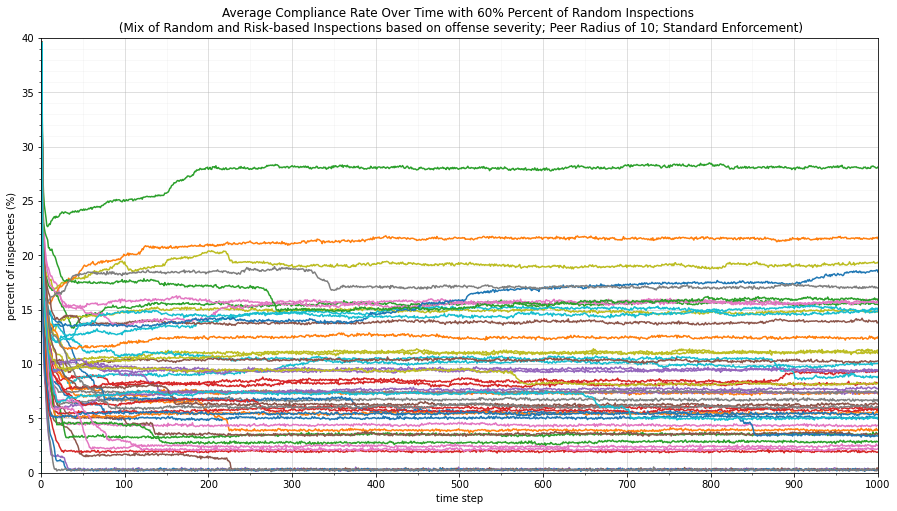

<Figure size 432x288 with 0 Axes>

In [69]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_60_1['step'],mixoffense_standard_sharerandinsp_60_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_2['step'],mixoffense_standard_sharerandinsp_60_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_3['step'],mixoffense_standard_sharerandinsp_60_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_4['step'],mixoffense_standard_sharerandinsp_60_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_5['step'],mixoffense_standard_sharerandinsp_60_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_6['step'],mixoffense_standard_sharerandinsp_60_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_7['step'],mixoffense_standard_sharerandinsp_60_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_8['step'],mixoffense_standard_sharerandinsp_60_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_9['step'],mixoffense_standard_sharerandinsp_60_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_10['step'],mixoffense_standard_sharerandinsp_60_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_11['step'],mixoffense_standard_sharerandinsp_60_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_12['step'],mixoffense_standard_sharerandinsp_60_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_13['step'],mixoffense_standard_sharerandinsp_60_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_14['step'],mixoffense_standard_sharerandinsp_60_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_15['step'],mixoffense_standard_sharerandinsp_60_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_16['step'],mixoffense_standard_sharerandinsp_60_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_17['step'],mixoffense_standard_sharerandinsp_60_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_18['step'],mixoffense_standard_sharerandinsp_60_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_19['step'],mixoffense_standard_sharerandinsp_60_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_20['step'],mixoffense_standard_sharerandinsp_60_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_21['step'],mixoffense_standard_sharerandinsp_60_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_22['step'],mixoffense_standard_sharerandinsp_60_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_23['step'],mixoffense_standard_sharerandinsp_60_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_24['step'],mixoffense_standard_sharerandinsp_60_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_25['step'],mixoffense_standard_sharerandinsp_60_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_26['step'],mixoffense_standard_sharerandinsp_60_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_27['step'],mixoffense_standard_sharerandinsp_60_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_28['step'],mixoffense_standard_sharerandinsp_60_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_29['step'],mixoffense_standard_sharerandinsp_60_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_30['step'],mixoffense_standard_sharerandinsp_60_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_31['step'],mixoffense_standard_sharerandinsp_60_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_32['step'],mixoffense_standard_sharerandinsp_60_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_33['step'],mixoffense_standard_sharerandinsp_60_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_34['step'],mixoffense_standard_sharerandinsp_60_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_35['step'],mixoffense_standard_sharerandinsp_60_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_36['step'],mixoffense_standard_sharerandinsp_60_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_37['step'],mixoffense_standard_sharerandinsp_60_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_38['step'],mixoffense_standard_sharerandinsp_60_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_39['step'],mixoffense_standard_sharerandinsp_60_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_40['step'],mixoffense_standard_sharerandinsp_60_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_41['step'],mixoffense_standard_sharerandinsp_60_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_42['step'],mixoffense_standard_sharerandinsp_60_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_43['step'],mixoffense_standard_sharerandinsp_60_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_44['step'],mixoffense_standard_sharerandinsp_60_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_45['step'],mixoffense_standard_sharerandinsp_60_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_46['step'],mixoffense_standard_sharerandinsp_60_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_47['step'],mixoffense_standard_sharerandinsp_60_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_48['step'],mixoffense_standard_sharerandinsp_60_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_49['step'],mixoffense_standard_sharerandinsp_60_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_60_50['step'],mixoffense_standard_sharerandinsp_60_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 60% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections60_ Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

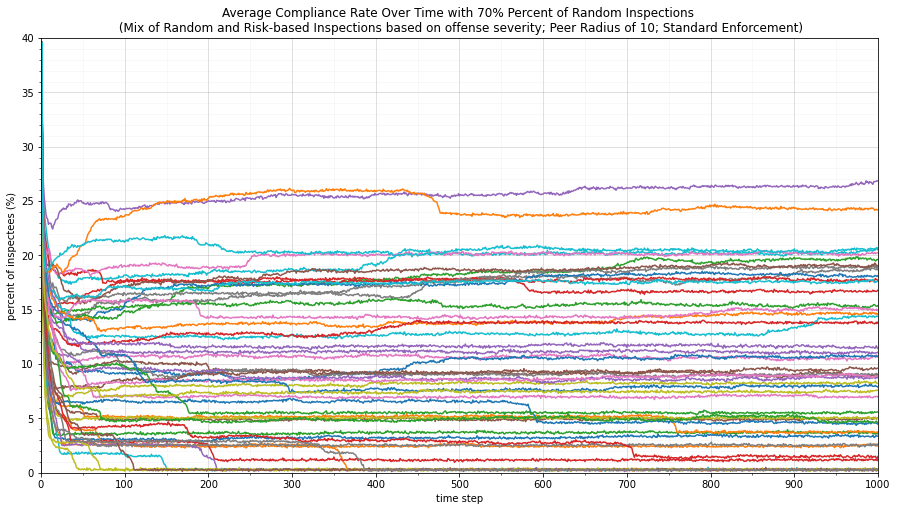

<Figure size 432x288 with 0 Axes>

In [70]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_70_1['step'],mixoffense_standard_sharerandinsp_70_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_2['step'],mixoffense_standard_sharerandinsp_70_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_3['step'],mixoffense_standard_sharerandinsp_70_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_4['step'],mixoffense_standard_sharerandinsp_70_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_5['step'],mixoffense_standard_sharerandinsp_70_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_6['step'],mixoffense_standard_sharerandinsp_70_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_7['step'],mixoffense_standard_sharerandinsp_70_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_8['step'],mixoffense_standard_sharerandinsp_70_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_9['step'],mixoffense_standard_sharerandinsp_70_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_10['step'],mixoffense_standard_sharerandinsp_70_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_11['step'],mixoffense_standard_sharerandinsp_70_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_12['step'],mixoffense_standard_sharerandinsp_70_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_13['step'],mixoffense_standard_sharerandinsp_70_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_14['step'],mixoffense_standard_sharerandinsp_70_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_15['step'],mixoffense_standard_sharerandinsp_70_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_16['step'],mixoffense_standard_sharerandinsp_70_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_17['step'],mixoffense_standard_sharerandinsp_70_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_18['step'],mixoffense_standard_sharerandinsp_70_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_19['step'],mixoffense_standard_sharerandinsp_70_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_20['step'],mixoffense_standard_sharerandinsp_70_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_21['step'],mixoffense_standard_sharerandinsp_70_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_22['step'],mixoffense_standard_sharerandinsp_70_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_23['step'],mixoffense_standard_sharerandinsp_70_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_24['step'],mixoffense_standard_sharerandinsp_70_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_25['step'],mixoffense_standard_sharerandinsp_70_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_26['step'],mixoffense_standard_sharerandinsp_70_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_27['step'],mixoffense_standard_sharerandinsp_70_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_28['step'],mixoffense_standard_sharerandinsp_70_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_29['step'],mixoffense_standard_sharerandinsp_70_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_30['step'],mixoffense_standard_sharerandinsp_70_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_31['step'],mixoffense_standard_sharerandinsp_70_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_32['step'],mixoffense_standard_sharerandinsp_70_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_33['step'],mixoffense_standard_sharerandinsp_70_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_34['step'],mixoffense_standard_sharerandinsp_70_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_35['step'],mixoffense_standard_sharerandinsp_70_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_36['step'],mixoffense_standard_sharerandinsp_70_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_37['step'],mixoffense_standard_sharerandinsp_70_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_38['step'],mixoffense_standard_sharerandinsp_70_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_39['step'],mixoffense_standard_sharerandinsp_70_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_40['step'],mixoffense_standard_sharerandinsp_70_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_41['step'],mixoffense_standard_sharerandinsp_70_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_42['step'],mixoffense_standard_sharerandinsp_70_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_43['step'],mixoffense_standard_sharerandinsp_70_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_44['step'],mixoffense_standard_sharerandinsp_70_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_45['step'],mixoffense_standard_sharerandinsp_70_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_46['step'],mixoffense_standard_sharerandinsp_70_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_47['step'],mixoffense_standard_sharerandinsp_70_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_48['step'],mixoffense_standard_sharerandinsp_70_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_49['step'],mixoffense_standard_sharerandinsp_70_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_70_50['step'],mixoffense_standard_sharerandinsp_70_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 70% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections70_ Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

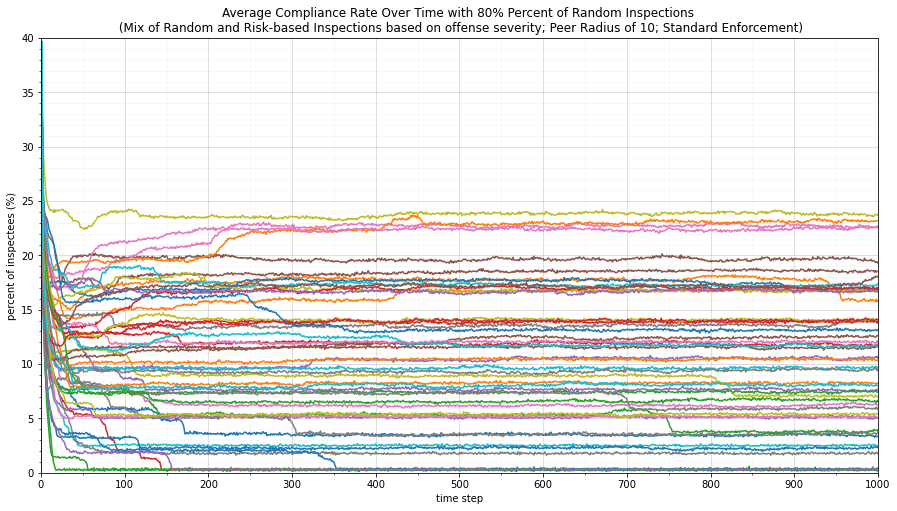

<Figure size 432x288 with 0 Axes>

In [71]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_80_1['step'],mixoffense_standard_sharerandinsp_80_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_2['step'],mixoffense_standard_sharerandinsp_80_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_3['step'],mixoffense_standard_sharerandinsp_80_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_4['step'],mixoffense_standard_sharerandinsp_80_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_5['step'],mixoffense_standard_sharerandinsp_80_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_6['step'],mixoffense_standard_sharerandinsp_80_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_7['step'],mixoffense_standard_sharerandinsp_80_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_8['step'],mixoffense_standard_sharerandinsp_80_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_9['step'],mixoffense_standard_sharerandinsp_80_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_10['step'],mixoffense_standard_sharerandinsp_80_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_11['step'],mixoffense_standard_sharerandinsp_80_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_12['step'],mixoffense_standard_sharerandinsp_80_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_13['step'],mixoffense_standard_sharerandinsp_80_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_14['step'],mixoffense_standard_sharerandinsp_80_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_15['step'],mixoffense_standard_sharerandinsp_80_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_16['step'],mixoffense_standard_sharerandinsp_80_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_17['step'],mixoffense_standard_sharerandinsp_80_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_18['step'],mixoffense_standard_sharerandinsp_80_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_19['step'],mixoffense_standard_sharerandinsp_80_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_20['step'],mixoffense_standard_sharerandinsp_80_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_21['step'],mixoffense_standard_sharerandinsp_80_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_22['step'],mixoffense_standard_sharerandinsp_80_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_23['step'],mixoffense_standard_sharerandinsp_80_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_24['step'],mixoffense_standard_sharerandinsp_80_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_25['step'],mixoffense_standard_sharerandinsp_80_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_26['step'],mixoffense_standard_sharerandinsp_80_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_27['step'],mixoffense_standard_sharerandinsp_80_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_28['step'],mixoffense_standard_sharerandinsp_80_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_29['step'],mixoffense_standard_sharerandinsp_80_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_30['step'],mixoffense_standard_sharerandinsp_80_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_31['step'],mixoffense_standard_sharerandinsp_80_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_32['step'],mixoffense_standard_sharerandinsp_80_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_33['step'],mixoffense_standard_sharerandinsp_80_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_34['step'],mixoffense_standard_sharerandinsp_80_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_35['step'],mixoffense_standard_sharerandinsp_80_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_36['step'],mixoffense_standard_sharerandinsp_80_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_37['step'],mixoffense_standard_sharerandinsp_80_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_38['step'],mixoffense_standard_sharerandinsp_80_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_39['step'],mixoffense_standard_sharerandinsp_80_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_40['step'],mixoffense_standard_sharerandinsp_80_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_41['step'],mixoffense_standard_sharerandinsp_80_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_42['step'],mixoffense_standard_sharerandinsp_80_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_43['step'],mixoffense_standard_sharerandinsp_80_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_44['step'],mixoffense_standard_sharerandinsp_80_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_45['step'],mixoffense_standard_sharerandinsp_80_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_46['step'],mixoffense_standard_sharerandinsp_80_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_47['step'],mixoffense_standard_sharerandinsp_80_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_48['step'],mixoffense_standard_sharerandinsp_80_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_49['step'],mixoffense_standard_sharerandinsp_80_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_80_50['step'],mixoffense_standard_sharerandinsp_80_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 80% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections80_ Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

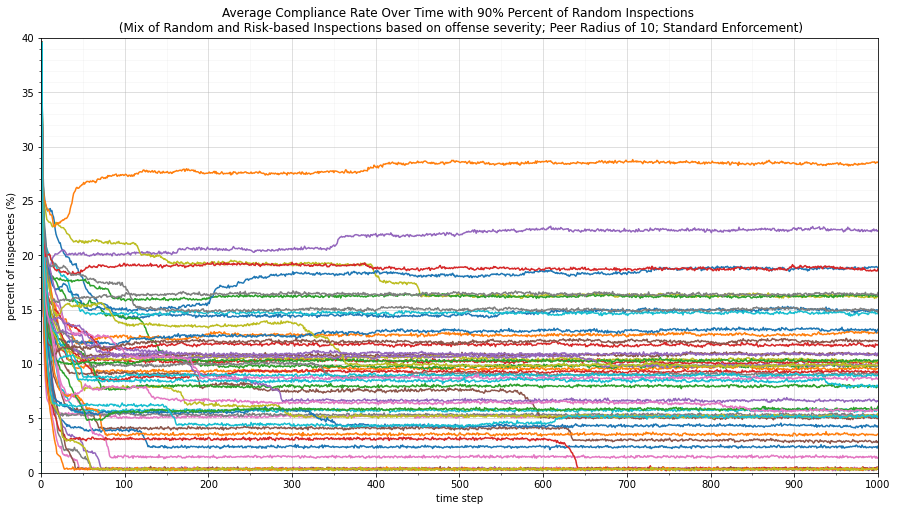

<Figure size 432x288 with 0 Axes>

In [72]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,5))
ax.set_yticks(np.arange(0,40.1,1), minor=True)

plt.plot(mixoffense_standard_sharerandinsp_90_1['step'],mixoffense_standard_sharerandinsp_90_1['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_2['step'],mixoffense_standard_sharerandinsp_90_2['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_3['step'],mixoffense_standard_sharerandinsp_90_3['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_4['step'],mixoffense_standard_sharerandinsp_90_4['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_5['step'],mixoffense_standard_sharerandinsp_90_5['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_6['step'],mixoffense_standard_sharerandinsp_90_6['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_7['step'],mixoffense_standard_sharerandinsp_90_7['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_8['step'],mixoffense_standard_sharerandinsp_90_8['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_9['step'],mixoffense_standard_sharerandinsp_90_9['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_10['step'],mixoffense_standard_sharerandinsp_90_10['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_11['step'],mixoffense_standard_sharerandinsp_90_11['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_12['step'],mixoffense_standard_sharerandinsp_90_12['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_13['step'],mixoffense_standard_sharerandinsp_90_13['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_14['step'],mixoffense_standard_sharerandinsp_90_14['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_15['step'],mixoffense_standard_sharerandinsp_90_15['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_16['step'],mixoffense_standard_sharerandinsp_90_16['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_17['step'],mixoffense_standard_sharerandinsp_90_17['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_18['step'],mixoffense_standard_sharerandinsp_90_18['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_19['step'],mixoffense_standard_sharerandinsp_90_19['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_20['step'],mixoffense_standard_sharerandinsp_90_20['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_21['step'],mixoffense_standard_sharerandinsp_90_21['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_22['step'],mixoffense_standard_sharerandinsp_90_22['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_23['step'],mixoffense_standard_sharerandinsp_90_23['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_24['step'],mixoffense_standard_sharerandinsp_90_24['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_25['step'],mixoffense_standard_sharerandinsp_90_25['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_26['step'],mixoffense_standard_sharerandinsp_90_26['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_27['step'],mixoffense_standard_sharerandinsp_90_27['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_28['step'],mixoffense_standard_sharerandinsp_90_28['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_29['step'],mixoffense_standard_sharerandinsp_90_29['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_30['step'],mixoffense_standard_sharerandinsp_90_30['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_31['step'],mixoffense_standard_sharerandinsp_90_31['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_32['step'],mixoffense_standard_sharerandinsp_90_32['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_33['step'],mixoffense_standard_sharerandinsp_90_33['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_34['step'],mixoffense_standard_sharerandinsp_90_34['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_35['step'],mixoffense_standard_sharerandinsp_90_35['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_36['step'],mixoffense_standard_sharerandinsp_90_36['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_37['step'],mixoffense_standard_sharerandinsp_90_37['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_38['step'],mixoffense_standard_sharerandinsp_90_38['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_39['step'],mixoffense_standard_sharerandinsp_90_39['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_40['step'],mixoffense_standard_sharerandinsp_90_40['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_41['step'],mixoffense_standard_sharerandinsp_90_41['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_42['step'],mixoffense_standard_sharerandinsp_90_42['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_43['step'],mixoffense_standard_sharerandinsp_90_43['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_44['step'],mixoffense_standard_sharerandinsp_90_44['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_45['step'],mixoffense_standard_sharerandinsp_90_45['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_46['step'],mixoffense_standard_sharerandinsp_90_46['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_47['step'],mixoffense_standard_sharerandinsp_90_47['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_48['step'],mixoffense_standard_sharerandinsp_90_48['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_49['step'],mixoffense_standard_sharerandinsp_90_49['perc-compliant'])
plt.plot(mixoffense_standard_sharerandinsp_90_50['step'],mixoffense_standard_sharerandinsp_90_50['perc-compliant'])


plt.title("Average Compliance Rate Over Time with 90% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections90_ Time vs Compliant All Runs (Mix offense-severity, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

### Responsive enforcement

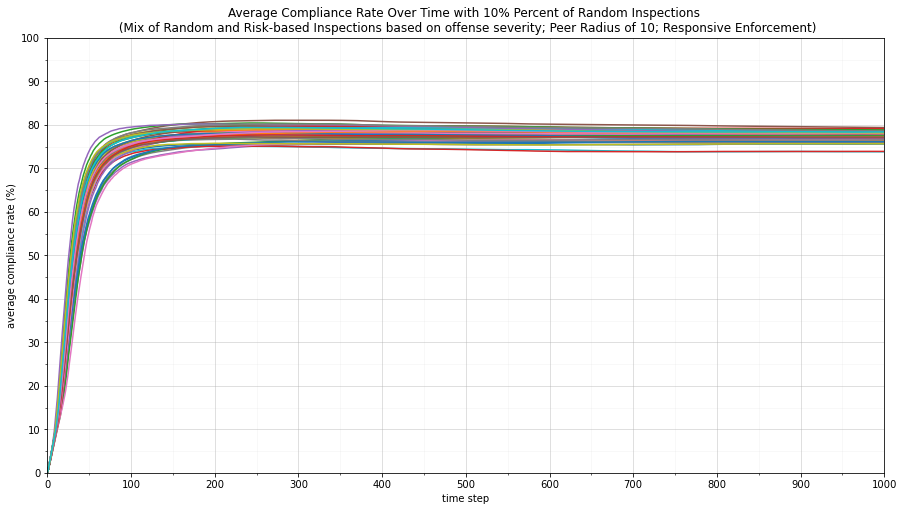

<Figure size 432x288 with 0 Axes>

In [77]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_10_1['step'],mixoffense_resp_sharerandinsp_10_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_2['step'],mixoffense_resp_sharerandinsp_10_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_3['step'],mixoffense_resp_sharerandinsp_10_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_4['step'],mixoffense_resp_sharerandinsp_10_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_5['step'],mixoffense_resp_sharerandinsp_10_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_6['step'],mixoffense_resp_sharerandinsp_10_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_7['step'],mixoffense_resp_sharerandinsp_10_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_8['step'],mixoffense_resp_sharerandinsp_10_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_9['step'],mixoffense_resp_sharerandinsp_10_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_10['step'],mixoffense_resp_sharerandinsp_10_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_11['step'],mixoffense_resp_sharerandinsp_10_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_12['step'],mixoffense_resp_sharerandinsp_10_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_13['step'],mixoffense_resp_sharerandinsp_10_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_14['step'],mixoffense_resp_sharerandinsp_10_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_15['step'],mixoffense_resp_sharerandinsp_10_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_16['step'],mixoffense_resp_sharerandinsp_10_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_17['step'],mixoffense_resp_sharerandinsp_10_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_18['step'],mixoffense_resp_sharerandinsp_10_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_19['step'],mixoffense_resp_sharerandinsp_10_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_20['step'],mixoffense_resp_sharerandinsp_10_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_21['step'],mixoffense_resp_sharerandinsp_10_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_22['step'],mixoffense_resp_sharerandinsp_10_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_23['step'],mixoffense_resp_sharerandinsp_10_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_24['step'],mixoffense_resp_sharerandinsp_10_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_25['step'],mixoffense_resp_sharerandinsp_10_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_26['step'],mixoffense_resp_sharerandinsp_10_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_27['step'],mixoffense_resp_sharerandinsp_10_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_28['step'],mixoffense_resp_sharerandinsp_10_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_29['step'],mixoffense_resp_sharerandinsp_10_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_30['step'],mixoffense_resp_sharerandinsp_10_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_31['step'],mixoffense_resp_sharerandinsp_10_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_32['step'],mixoffense_resp_sharerandinsp_10_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_33['step'],mixoffense_resp_sharerandinsp_10_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_34['step'],mixoffense_resp_sharerandinsp_10_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_35['step'],mixoffense_resp_sharerandinsp_10_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_36['step'],mixoffense_resp_sharerandinsp_10_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_37['step'],mixoffense_resp_sharerandinsp_10_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_38['step'],mixoffense_resp_sharerandinsp_10_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_39['step'],mixoffense_resp_sharerandinsp_10_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_40['step'],mixoffense_resp_sharerandinsp_10_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_41['step'],mixoffense_resp_sharerandinsp_10_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_42['step'],mixoffense_resp_sharerandinsp_10_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_43['step'],mixoffense_resp_sharerandinsp_10_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_44['step'],mixoffense_resp_sharerandinsp_10_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_45['step'],mixoffense_resp_sharerandinsp_10_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_46['step'],mixoffense_resp_sharerandinsp_10_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_47['step'],mixoffense_resp_sharerandinsp_10_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_48['step'],mixoffense_resp_sharerandinsp_10_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_49['step'],mixoffense_resp_sharerandinsp_10_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_10_50['step'],mixoffense_resp_sharerandinsp_10_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 10% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections10- Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

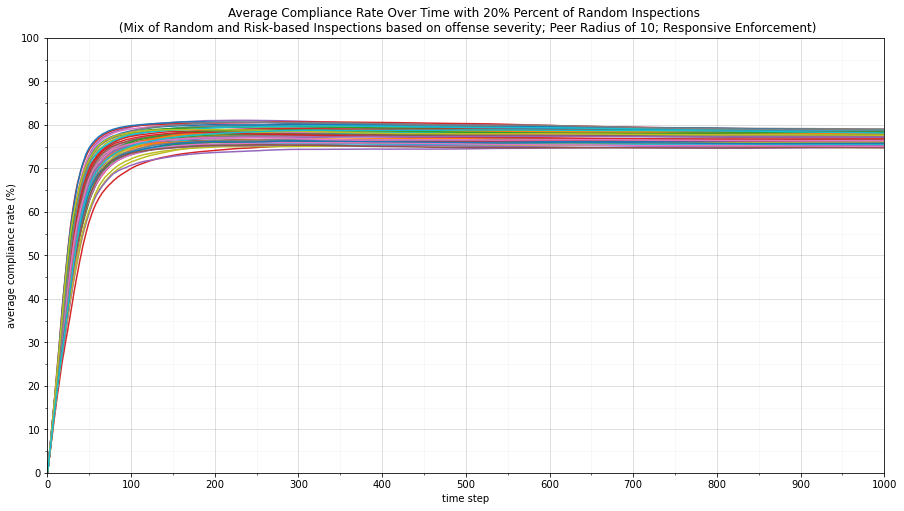

<Figure size 432x288 with 0 Axes>

In [76]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_20_1['step'],mixoffense_resp_sharerandinsp_20_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_2['step'],mixoffense_resp_sharerandinsp_20_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_3['step'],mixoffense_resp_sharerandinsp_20_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_4['step'],mixoffense_resp_sharerandinsp_20_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_5['step'],mixoffense_resp_sharerandinsp_20_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_6['step'],mixoffense_resp_sharerandinsp_20_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_7['step'],mixoffense_resp_sharerandinsp_20_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_8['step'],mixoffense_resp_sharerandinsp_20_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_9['step'],mixoffense_resp_sharerandinsp_20_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_10['step'],mixoffense_resp_sharerandinsp_20_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_11['step'],mixoffense_resp_sharerandinsp_20_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_12['step'],mixoffense_resp_sharerandinsp_20_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_13['step'],mixoffense_resp_sharerandinsp_20_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_14['step'],mixoffense_resp_sharerandinsp_20_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_15['step'],mixoffense_resp_sharerandinsp_20_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_16['step'],mixoffense_resp_sharerandinsp_20_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_17['step'],mixoffense_resp_sharerandinsp_20_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_18['step'],mixoffense_resp_sharerandinsp_20_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_19['step'],mixoffense_resp_sharerandinsp_20_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_20['step'],mixoffense_resp_sharerandinsp_20_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_21['step'],mixoffense_resp_sharerandinsp_20_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_22['step'],mixoffense_resp_sharerandinsp_20_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_23['step'],mixoffense_resp_sharerandinsp_20_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_24['step'],mixoffense_resp_sharerandinsp_20_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_25['step'],mixoffense_resp_sharerandinsp_20_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_26['step'],mixoffense_resp_sharerandinsp_20_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_27['step'],mixoffense_resp_sharerandinsp_20_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_28['step'],mixoffense_resp_sharerandinsp_20_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_29['step'],mixoffense_resp_sharerandinsp_20_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_30['step'],mixoffense_resp_sharerandinsp_20_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_31['step'],mixoffense_resp_sharerandinsp_20_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_32['step'],mixoffense_resp_sharerandinsp_20_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_33['step'],mixoffense_resp_sharerandinsp_20_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_34['step'],mixoffense_resp_sharerandinsp_20_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_35['step'],mixoffense_resp_sharerandinsp_20_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_36['step'],mixoffense_resp_sharerandinsp_20_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_37['step'],mixoffense_resp_sharerandinsp_20_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_38['step'],mixoffense_resp_sharerandinsp_20_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_39['step'],mixoffense_resp_sharerandinsp_20_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_40['step'],mixoffense_resp_sharerandinsp_20_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_41['step'],mixoffense_resp_sharerandinsp_20_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_42['step'],mixoffense_resp_sharerandinsp_20_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_43['step'],mixoffense_resp_sharerandinsp_20_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_44['step'],mixoffense_resp_sharerandinsp_20_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_45['step'],mixoffense_resp_sharerandinsp_20_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_46['step'],mixoffense_resp_sharerandinsp_20_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_47['step'],mixoffense_resp_sharerandinsp_20_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_48['step'],mixoffense_resp_sharerandinsp_20_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_49['step'],mixoffense_resp_sharerandinsp_20_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_20_50['step'],mixoffense_resp_sharerandinsp_20_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 20% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections20_ Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

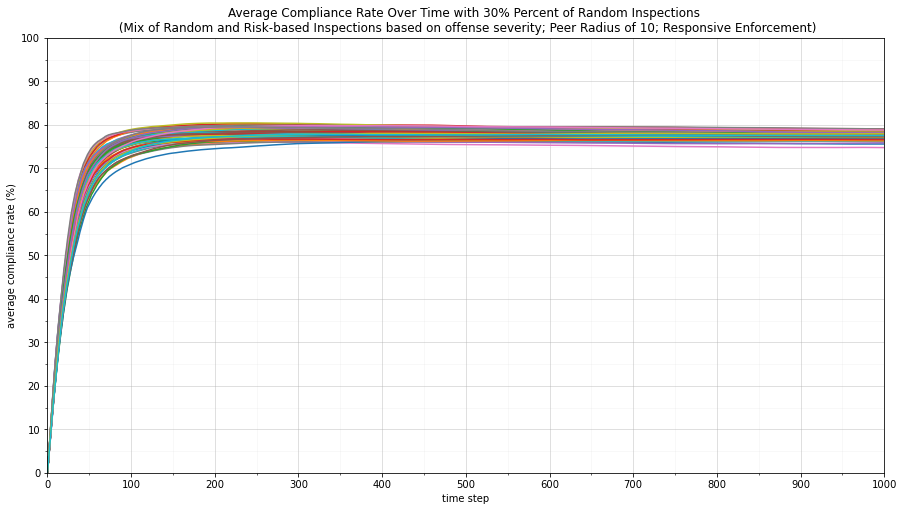

<Figure size 432x288 with 0 Axes>

In [78]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_30_1['step'],mixoffense_resp_sharerandinsp_30_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_2['step'],mixoffense_resp_sharerandinsp_30_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_3['step'],mixoffense_resp_sharerandinsp_30_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_4['step'],mixoffense_resp_sharerandinsp_30_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_5['step'],mixoffense_resp_sharerandinsp_30_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_6['step'],mixoffense_resp_sharerandinsp_30_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_7['step'],mixoffense_resp_sharerandinsp_30_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_8['step'],mixoffense_resp_sharerandinsp_30_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_9['step'],mixoffense_resp_sharerandinsp_30_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_10['step'],mixoffense_resp_sharerandinsp_30_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_11['step'],mixoffense_resp_sharerandinsp_30_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_12['step'],mixoffense_resp_sharerandinsp_30_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_13['step'],mixoffense_resp_sharerandinsp_30_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_14['step'],mixoffense_resp_sharerandinsp_30_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_15['step'],mixoffense_resp_sharerandinsp_30_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_16['step'],mixoffense_resp_sharerandinsp_30_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_17['step'],mixoffense_resp_sharerandinsp_30_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_18['step'],mixoffense_resp_sharerandinsp_30_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_19['step'],mixoffense_resp_sharerandinsp_30_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_20['step'],mixoffense_resp_sharerandinsp_30_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_21['step'],mixoffense_resp_sharerandinsp_30_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_22['step'],mixoffense_resp_sharerandinsp_30_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_23['step'],mixoffense_resp_sharerandinsp_30_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_24['step'],mixoffense_resp_sharerandinsp_30_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_25['step'],mixoffense_resp_sharerandinsp_30_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_26['step'],mixoffense_resp_sharerandinsp_30_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_27['step'],mixoffense_resp_sharerandinsp_30_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_28['step'],mixoffense_resp_sharerandinsp_30_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_29['step'],mixoffense_resp_sharerandinsp_30_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_30['step'],mixoffense_resp_sharerandinsp_30_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_31['step'],mixoffense_resp_sharerandinsp_30_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_32['step'],mixoffense_resp_sharerandinsp_30_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_33['step'],mixoffense_resp_sharerandinsp_30_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_34['step'],mixoffense_resp_sharerandinsp_30_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_35['step'],mixoffense_resp_sharerandinsp_30_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_36['step'],mixoffense_resp_sharerandinsp_30_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_37['step'],mixoffense_resp_sharerandinsp_30_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_38['step'],mixoffense_resp_sharerandinsp_30_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_39['step'],mixoffense_resp_sharerandinsp_30_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_40['step'],mixoffense_resp_sharerandinsp_30_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_41['step'],mixoffense_resp_sharerandinsp_30_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_42['step'],mixoffense_resp_sharerandinsp_30_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_43['step'],mixoffense_resp_sharerandinsp_30_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_44['step'],mixoffense_resp_sharerandinsp_30_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_45['step'],mixoffense_resp_sharerandinsp_30_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_46['step'],mixoffense_resp_sharerandinsp_30_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_47['step'],mixoffense_resp_sharerandinsp_30_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_48['step'],mixoffense_resp_sharerandinsp_30_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_49['step'],mixoffense_resp_sharerandinsp_30_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_30_50['step'],mixoffense_resp_sharerandinsp_30_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 30% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections30_ Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

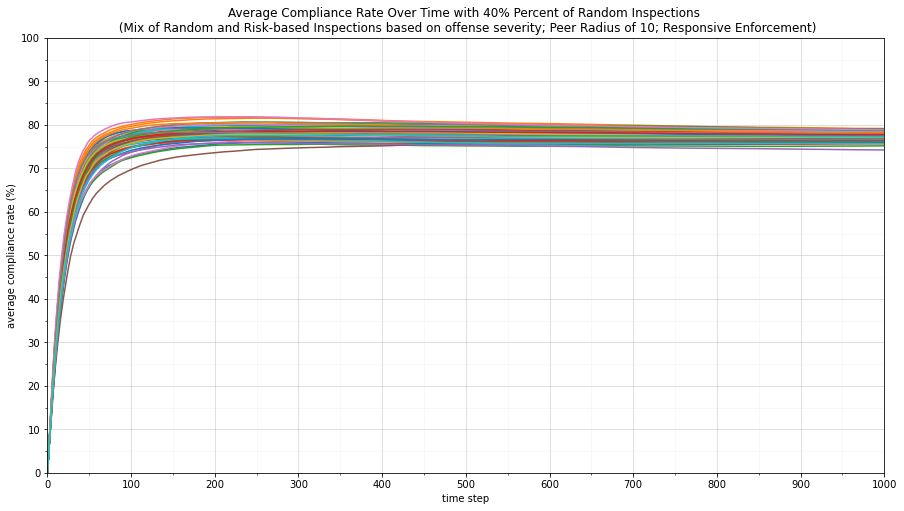

<Figure size 432x288 with 0 Axes>

In [79]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_40_1['step'],mixoffense_resp_sharerandinsp_40_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_2['step'],mixoffense_resp_sharerandinsp_40_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_3['step'],mixoffense_resp_sharerandinsp_40_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_4['step'],mixoffense_resp_sharerandinsp_40_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_5['step'],mixoffense_resp_sharerandinsp_40_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_6['step'],mixoffense_resp_sharerandinsp_40_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_7['step'],mixoffense_resp_sharerandinsp_40_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_8['step'],mixoffense_resp_sharerandinsp_40_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_9['step'],mixoffense_resp_sharerandinsp_40_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_10['step'],mixoffense_resp_sharerandinsp_40_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_11['step'],mixoffense_resp_sharerandinsp_40_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_12['step'],mixoffense_resp_sharerandinsp_40_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_13['step'],mixoffense_resp_sharerandinsp_40_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_14['step'],mixoffense_resp_sharerandinsp_40_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_15['step'],mixoffense_resp_sharerandinsp_40_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_16['step'],mixoffense_resp_sharerandinsp_40_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_17['step'],mixoffense_resp_sharerandinsp_40_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_18['step'],mixoffense_resp_sharerandinsp_40_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_19['step'],mixoffense_resp_sharerandinsp_40_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_20['step'],mixoffense_resp_sharerandinsp_40_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_21['step'],mixoffense_resp_sharerandinsp_40_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_22['step'],mixoffense_resp_sharerandinsp_40_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_23['step'],mixoffense_resp_sharerandinsp_40_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_24['step'],mixoffense_resp_sharerandinsp_40_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_25['step'],mixoffense_resp_sharerandinsp_40_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_26['step'],mixoffense_resp_sharerandinsp_40_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_27['step'],mixoffense_resp_sharerandinsp_40_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_28['step'],mixoffense_resp_sharerandinsp_40_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_29['step'],mixoffense_resp_sharerandinsp_40_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_30['step'],mixoffense_resp_sharerandinsp_40_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_31['step'],mixoffense_resp_sharerandinsp_40_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_32['step'],mixoffense_resp_sharerandinsp_40_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_33['step'],mixoffense_resp_sharerandinsp_40_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_34['step'],mixoffense_resp_sharerandinsp_40_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_35['step'],mixoffense_resp_sharerandinsp_40_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_36['step'],mixoffense_resp_sharerandinsp_40_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_37['step'],mixoffense_resp_sharerandinsp_40_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_38['step'],mixoffense_resp_sharerandinsp_40_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_39['step'],mixoffense_resp_sharerandinsp_40_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_40['step'],mixoffense_resp_sharerandinsp_40_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_41['step'],mixoffense_resp_sharerandinsp_40_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_42['step'],mixoffense_resp_sharerandinsp_40_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_43['step'],mixoffense_resp_sharerandinsp_40_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_44['step'],mixoffense_resp_sharerandinsp_40_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_45['step'],mixoffense_resp_sharerandinsp_40_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_46['step'],mixoffense_resp_sharerandinsp_40_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_47['step'],mixoffense_resp_sharerandinsp_40_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_48['step'],mixoffense_resp_sharerandinsp_40_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_49['step'],mixoffense_resp_sharerandinsp_40_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_40_50['step'],mixoffense_resp_sharerandinsp_40_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 40% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections40_ Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

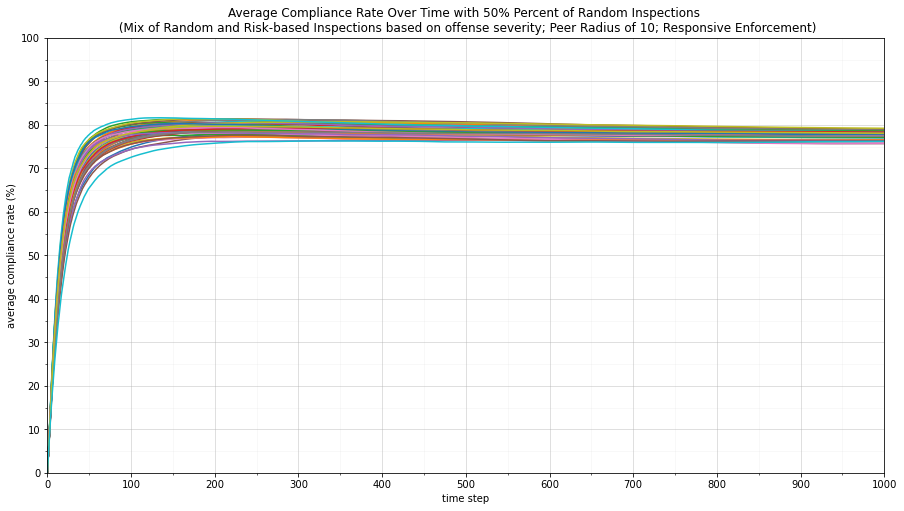

<Figure size 432x288 with 0 Axes>

In [80]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_50_1['step'],mixoffense_resp_sharerandinsp_50_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_2['step'],mixoffense_resp_sharerandinsp_50_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_3['step'],mixoffense_resp_sharerandinsp_50_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_4['step'],mixoffense_resp_sharerandinsp_50_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_5['step'],mixoffense_resp_sharerandinsp_50_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_6['step'],mixoffense_resp_sharerandinsp_50_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_7['step'],mixoffense_resp_sharerandinsp_50_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_8['step'],mixoffense_resp_sharerandinsp_50_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_9['step'],mixoffense_resp_sharerandinsp_50_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_10['step'],mixoffense_resp_sharerandinsp_50_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_11['step'],mixoffense_resp_sharerandinsp_50_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_12['step'],mixoffense_resp_sharerandinsp_50_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_13['step'],mixoffense_resp_sharerandinsp_50_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_14['step'],mixoffense_resp_sharerandinsp_50_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_15['step'],mixoffense_resp_sharerandinsp_50_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_16['step'],mixoffense_resp_sharerandinsp_50_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_17['step'],mixoffense_resp_sharerandinsp_50_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_18['step'],mixoffense_resp_sharerandinsp_50_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_19['step'],mixoffense_resp_sharerandinsp_50_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_20['step'],mixoffense_resp_sharerandinsp_50_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_21['step'],mixoffense_resp_sharerandinsp_50_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_22['step'],mixoffense_resp_sharerandinsp_50_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_23['step'],mixoffense_resp_sharerandinsp_50_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_24['step'],mixoffense_resp_sharerandinsp_50_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_25['step'],mixoffense_resp_sharerandinsp_50_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_26['step'],mixoffense_resp_sharerandinsp_50_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_27['step'],mixoffense_resp_sharerandinsp_50_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_28['step'],mixoffense_resp_sharerandinsp_50_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_29['step'],mixoffense_resp_sharerandinsp_50_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_30['step'],mixoffense_resp_sharerandinsp_50_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_31['step'],mixoffense_resp_sharerandinsp_50_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_32['step'],mixoffense_resp_sharerandinsp_50_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_33['step'],mixoffense_resp_sharerandinsp_50_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_34['step'],mixoffense_resp_sharerandinsp_50_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_35['step'],mixoffense_resp_sharerandinsp_50_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_36['step'],mixoffense_resp_sharerandinsp_50_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_37['step'],mixoffense_resp_sharerandinsp_50_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_38['step'],mixoffense_resp_sharerandinsp_50_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_39['step'],mixoffense_resp_sharerandinsp_50_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_40['step'],mixoffense_resp_sharerandinsp_50_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_41['step'],mixoffense_resp_sharerandinsp_50_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_42['step'],mixoffense_resp_sharerandinsp_50_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_43['step'],mixoffense_resp_sharerandinsp_50_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_44['step'],mixoffense_resp_sharerandinsp_50_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_45['step'],mixoffense_resp_sharerandinsp_50_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_46['step'],mixoffense_resp_sharerandinsp_50_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_47['step'],mixoffense_resp_sharerandinsp_50_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_48['step'],mixoffense_resp_sharerandinsp_50_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_49['step'],mixoffense_resp_sharerandinsp_50_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_50_50['step'],mixoffense_resp_sharerandinsp_50_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 50% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections50_ Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

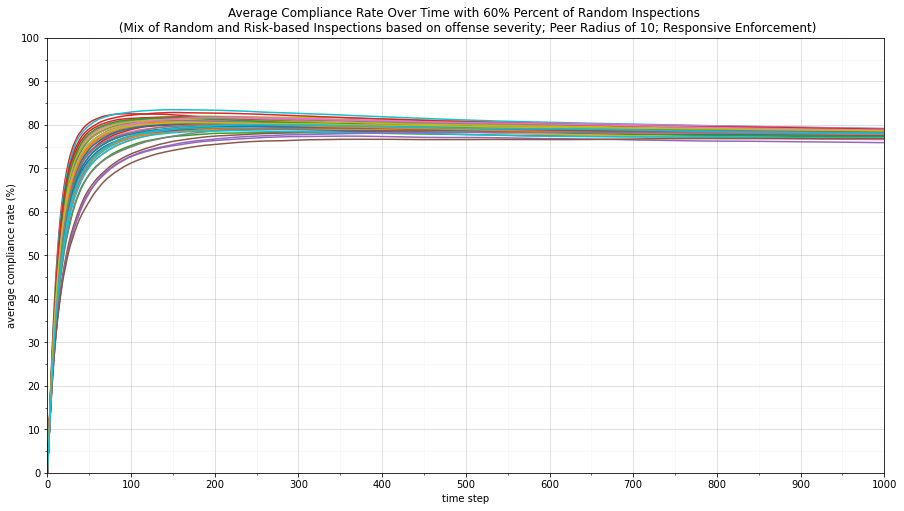

<Figure size 432x288 with 0 Axes>

In [81]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_60_1['step'],mixoffense_resp_sharerandinsp_60_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_2['step'],mixoffense_resp_sharerandinsp_60_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_3['step'],mixoffense_resp_sharerandinsp_60_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_4['step'],mixoffense_resp_sharerandinsp_60_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_5['step'],mixoffense_resp_sharerandinsp_60_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_6['step'],mixoffense_resp_sharerandinsp_60_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_7['step'],mixoffense_resp_sharerandinsp_60_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_8['step'],mixoffense_resp_sharerandinsp_60_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_9['step'],mixoffense_resp_sharerandinsp_60_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_10['step'],mixoffense_resp_sharerandinsp_60_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_11['step'],mixoffense_resp_sharerandinsp_60_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_12['step'],mixoffense_resp_sharerandinsp_60_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_13['step'],mixoffense_resp_sharerandinsp_60_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_14['step'],mixoffense_resp_sharerandinsp_60_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_15['step'],mixoffense_resp_sharerandinsp_60_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_16['step'],mixoffense_resp_sharerandinsp_60_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_17['step'],mixoffense_resp_sharerandinsp_60_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_18['step'],mixoffense_resp_sharerandinsp_60_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_19['step'],mixoffense_resp_sharerandinsp_60_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_20['step'],mixoffense_resp_sharerandinsp_60_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_21['step'],mixoffense_resp_sharerandinsp_60_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_22['step'],mixoffense_resp_sharerandinsp_60_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_23['step'],mixoffense_resp_sharerandinsp_60_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_24['step'],mixoffense_resp_sharerandinsp_60_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_25['step'],mixoffense_resp_sharerandinsp_60_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_26['step'],mixoffense_resp_sharerandinsp_60_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_27['step'],mixoffense_resp_sharerandinsp_60_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_28['step'],mixoffense_resp_sharerandinsp_60_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_29['step'],mixoffense_resp_sharerandinsp_60_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_30['step'],mixoffense_resp_sharerandinsp_60_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_31['step'],mixoffense_resp_sharerandinsp_60_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_32['step'],mixoffense_resp_sharerandinsp_60_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_33['step'],mixoffense_resp_sharerandinsp_60_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_34['step'],mixoffense_resp_sharerandinsp_60_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_35['step'],mixoffense_resp_sharerandinsp_60_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_36['step'],mixoffense_resp_sharerandinsp_60_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_37['step'],mixoffense_resp_sharerandinsp_60_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_38['step'],mixoffense_resp_sharerandinsp_60_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_39['step'],mixoffense_resp_sharerandinsp_60_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_40['step'],mixoffense_resp_sharerandinsp_60_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_41['step'],mixoffense_resp_sharerandinsp_60_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_42['step'],mixoffense_resp_sharerandinsp_60_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_43['step'],mixoffense_resp_sharerandinsp_60_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_44['step'],mixoffense_resp_sharerandinsp_60_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_45['step'],mixoffense_resp_sharerandinsp_60_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_46['step'],mixoffense_resp_sharerandinsp_60_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_47['step'],mixoffense_resp_sharerandinsp_60_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_48['step'],mixoffense_resp_sharerandinsp_60_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_49['step'],mixoffense_resp_sharerandinsp_60_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_60_50['step'],mixoffense_resp_sharerandinsp_60_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 60% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections60_ Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

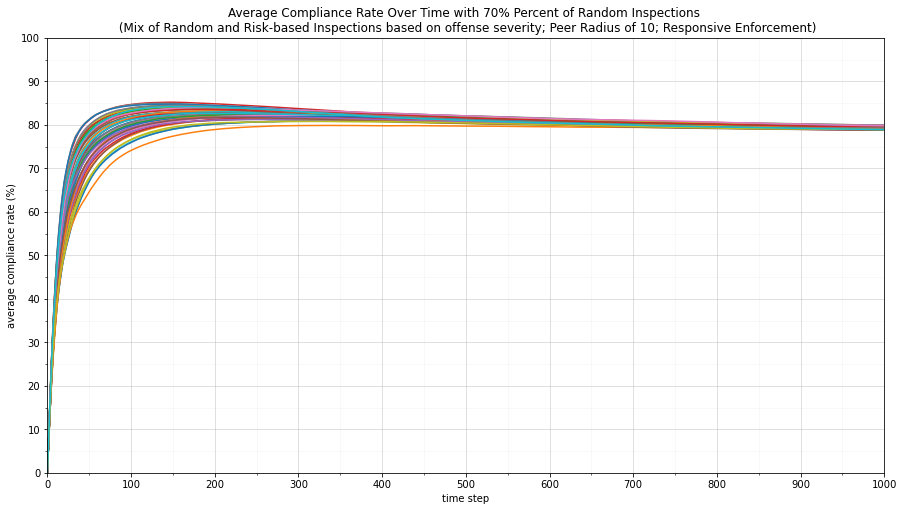

<Figure size 432x288 with 0 Axes>

In [82]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_70_1['step'],mixoffense_resp_sharerandinsp_70_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_2['step'],mixoffense_resp_sharerandinsp_70_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_3['step'],mixoffense_resp_sharerandinsp_70_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_4['step'],mixoffense_resp_sharerandinsp_70_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_5['step'],mixoffense_resp_sharerandinsp_70_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_6['step'],mixoffense_resp_sharerandinsp_70_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_7['step'],mixoffense_resp_sharerandinsp_70_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_8['step'],mixoffense_resp_sharerandinsp_70_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_9['step'],mixoffense_resp_sharerandinsp_70_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_10['step'],mixoffense_resp_sharerandinsp_70_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_11['step'],mixoffense_resp_sharerandinsp_70_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_12['step'],mixoffense_resp_sharerandinsp_70_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_13['step'],mixoffense_resp_sharerandinsp_70_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_14['step'],mixoffense_resp_sharerandinsp_70_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_15['step'],mixoffense_resp_sharerandinsp_70_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_16['step'],mixoffense_resp_sharerandinsp_70_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_17['step'],mixoffense_resp_sharerandinsp_70_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_18['step'],mixoffense_resp_sharerandinsp_70_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_19['step'],mixoffense_resp_sharerandinsp_70_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_20['step'],mixoffense_resp_sharerandinsp_70_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_21['step'],mixoffense_resp_sharerandinsp_70_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_22['step'],mixoffense_resp_sharerandinsp_70_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_23['step'],mixoffense_resp_sharerandinsp_70_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_24['step'],mixoffense_resp_sharerandinsp_70_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_25['step'],mixoffense_resp_sharerandinsp_70_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_26['step'],mixoffense_resp_sharerandinsp_70_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_27['step'],mixoffense_resp_sharerandinsp_70_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_28['step'],mixoffense_resp_sharerandinsp_70_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_29['step'],mixoffense_resp_sharerandinsp_70_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_30['step'],mixoffense_resp_sharerandinsp_70_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_31['step'],mixoffense_resp_sharerandinsp_70_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_32['step'],mixoffense_resp_sharerandinsp_70_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_33['step'],mixoffense_resp_sharerandinsp_70_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_34['step'],mixoffense_resp_sharerandinsp_70_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_35['step'],mixoffense_resp_sharerandinsp_70_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_36['step'],mixoffense_resp_sharerandinsp_70_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_37['step'],mixoffense_resp_sharerandinsp_70_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_38['step'],mixoffense_resp_sharerandinsp_70_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_39['step'],mixoffense_resp_sharerandinsp_70_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_40['step'],mixoffense_resp_sharerandinsp_70_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_41['step'],mixoffense_resp_sharerandinsp_70_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_42['step'],mixoffense_resp_sharerandinsp_70_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_43['step'],mixoffense_resp_sharerandinsp_70_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_44['step'],mixoffense_resp_sharerandinsp_70_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_45['step'],mixoffense_resp_sharerandinsp_70_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_46['step'],mixoffense_resp_sharerandinsp_70_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_47['step'],mixoffense_resp_sharerandinsp_70_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_48['step'],mixoffense_resp_sharerandinsp_70_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_49['step'],mixoffense_resp_sharerandinsp_70_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_70_50['step'],mixoffense_resp_sharerandinsp_70_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 70% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections70_ Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

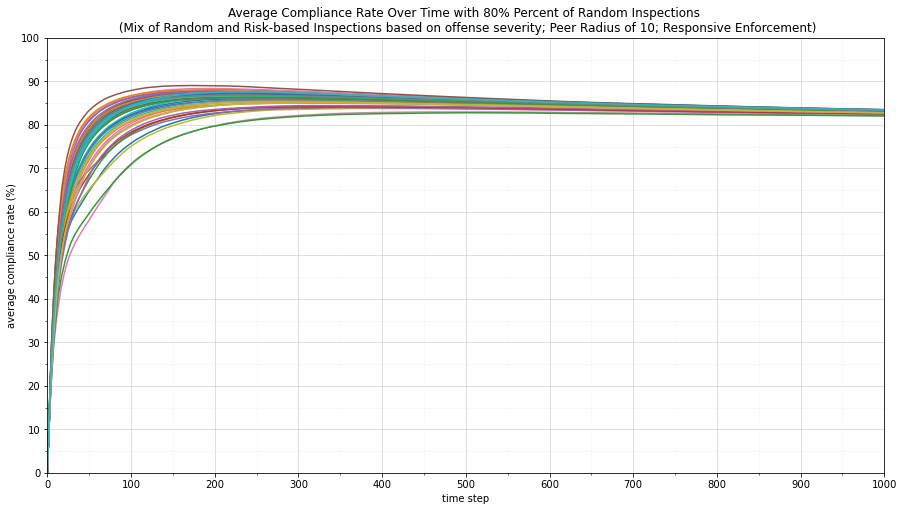

<Figure size 432x288 with 0 Axes>

In [83]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_80_1['step'],mixoffense_resp_sharerandinsp_80_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_2['step'],mixoffense_resp_sharerandinsp_80_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_3['step'],mixoffense_resp_sharerandinsp_80_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_4['step'],mixoffense_resp_sharerandinsp_80_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_5['step'],mixoffense_resp_sharerandinsp_80_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_6['step'],mixoffense_resp_sharerandinsp_80_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_7['step'],mixoffense_resp_sharerandinsp_80_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_8['step'],mixoffense_resp_sharerandinsp_80_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_9['step'],mixoffense_resp_sharerandinsp_80_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_10['step'],mixoffense_resp_sharerandinsp_80_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_11['step'],mixoffense_resp_sharerandinsp_80_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_12['step'],mixoffense_resp_sharerandinsp_80_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_13['step'],mixoffense_resp_sharerandinsp_80_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_14['step'],mixoffense_resp_sharerandinsp_80_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_15['step'],mixoffense_resp_sharerandinsp_80_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_16['step'],mixoffense_resp_sharerandinsp_80_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_17['step'],mixoffense_resp_sharerandinsp_80_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_18['step'],mixoffense_resp_sharerandinsp_80_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_19['step'],mixoffense_resp_sharerandinsp_80_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_20['step'],mixoffense_resp_sharerandinsp_80_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_21['step'],mixoffense_resp_sharerandinsp_80_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_22['step'],mixoffense_resp_sharerandinsp_80_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_23['step'],mixoffense_resp_sharerandinsp_80_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_24['step'],mixoffense_resp_sharerandinsp_80_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_25['step'],mixoffense_resp_sharerandinsp_80_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_26['step'],mixoffense_resp_sharerandinsp_80_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_27['step'],mixoffense_resp_sharerandinsp_80_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_28['step'],mixoffense_resp_sharerandinsp_80_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_29['step'],mixoffense_resp_sharerandinsp_80_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_30['step'],mixoffense_resp_sharerandinsp_80_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_31['step'],mixoffense_resp_sharerandinsp_80_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_32['step'],mixoffense_resp_sharerandinsp_80_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_33['step'],mixoffense_resp_sharerandinsp_80_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_34['step'],mixoffense_resp_sharerandinsp_80_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_35['step'],mixoffense_resp_sharerandinsp_80_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_36['step'],mixoffense_resp_sharerandinsp_80_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_37['step'],mixoffense_resp_sharerandinsp_80_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_38['step'],mixoffense_resp_sharerandinsp_80_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_39['step'],mixoffense_resp_sharerandinsp_80_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_40['step'],mixoffense_resp_sharerandinsp_80_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_41['step'],mixoffense_resp_sharerandinsp_80_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_42['step'],mixoffense_resp_sharerandinsp_80_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_43['step'],mixoffense_resp_sharerandinsp_80_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_44['step'],mixoffense_resp_sharerandinsp_80_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_45['step'],mixoffense_resp_sharerandinsp_80_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_46['step'],mixoffense_resp_sharerandinsp_80_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_47['step'],mixoffense_resp_sharerandinsp_80_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_48['step'],mixoffense_resp_sharerandinsp_80_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_49['step'],mixoffense_resp_sharerandinsp_80_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_80_50['step'],mixoffense_resp_sharerandinsp_80_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 80% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections80_ Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

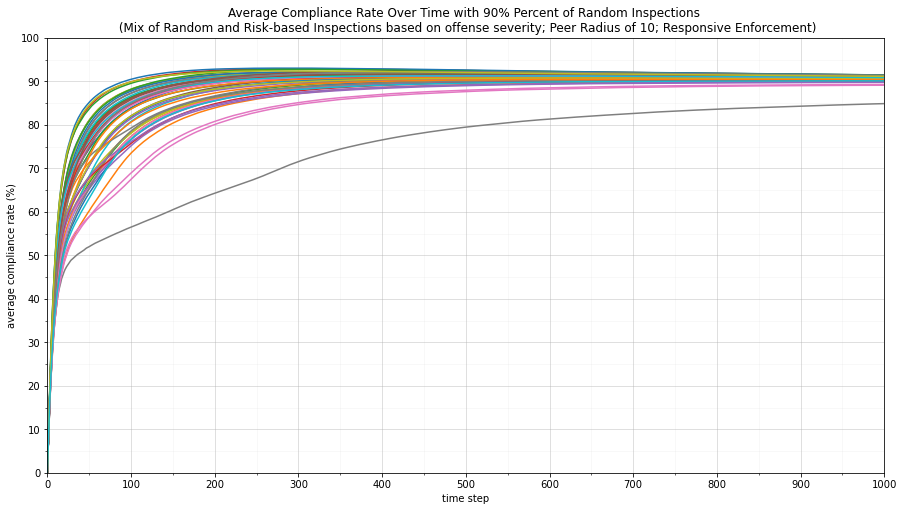

<Figure size 432x288 with 0 Axes>

In [84]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_90_1['step'],mixoffense_resp_sharerandinsp_90_1['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_2['step'],mixoffense_resp_sharerandinsp_90_2['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_3['step'],mixoffense_resp_sharerandinsp_90_3['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_4['step'],mixoffense_resp_sharerandinsp_90_4['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_5['step'],mixoffense_resp_sharerandinsp_90_5['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_6['step'],mixoffense_resp_sharerandinsp_90_6['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_7['step'],mixoffense_resp_sharerandinsp_90_7['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_8['step'],mixoffense_resp_sharerandinsp_90_8['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_9['step'],mixoffense_resp_sharerandinsp_90_9['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_10['step'],mixoffense_resp_sharerandinsp_90_10['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_11['step'],mixoffense_resp_sharerandinsp_90_11['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_12['step'],mixoffense_resp_sharerandinsp_90_12['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_13['step'],mixoffense_resp_sharerandinsp_90_13['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_14['step'],mixoffense_resp_sharerandinsp_90_14['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_15['step'],mixoffense_resp_sharerandinsp_90_15['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_16['step'],mixoffense_resp_sharerandinsp_90_16['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_17['step'],mixoffense_resp_sharerandinsp_90_17['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_18['step'],mixoffense_resp_sharerandinsp_90_18['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_19['step'],mixoffense_resp_sharerandinsp_90_19['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_20['step'],mixoffense_resp_sharerandinsp_90_20['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_21['step'],mixoffense_resp_sharerandinsp_90_21['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_22['step'],mixoffense_resp_sharerandinsp_90_22['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_23['step'],mixoffense_resp_sharerandinsp_90_23['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_24['step'],mixoffense_resp_sharerandinsp_90_24['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_25['step'],mixoffense_resp_sharerandinsp_90_25['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_26['step'],mixoffense_resp_sharerandinsp_90_26['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_27['step'],mixoffense_resp_sharerandinsp_90_27['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_28['step'],mixoffense_resp_sharerandinsp_90_28['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_29['step'],mixoffense_resp_sharerandinsp_90_29['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_30['step'],mixoffense_resp_sharerandinsp_90_30['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_31['step'],mixoffense_resp_sharerandinsp_90_31['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_32['step'],mixoffense_resp_sharerandinsp_90_32['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_33['step'],mixoffense_resp_sharerandinsp_90_33['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_34['step'],mixoffense_resp_sharerandinsp_90_34['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_35['step'],mixoffense_resp_sharerandinsp_90_35['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_36['step'],mixoffense_resp_sharerandinsp_90_36['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_37['step'],mixoffense_resp_sharerandinsp_90_37['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_38['step'],mixoffense_resp_sharerandinsp_90_38['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_39['step'],mixoffense_resp_sharerandinsp_90_39['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_40['step'],mixoffense_resp_sharerandinsp_90_40['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_41['step'],mixoffense_resp_sharerandinsp_90_41['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_42['step'],mixoffense_resp_sharerandinsp_90_42['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_43['step'],mixoffense_resp_sharerandinsp_90_43['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_44['step'],mixoffense_resp_sharerandinsp_90_44['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_45['step'],mixoffense_resp_sharerandinsp_90_45['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_46['step'],mixoffense_resp_sharerandinsp_90_46['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_47['step'],mixoffense_resp_sharerandinsp_90_47['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_48['step'],mixoffense_resp_sharerandinsp_90_48['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_49['step'],mixoffense_resp_sharerandinsp_90_49['avg-compliance-rate'])
plt.plot(mixoffense_resp_sharerandinsp_90_50['step'],mixoffense_resp_sharerandinsp_90_50['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with 90% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections90_ Time vs Avg Compliance All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

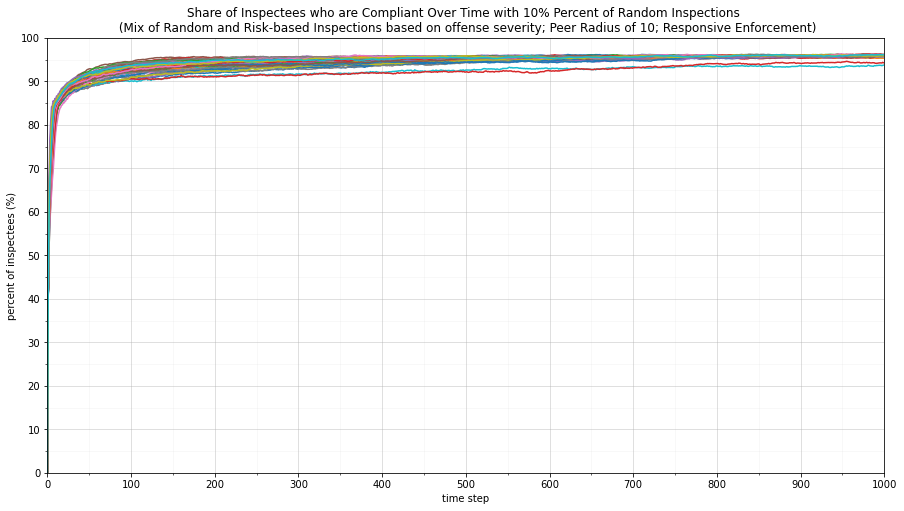

<Figure size 432x288 with 0 Axes>

In [86]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_10_1['step'],mixoffense_resp_sharerandinsp_10_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_2['step'],mixoffense_resp_sharerandinsp_10_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_3['step'],mixoffense_resp_sharerandinsp_10_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_4['step'],mixoffense_resp_sharerandinsp_10_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_5['step'],mixoffense_resp_sharerandinsp_10_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_6['step'],mixoffense_resp_sharerandinsp_10_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_7['step'],mixoffense_resp_sharerandinsp_10_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_8['step'],mixoffense_resp_sharerandinsp_10_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_9['step'],mixoffense_resp_sharerandinsp_10_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_10['step'],mixoffense_resp_sharerandinsp_10_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_11['step'],mixoffense_resp_sharerandinsp_10_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_12['step'],mixoffense_resp_sharerandinsp_10_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_13['step'],mixoffense_resp_sharerandinsp_10_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_14['step'],mixoffense_resp_sharerandinsp_10_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_15['step'],mixoffense_resp_sharerandinsp_10_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_16['step'],mixoffense_resp_sharerandinsp_10_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_17['step'],mixoffense_resp_sharerandinsp_10_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_18['step'],mixoffense_resp_sharerandinsp_10_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_19['step'],mixoffense_resp_sharerandinsp_10_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_20['step'],mixoffense_resp_sharerandinsp_10_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_21['step'],mixoffense_resp_sharerandinsp_10_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_22['step'],mixoffense_resp_sharerandinsp_10_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_23['step'],mixoffense_resp_sharerandinsp_10_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_24['step'],mixoffense_resp_sharerandinsp_10_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_25['step'],mixoffense_resp_sharerandinsp_10_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_26['step'],mixoffense_resp_sharerandinsp_10_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_27['step'],mixoffense_resp_sharerandinsp_10_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_28['step'],mixoffense_resp_sharerandinsp_10_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_29['step'],mixoffense_resp_sharerandinsp_10_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_30['step'],mixoffense_resp_sharerandinsp_10_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_31['step'],mixoffense_resp_sharerandinsp_10_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_32['step'],mixoffense_resp_sharerandinsp_10_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_33['step'],mixoffense_resp_sharerandinsp_10_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_34['step'],mixoffense_resp_sharerandinsp_10_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_35['step'],mixoffense_resp_sharerandinsp_10_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_36['step'],mixoffense_resp_sharerandinsp_10_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_37['step'],mixoffense_resp_sharerandinsp_10_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_38['step'],mixoffense_resp_sharerandinsp_10_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_39['step'],mixoffense_resp_sharerandinsp_10_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_40['step'],mixoffense_resp_sharerandinsp_10_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_41['step'],mixoffense_resp_sharerandinsp_10_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_42['step'],mixoffense_resp_sharerandinsp_10_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_43['step'],mixoffense_resp_sharerandinsp_10_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_44['step'],mixoffense_resp_sharerandinsp_10_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_45['step'],mixoffense_resp_sharerandinsp_10_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_46['step'],mixoffense_resp_sharerandinsp_10_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_47['step'],mixoffense_resp_sharerandinsp_10_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_48['step'],mixoffense_resp_sharerandinsp_10_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_49['step'],mixoffense_resp_sharerandinsp_10_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_10_50['step'],mixoffense_resp_sharerandinsp_10_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 10% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections10- Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

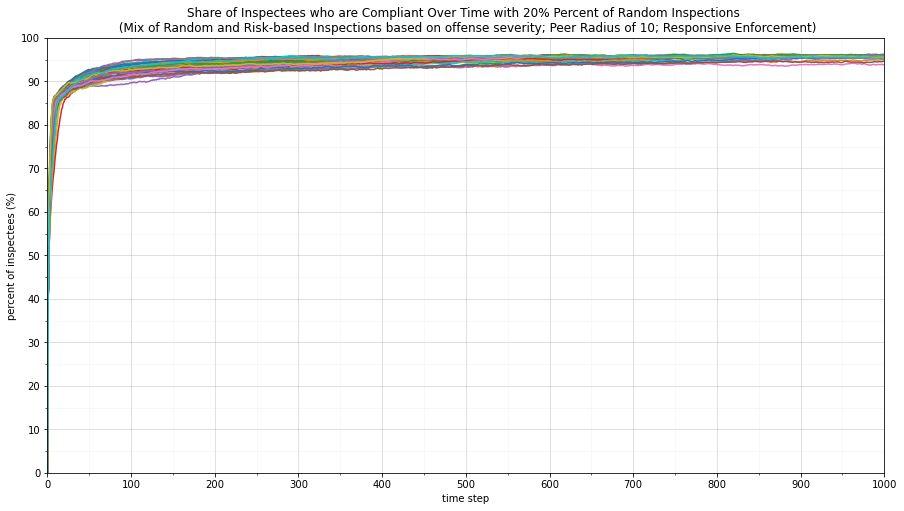

<Figure size 432x288 with 0 Axes>

In [87]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_20_1['step'],mixoffense_resp_sharerandinsp_20_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_2['step'],mixoffense_resp_sharerandinsp_20_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_3['step'],mixoffense_resp_sharerandinsp_20_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_4['step'],mixoffense_resp_sharerandinsp_20_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_5['step'],mixoffense_resp_sharerandinsp_20_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_6['step'],mixoffense_resp_sharerandinsp_20_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_7['step'],mixoffense_resp_sharerandinsp_20_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_8['step'],mixoffense_resp_sharerandinsp_20_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_9['step'],mixoffense_resp_sharerandinsp_20_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_10['step'],mixoffense_resp_sharerandinsp_20_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_11['step'],mixoffense_resp_sharerandinsp_20_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_12['step'],mixoffense_resp_sharerandinsp_20_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_13['step'],mixoffense_resp_sharerandinsp_20_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_14['step'],mixoffense_resp_sharerandinsp_20_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_15['step'],mixoffense_resp_sharerandinsp_20_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_16['step'],mixoffense_resp_sharerandinsp_20_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_17['step'],mixoffense_resp_sharerandinsp_20_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_18['step'],mixoffense_resp_sharerandinsp_20_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_19['step'],mixoffense_resp_sharerandinsp_20_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_20['step'],mixoffense_resp_sharerandinsp_20_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_21['step'],mixoffense_resp_sharerandinsp_20_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_22['step'],mixoffense_resp_sharerandinsp_20_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_23['step'],mixoffense_resp_sharerandinsp_20_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_24['step'],mixoffense_resp_sharerandinsp_20_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_25['step'],mixoffense_resp_sharerandinsp_20_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_26['step'],mixoffense_resp_sharerandinsp_20_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_27['step'],mixoffense_resp_sharerandinsp_20_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_28['step'],mixoffense_resp_sharerandinsp_20_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_29['step'],mixoffense_resp_sharerandinsp_20_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_30['step'],mixoffense_resp_sharerandinsp_20_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_31['step'],mixoffense_resp_sharerandinsp_20_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_32['step'],mixoffense_resp_sharerandinsp_20_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_33['step'],mixoffense_resp_sharerandinsp_20_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_34['step'],mixoffense_resp_sharerandinsp_20_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_35['step'],mixoffense_resp_sharerandinsp_20_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_36['step'],mixoffense_resp_sharerandinsp_20_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_37['step'],mixoffense_resp_sharerandinsp_20_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_38['step'],mixoffense_resp_sharerandinsp_20_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_39['step'],mixoffense_resp_sharerandinsp_20_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_40['step'],mixoffense_resp_sharerandinsp_20_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_41['step'],mixoffense_resp_sharerandinsp_20_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_42['step'],mixoffense_resp_sharerandinsp_20_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_43['step'],mixoffense_resp_sharerandinsp_20_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_44['step'],mixoffense_resp_sharerandinsp_20_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_45['step'],mixoffense_resp_sharerandinsp_20_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_46['step'],mixoffense_resp_sharerandinsp_20_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_47['step'],mixoffense_resp_sharerandinsp_20_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_48['step'],mixoffense_resp_sharerandinsp_20_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_49['step'],mixoffense_resp_sharerandinsp_20_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_20_50['step'],mixoffense_resp_sharerandinsp_20_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 20% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections20_ Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

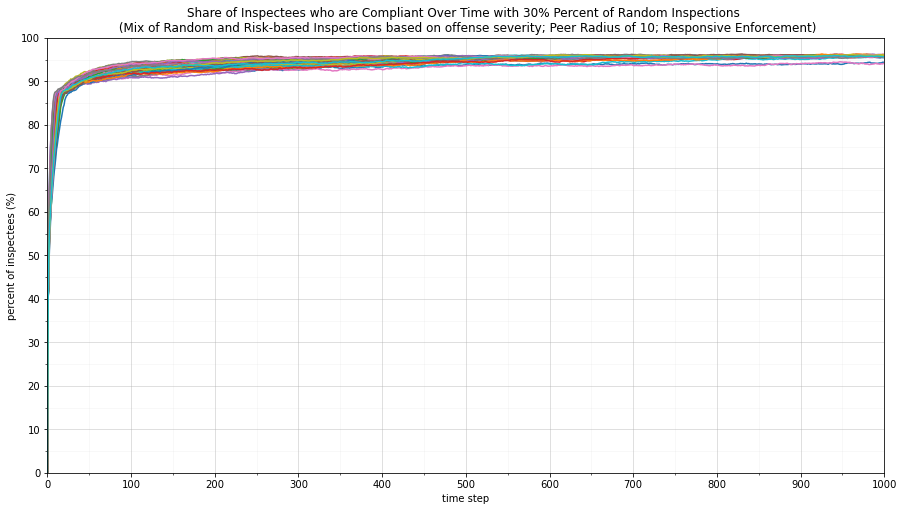

<Figure size 432x288 with 0 Axes>

In [88]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_30_1['step'],mixoffense_resp_sharerandinsp_30_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_2['step'],mixoffense_resp_sharerandinsp_30_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_3['step'],mixoffense_resp_sharerandinsp_30_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_4['step'],mixoffense_resp_sharerandinsp_30_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_5['step'],mixoffense_resp_sharerandinsp_30_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_6['step'],mixoffense_resp_sharerandinsp_30_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_7['step'],mixoffense_resp_sharerandinsp_30_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_8['step'],mixoffense_resp_sharerandinsp_30_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_9['step'],mixoffense_resp_sharerandinsp_30_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_10['step'],mixoffense_resp_sharerandinsp_30_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_11['step'],mixoffense_resp_sharerandinsp_30_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_12['step'],mixoffense_resp_sharerandinsp_30_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_13['step'],mixoffense_resp_sharerandinsp_30_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_14['step'],mixoffense_resp_sharerandinsp_30_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_15['step'],mixoffense_resp_sharerandinsp_30_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_16['step'],mixoffense_resp_sharerandinsp_30_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_17['step'],mixoffense_resp_sharerandinsp_30_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_18['step'],mixoffense_resp_sharerandinsp_30_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_19['step'],mixoffense_resp_sharerandinsp_30_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_20['step'],mixoffense_resp_sharerandinsp_30_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_21['step'],mixoffense_resp_sharerandinsp_30_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_22['step'],mixoffense_resp_sharerandinsp_30_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_23['step'],mixoffense_resp_sharerandinsp_30_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_24['step'],mixoffense_resp_sharerandinsp_30_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_25['step'],mixoffense_resp_sharerandinsp_30_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_26['step'],mixoffense_resp_sharerandinsp_30_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_27['step'],mixoffense_resp_sharerandinsp_30_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_28['step'],mixoffense_resp_sharerandinsp_30_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_29['step'],mixoffense_resp_sharerandinsp_30_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_30['step'],mixoffense_resp_sharerandinsp_30_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_31['step'],mixoffense_resp_sharerandinsp_30_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_32['step'],mixoffense_resp_sharerandinsp_30_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_33['step'],mixoffense_resp_sharerandinsp_30_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_34['step'],mixoffense_resp_sharerandinsp_30_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_35['step'],mixoffense_resp_sharerandinsp_30_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_36['step'],mixoffense_resp_sharerandinsp_30_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_37['step'],mixoffense_resp_sharerandinsp_30_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_38['step'],mixoffense_resp_sharerandinsp_30_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_39['step'],mixoffense_resp_sharerandinsp_30_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_40['step'],mixoffense_resp_sharerandinsp_30_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_41['step'],mixoffense_resp_sharerandinsp_30_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_42['step'],mixoffense_resp_sharerandinsp_30_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_43['step'],mixoffense_resp_sharerandinsp_30_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_44['step'],mixoffense_resp_sharerandinsp_30_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_45['step'],mixoffense_resp_sharerandinsp_30_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_46['step'],mixoffense_resp_sharerandinsp_30_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_47['step'],mixoffense_resp_sharerandinsp_30_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_48['step'],mixoffense_resp_sharerandinsp_30_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_49['step'],mixoffense_resp_sharerandinsp_30_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_30_50['step'],mixoffense_resp_sharerandinsp_30_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 30% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections30_ Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

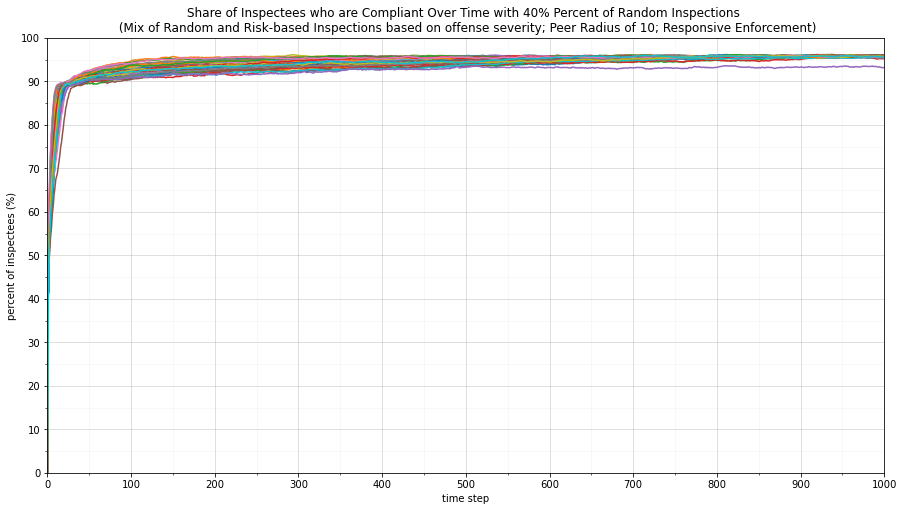

<Figure size 432x288 with 0 Axes>

In [89]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_40_1['step'],mixoffense_resp_sharerandinsp_40_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_2['step'],mixoffense_resp_sharerandinsp_40_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_3['step'],mixoffense_resp_sharerandinsp_40_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_4['step'],mixoffense_resp_sharerandinsp_40_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_5['step'],mixoffense_resp_sharerandinsp_40_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_6['step'],mixoffense_resp_sharerandinsp_40_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_7['step'],mixoffense_resp_sharerandinsp_40_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_8['step'],mixoffense_resp_sharerandinsp_40_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_9['step'],mixoffense_resp_sharerandinsp_40_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_10['step'],mixoffense_resp_sharerandinsp_40_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_11['step'],mixoffense_resp_sharerandinsp_40_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_12['step'],mixoffense_resp_sharerandinsp_40_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_13['step'],mixoffense_resp_sharerandinsp_40_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_14['step'],mixoffense_resp_sharerandinsp_40_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_15['step'],mixoffense_resp_sharerandinsp_40_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_16['step'],mixoffense_resp_sharerandinsp_40_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_17['step'],mixoffense_resp_sharerandinsp_40_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_18['step'],mixoffense_resp_sharerandinsp_40_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_19['step'],mixoffense_resp_sharerandinsp_40_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_20['step'],mixoffense_resp_sharerandinsp_40_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_21['step'],mixoffense_resp_sharerandinsp_40_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_22['step'],mixoffense_resp_sharerandinsp_40_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_23['step'],mixoffense_resp_sharerandinsp_40_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_24['step'],mixoffense_resp_sharerandinsp_40_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_25['step'],mixoffense_resp_sharerandinsp_40_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_26['step'],mixoffense_resp_sharerandinsp_40_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_27['step'],mixoffense_resp_sharerandinsp_40_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_28['step'],mixoffense_resp_sharerandinsp_40_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_29['step'],mixoffense_resp_sharerandinsp_40_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_30['step'],mixoffense_resp_sharerandinsp_40_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_31['step'],mixoffense_resp_sharerandinsp_40_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_32['step'],mixoffense_resp_sharerandinsp_40_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_33['step'],mixoffense_resp_sharerandinsp_40_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_34['step'],mixoffense_resp_sharerandinsp_40_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_35['step'],mixoffense_resp_sharerandinsp_40_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_36['step'],mixoffense_resp_sharerandinsp_40_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_37['step'],mixoffense_resp_sharerandinsp_40_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_38['step'],mixoffense_resp_sharerandinsp_40_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_39['step'],mixoffense_resp_sharerandinsp_40_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_40['step'],mixoffense_resp_sharerandinsp_40_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_41['step'],mixoffense_resp_sharerandinsp_40_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_42['step'],mixoffense_resp_sharerandinsp_40_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_43['step'],mixoffense_resp_sharerandinsp_40_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_44['step'],mixoffense_resp_sharerandinsp_40_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_45['step'],mixoffense_resp_sharerandinsp_40_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_46['step'],mixoffense_resp_sharerandinsp_40_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_47['step'],mixoffense_resp_sharerandinsp_40_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_48['step'],mixoffense_resp_sharerandinsp_40_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_49['step'],mixoffense_resp_sharerandinsp_40_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_40_50['step'],mixoffense_resp_sharerandinsp_40_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 40% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections40_ Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

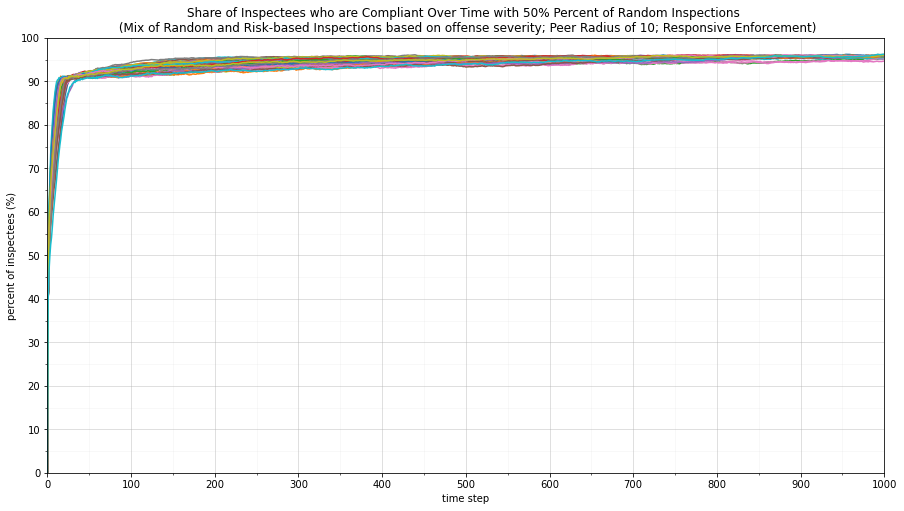

<Figure size 432x288 with 0 Axes>

In [90]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_50_1['step'],mixoffense_resp_sharerandinsp_50_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_2['step'],mixoffense_resp_sharerandinsp_50_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_3['step'],mixoffense_resp_sharerandinsp_50_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_4['step'],mixoffense_resp_sharerandinsp_50_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_5['step'],mixoffense_resp_sharerandinsp_50_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_6['step'],mixoffense_resp_sharerandinsp_50_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_7['step'],mixoffense_resp_sharerandinsp_50_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_8['step'],mixoffense_resp_sharerandinsp_50_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_9['step'],mixoffense_resp_sharerandinsp_50_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_10['step'],mixoffense_resp_sharerandinsp_50_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_11['step'],mixoffense_resp_sharerandinsp_50_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_12['step'],mixoffense_resp_sharerandinsp_50_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_13['step'],mixoffense_resp_sharerandinsp_50_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_14['step'],mixoffense_resp_sharerandinsp_50_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_15['step'],mixoffense_resp_sharerandinsp_50_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_16['step'],mixoffense_resp_sharerandinsp_50_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_17['step'],mixoffense_resp_sharerandinsp_50_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_18['step'],mixoffense_resp_sharerandinsp_50_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_19['step'],mixoffense_resp_sharerandinsp_50_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_20['step'],mixoffense_resp_sharerandinsp_50_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_21['step'],mixoffense_resp_sharerandinsp_50_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_22['step'],mixoffense_resp_sharerandinsp_50_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_23['step'],mixoffense_resp_sharerandinsp_50_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_24['step'],mixoffense_resp_sharerandinsp_50_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_25['step'],mixoffense_resp_sharerandinsp_50_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_26['step'],mixoffense_resp_sharerandinsp_50_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_27['step'],mixoffense_resp_sharerandinsp_50_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_28['step'],mixoffense_resp_sharerandinsp_50_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_29['step'],mixoffense_resp_sharerandinsp_50_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_30['step'],mixoffense_resp_sharerandinsp_50_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_31['step'],mixoffense_resp_sharerandinsp_50_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_32['step'],mixoffense_resp_sharerandinsp_50_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_33['step'],mixoffense_resp_sharerandinsp_50_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_34['step'],mixoffense_resp_sharerandinsp_50_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_35['step'],mixoffense_resp_sharerandinsp_50_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_36['step'],mixoffense_resp_sharerandinsp_50_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_37['step'],mixoffense_resp_sharerandinsp_50_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_38['step'],mixoffense_resp_sharerandinsp_50_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_39['step'],mixoffense_resp_sharerandinsp_50_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_40['step'],mixoffense_resp_sharerandinsp_50_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_41['step'],mixoffense_resp_sharerandinsp_50_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_42['step'],mixoffense_resp_sharerandinsp_50_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_43['step'],mixoffense_resp_sharerandinsp_50_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_44['step'],mixoffense_resp_sharerandinsp_50_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_45['step'],mixoffense_resp_sharerandinsp_50_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_46['step'],mixoffense_resp_sharerandinsp_50_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_47['step'],mixoffense_resp_sharerandinsp_50_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_48['step'],mixoffense_resp_sharerandinsp_50_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_49['step'],mixoffense_resp_sharerandinsp_50_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_50_50['step'],mixoffense_resp_sharerandinsp_50_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 50% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections50_ Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

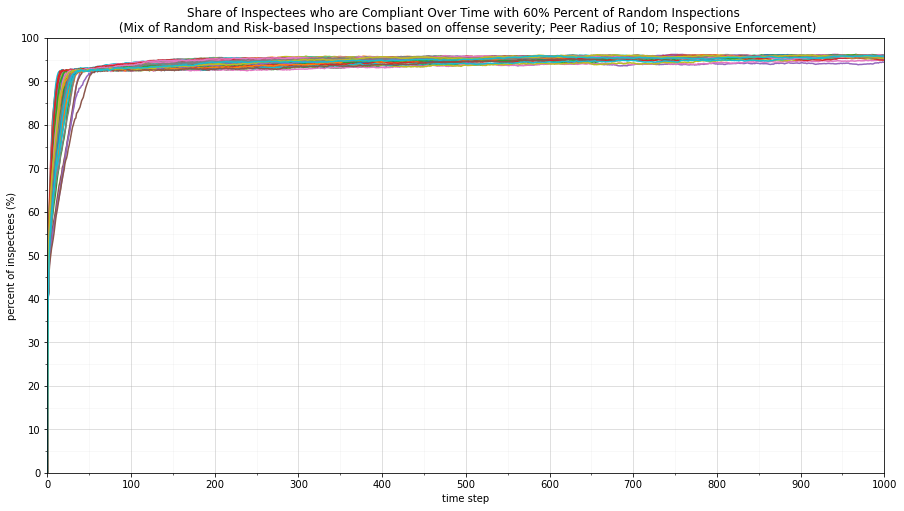

<Figure size 432x288 with 0 Axes>

In [91]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_60_1['step'],mixoffense_resp_sharerandinsp_60_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_2['step'],mixoffense_resp_sharerandinsp_60_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_3['step'],mixoffense_resp_sharerandinsp_60_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_4['step'],mixoffense_resp_sharerandinsp_60_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_5['step'],mixoffense_resp_sharerandinsp_60_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_6['step'],mixoffense_resp_sharerandinsp_60_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_7['step'],mixoffense_resp_sharerandinsp_60_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_8['step'],mixoffense_resp_sharerandinsp_60_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_9['step'],mixoffense_resp_sharerandinsp_60_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_10['step'],mixoffense_resp_sharerandinsp_60_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_11['step'],mixoffense_resp_sharerandinsp_60_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_12['step'],mixoffense_resp_sharerandinsp_60_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_13['step'],mixoffense_resp_sharerandinsp_60_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_14['step'],mixoffense_resp_sharerandinsp_60_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_15['step'],mixoffense_resp_sharerandinsp_60_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_16['step'],mixoffense_resp_sharerandinsp_60_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_17['step'],mixoffense_resp_sharerandinsp_60_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_18['step'],mixoffense_resp_sharerandinsp_60_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_19['step'],mixoffense_resp_sharerandinsp_60_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_20['step'],mixoffense_resp_sharerandinsp_60_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_21['step'],mixoffense_resp_sharerandinsp_60_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_22['step'],mixoffense_resp_sharerandinsp_60_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_23['step'],mixoffense_resp_sharerandinsp_60_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_24['step'],mixoffense_resp_sharerandinsp_60_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_25['step'],mixoffense_resp_sharerandinsp_60_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_26['step'],mixoffense_resp_sharerandinsp_60_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_27['step'],mixoffense_resp_sharerandinsp_60_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_28['step'],mixoffense_resp_sharerandinsp_60_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_29['step'],mixoffense_resp_sharerandinsp_60_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_30['step'],mixoffense_resp_sharerandinsp_60_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_31['step'],mixoffense_resp_sharerandinsp_60_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_32['step'],mixoffense_resp_sharerandinsp_60_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_33['step'],mixoffense_resp_sharerandinsp_60_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_34['step'],mixoffense_resp_sharerandinsp_60_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_35['step'],mixoffense_resp_sharerandinsp_60_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_36['step'],mixoffense_resp_sharerandinsp_60_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_37['step'],mixoffense_resp_sharerandinsp_60_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_38['step'],mixoffense_resp_sharerandinsp_60_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_39['step'],mixoffense_resp_sharerandinsp_60_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_40['step'],mixoffense_resp_sharerandinsp_60_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_41['step'],mixoffense_resp_sharerandinsp_60_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_42['step'],mixoffense_resp_sharerandinsp_60_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_43['step'],mixoffense_resp_sharerandinsp_60_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_44['step'],mixoffense_resp_sharerandinsp_60_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_45['step'],mixoffense_resp_sharerandinsp_60_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_46['step'],mixoffense_resp_sharerandinsp_60_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_47['step'],mixoffense_resp_sharerandinsp_60_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_48['step'],mixoffense_resp_sharerandinsp_60_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_49['step'],mixoffense_resp_sharerandinsp_60_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_60_50['step'],mixoffense_resp_sharerandinsp_60_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 60% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections60_ Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

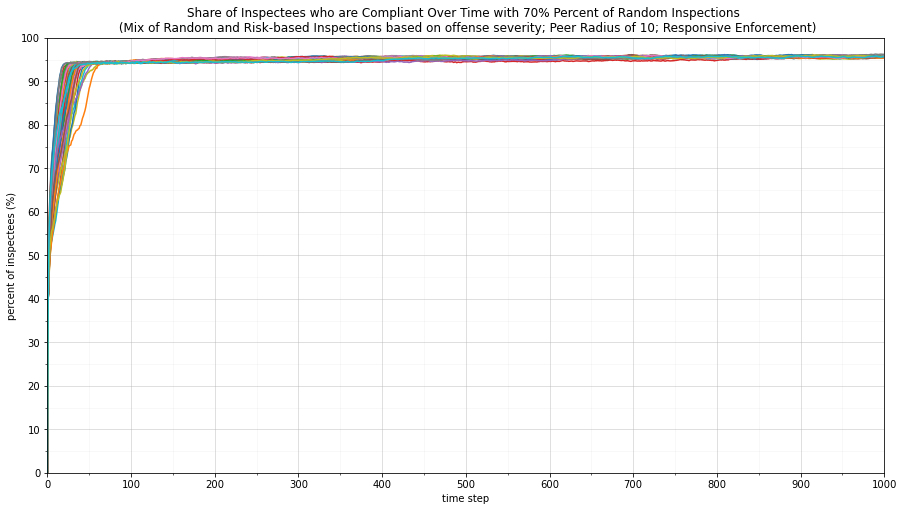

<Figure size 432x288 with 0 Axes>

In [92]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_70_1['step'],mixoffense_resp_sharerandinsp_70_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_2['step'],mixoffense_resp_sharerandinsp_70_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_3['step'],mixoffense_resp_sharerandinsp_70_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_4['step'],mixoffense_resp_sharerandinsp_70_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_5['step'],mixoffense_resp_sharerandinsp_70_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_6['step'],mixoffense_resp_sharerandinsp_70_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_7['step'],mixoffense_resp_sharerandinsp_70_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_8['step'],mixoffense_resp_sharerandinsp_70_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_9['step'],mixoffense_resp_sharerandinsp_70_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_10['step'],mixoffense_resp_sharerandinsp_70_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_11['step'],mixoffense_resp_sharerandinsp_70_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_12['step'],mixoffense_resp_sharerandinsp_70_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_13['step'],mixoffense_resp_sharerandinsp_70_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_14['step'],mixoffense_resp_sharerandinsp_70_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_15['step'],mixoffense_resp_sharerandinsp_70_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_16['step'],mixoffense_resp_sharerandinsp_70_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_17['step'],mixoffense_resp_sharerandinsp_70_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_18['step'],mixoffense_resp_sharerandinsp_70_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_19['step'],mixoffense_resp_sharerandinsp_70_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_20['step'],mixoffense_resp_sharerandinsp_70_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_21['step'],mixoffense_resp_sharerandinsp_70_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_22['step'],mixoffense_resp_sharerandinsp_70_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_23['step'],mixoffense_resp_sharerandinsp_70_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_24['step'],mixoffense_resp_sharerandinsp_70_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_25['step'],mixoffense_resp_sharerandinsp_70_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_26['step'],mixoffense_resp_sharerandinsp_70_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_27['step'],mixoffense_resp_sharerandinsp_70_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_28['step'],mixoffense_resp_sharerandinsp_70_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_29['step'],mixoffense_resp_sharerandinsp_70_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_30['step'],mixoffense_resp_sharerandinsp_70_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_31['step'],mixoffense_resp_sharerandinsp_70_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_32['step'],mixoffense_resp_sharerandinsp_70_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_33['step'],mixoffense_resp_sharerandinsp_70_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_34['step'],mixoffense_resp_sharerandinsp_70_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_35['step'],mixoffense_resp_sharerandinsp_70_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_36['step'],mixoffense_resp_sharerandinsp_70_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_37['step'],mixoffense_resp_sharerandinsp_70_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_38['step'],mixoffense_resp_sharerandinsp_70_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_39['step'],mixoffense_resp_sharerandinsp_70_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_40['step'],mixoffense_resp_sharerandinsp_70_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_41['step'],mixoffense_resp_sharerandinsp_70_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_42['step'],mixoffense_resp_sharerandinsp_70_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_43['step'],mixoffense_resp_sharerandinsp_70_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_44['step'],mixoffense_resp_sharerandinsp_70_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_45['step'],mixoffense_resp_sharerandinsp_70_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_46['step'],mixoffense_resp_sharerandinsp_70_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_47['step'],mixoffense_resp_sharerandinsp_70_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_48['step'],mixoffense_resp_sharerandinsp_70_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_49['step'],mixoffense_resp_sharerandinsp_70_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_70_50['step'],mixoffense_resp_sharerandinsp_70_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 70% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections70_ Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

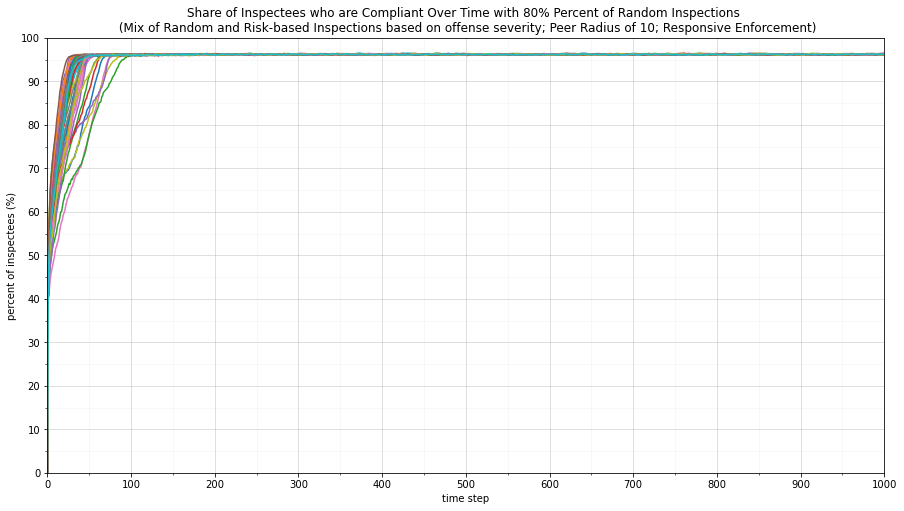

<Figure size 432x288 with 0 Axes>

In [93]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_80_1['step'],mixoffense_resp_sharerandinsp_80_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_2['step'],mixoffense_resp_sharerandinsp_80_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_3['step'],mixoffense_resp_sharerandinsp_80_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_4['step'],mixoffense_resp_sharerandinsp_80_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_5['step'],mixoffense_resp_sharerandinsp_80_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_6['step'],mixoffense_resp_sharerandinsp_80_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_7['step'],mixoffense_resp_sharerandinsp_80_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_8['step'],mixoffense_resp_sharerandinsp_80_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_9['step'],mixoffense_resp_sharerandinsp_80_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_10['step'],mixoffense_resp_sharerandinsp_80_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_11['step'],mixoffense_resp_sharerandinsp_80_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_12['step'],mixoffense_resp_sharerandinsp_80_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_13['step'],mixoffense_resp_sharerandinsp_80_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_14['step'],mixoffense_resp_sharerandinsp_80_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_15['step'],mixoffense_resp_sharerandinsp_80_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_16['step'],mixoffense_resp_sharerandinsp_80_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_17['step'],mixoffense_resp_sharerandinsp_80_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_18['step'],mixoffense_resp_sharerandinsp_80_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_19['step'],mixoffense_resp_sharerandinsp_80_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_20['step'],mixoffense_resp_sharerandinsp_80_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_21['step'],mixoffense_resp_sharerandinsp_80_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_22['step'],mixoffense_resp_sharerandinsp_80_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_23['step'],mixoffense_resp_sharerandinsp_80_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_24['step'],mixoffense_resp_sharerandinsp_80_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_25['step'],mixoffense_resp_sharerandinsp_80_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_26['step'],mixoffense_resp_sharerandinsp_80_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_27['step'],mixoffense_resp_sharerandinsp_80_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_28['step'],mixoffense_resp_sharerandinsp_80_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_29['step'],mixoffense_resp_sharerandinsp_80_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_30['step'],mixoffense_resp_sharerandinsp_80_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_31['step'],mixoffense_resp_sharerandinsp_80_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_32['step'],mixoffense_resp_sharerandinsp_80_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_33['step'],mixoffense_resp_sharerandinsp_80_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_34['step'],mixoffense_resp_sharerandinsp_80_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_35['step'],mixoffense_resp_sharerandinsp_80_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_36['step'],mixoffense_resp_sharerandinsp_80_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_37['step'],mixoffense_resp_sharerandinsp_80_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_38['step'],mixoffense_resp_sharerandinsp_80_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_39['step'],mixoffense_resp_sharerandinsp_80_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_40['step'],mixoffense_resp_sharerandinsp_80_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_41['step'],mixoffense_resp_sharerandinsp_80_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_42['step'],mixoffense_resp_sharerandinsp_80_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_43['step'],mixoffense_resp_sharerandinsp_80_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_44['step'],mixoffense_resp_sharerandinsp_80_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_45['step'],mixoffense_resp_sharerandinsp_80_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_46['step'],mixoffense_resp_sharerandinsp_80_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_47['step'],mixoffense_resp_sharerandinsp_80_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_48['step'],mixoffense_resp_sharerandinsp_80_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_49['step'],mixoffense_resp_sharerandinsp_80_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_80_50['step'],mixoffense_resp_sharerandinsp_80_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 80% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections80_ Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')

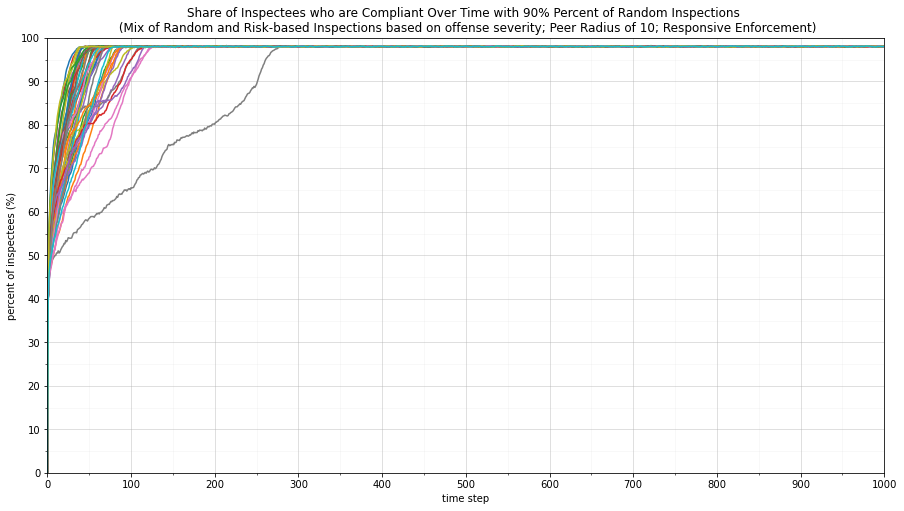

<Figure size 432x288 with 0 Axes>

In [94]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(mixoffense_resp_sharerandinsp_90_1['step'],mixoffense_resp_sharerandinsp_90_1['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_2['step'],mixoffense_resp_sharerandinsp_90_2['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_3['step'],mixoffense_resp_sharerandinsp_90_3['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_4['step'],mixoffense_resp_sharerandinsp_90_4['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_5['step'],mixoffense_resp_sharerandinsp_90_5['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_6['step'],mixoffense_resp_sharerandinsp_90_6['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_7['step'],mixoffense_resp_sharerandinsp_90_7['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_8['step'],mixoffense_resp_sharerandinsp_90_8['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_9['step'],mixoffense_resp_sharerandinsp_90_9['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_10['step'],mixoffense_resp_sharerandinsp_90_10['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_11['step'],mixoffense_resp_sharerandinsp_90_11['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_12['step'],mixoffense_resp_sharerandinsp_90_12['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_13['step'],mixoffense_resp_sharerandinsp_90_13['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_14['step'],mixoffense_resp_sharerandinsp_90_14['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_15['step'],mixoffense_resp_sharerandinsp_90_15['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_16['step'],mixoffense_resp_sharerandinsp_90_16['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_17['step'],mixoffense_resp_sharerandinsp_90_17['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_18['step'],mixoffense_resp_sharerandinsp_90_18['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_19['step'],mixoffense_resp_sharerandinsp_90_19['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_20['step'],mixoffense_resp_sharerandinsp_90_20['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_21['step'],mixoffense_resp_sharerandinsp_90_21['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_22['step'],mixoffense_resp_sharerandinsp_90_22['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_23['step'],mixoffense_resp_sharerandinsp_90_23['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_24['step'],mixoffense_resp_sharerandinsp_90_24['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_25['step'],mixoffense_resp_sharerandinsp_90_25['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_26['step'],mixoffense_resp_sharerandinsp_90_26['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_27['step'],mixoffense_resp_sharerandinsp_90_27['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_28['step'],mixoffense_resp_sharerandinsp_90_28['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_29['step'],mixoffense_resp_sharerandinsp_90_29['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_30['step'],mixoffense_resp_sharerandinsp_90_30['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_31['step'],mixoffense_resp_sharerandinsp_90_31['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_32['step'],mixoffense_resp_sharerandinsp_90_32['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_33['step'],mixoffense_resp_sharerandinsp_90_33['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_34['step'],mixoffense_resp_sharerandinsp_90_34['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_35['step'],mixoffense_resp_sharerandinsp_90_35['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_36['step'],mixoffense_resp_sharerandinsp_90_36['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_37['step'],mixoffense_resp_sharerandinsp_90_37['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_38['step'],mixoffense_resp_sharerandinsp_90_38['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_39['step'],mixoffense_resp_sharerandinsp_90_39['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_40['step'],mixoffense_resp_sharerandinsp_90_40['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_41['step'],mixoffense_resp_sharerandinsp_90_41['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_42['step'],mixoffense_resp_sharerandinsp_90_42['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_43['step'],mixoffense_resp_sharerandinsp_90_43['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_44['step'],mixoffense_resp_sharerandinsp_90_44['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_45['step'],mixoffense_resp_sharerandinsp_90_45['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_46['step'],mixoffense_resp_sharerandinsp_90_46['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_47['step'],mixoffense_resp_sharerandinsp_90_47['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_48['step'],mixoffense_resp_sharerandinsp_90_48['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_49['step'],mixoffense_resp_sharerandinsp_90_49['perc-compliant'])
plt.plot(mixoffense_resp_sharerandinsp_90_50['step'],mixoffense_resp_sharerandinsp_90_50['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with 90% Percent of Random Inspections \n (Mix of Random and Risk-based Inspections based on offense severity; Peer Radius of 10; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Percent Random Inspections90_ Time vs Compliant All Runs (Mix offense-severity, Responsive, Radius 10).png', dpi=300, bbox_inches='tight')